# **HR Employee Leave Prediction**

## **Table Of Contents**

1. [Dataset and Problem Statement](#section1)<br>
2. [Importing libraries](#section2)<br>
3. [Retrieve Data from Database](#section3)<br>
	- 3.1 [Reading Department data](#section301)<br>
	- 3.2 [Reading Employee details data](#section302)<br>
	- 3.3 [Reading Employee data](#section303)<br>
4. [PExamining the data](#section4)<br>
	- 4.1 [Analyzing the Department data](#section401)<br>
		- 4.1.1 [Summary](#section411)<br>
	- 4.2 [Analyzing the employee details](#section402)<br>
		- 4.2.1 [Outlier checking for field age](#section421)<br>
		- 4.2.2 [Summary](#section422)<br>
	- 4.3 [Analyzing employee data](#section403)<br>
		- 4.3.1 [Checking outliers of various fields in the dataset](#section431)<br>
		- 4.3.2 [Replacing Nan in filed_complaint and recently_promoted with 0](#section432)<br>
		- 4.3.3 [Analyzing columns relations and converting salary and status to numeric for further analysis](#section433)<br>
		- 4.3.4 [Analyzing empty departments](#section434)<br>
		- 4.3.5 [Analyzing empty last evaluation values](#section435)<br>
		- 4.3.6 [Analyzing empty satisfaction values](#section436)<br>
		- 4.3.7 [Analyzing empty tenure values](#section437)<br>
		- 4.3.8 [Analyzing and populating remaining NaNs in dataframe fields](#section438)<br>
			- 4.3.8.1 [Analyzing tenure](#section4381)<br>
			- 4.3.8.2 [Analyzing last_evaluation based on updated dataframe](#section4382)<br>
		- 4.3.9 [Checking category columns counts](#section439)<br>
	- 4.4 [Merging Employee data and Employee details](#section404)<br>
	- 4.5 [Merging further with department](#section405)<br>
5. [Pre-processing and Feature engineering on merged dataset](#section5)<br>
	- 5.1 [Removing dept_id, dept_name and dept_head](#section501)<br>
	- 5.2 [Converting age to bins](#section502)<br>
	- 5.3 [Checking for outliers](#section503)<br>
	- 5.4 [Checking relation among columns](#section504)<br>
	- 5.5 [Feature analysis using PyCaret](#section505)<br>
		- 5.5.1 [Using dataset1](#section551)<br>
		- 5.5.2 [Using dataset2](#section552)<br>
	- 5.6 [Checking important feature](#section506)<br>
	- 5.7 [Extracting features - LDA/PCA](#section507)<br>
		- 5.7.1 [LDA](#section571)<br>
		- 5.7.2 [PCA](#section572)<br>
	- 5.8 [Removing Employee id from dataset](#section508)<br>
6. [Building Machine Learning Models](#section6)<br>
	- 6.1 [Baseline Models](#section601)<br>
		- 6.1.1 [Dataset1 with Stratified=False](#section611)<br>
		- 6.1.2 [Dataset2 with Stratified=False](#section612)<br>
	- 6.2 [Hyper Parameter tuning of models](#section602)<br>
		- 6.2.1 [Random Forest](#section621)<br>
		- 6.2.2 [XGBoost](#section622)<br>
		- 6.2.3 [LightGBM](#section623)<br>
	- 6.3 [Ensemble of Models](#section603)<br>
		- 6.3.1 [Stacking](#section631)<br>
		- 6.3.2 [Voting Classifier](#section632)<br>
			- 6.3.2.1 [Hard Voting](#section6321)<br>
			- 6.3.2.2 [Soft Voting](#section6322)<br>
7. [Selection of best model](#section7)<br>
8. [Conclusion](#section8)<br>


<a id=section1></a>
## **1. Dataset and Problem Statement**

HR Department of a Software Company needs to try new initiatives to retain employees, for this they need a model that can predict whether a person is leaving or not, so that appropriate actions can be taken.

So, data is provided for analysis, that is collected during exit interviews of various employees so that can get some insight from that data for future predictions.


 - We are given datasets of past employees and their status (still employed or already left).
 - Our task is to build a classification model using the datasets.
- Because there was no machine learning model for this problem in the company, we don’t have quantifiable win condition. we need to build the best possible model.

**Objectives**

Deliverable: Predict whether an employee will stay or leave.


**Dataset Information**

Data can be fetched from below Databse tables

- **department_data** : This dataset contains information about each department
- **employee_details_data** : This dataset consists of Employee ID, their Age, Gender and Marital Status.
- **employee_data** : This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

**Target Variable** : status – Current employment status (Employed / Left)

<a id=section2></a>
## **2. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
!pip install mysql-connector-python
import mysql.connector
from mysql.connector import Error

You should consider upgrading via the 'c:\users\nigam\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install catboost

You should consider upgrading via the 'c:\users\nigam\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler

from sklearn.decomposition import PCA


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from imblearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn import metrics


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

import pickle


from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

from catboost import CatBoostClassifier, Pool

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression



In [5]:
import plotly
from plotly.offline import iplot
import plotly.graph_objs as go

In [6]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

<a id=section3></a>
## **3. Retrieve Data from Database**

In [7]:
def get_data(sqlst):
    df=pd.DataFrame()
    try:
        connection = mysql.connector.connect(host='cpanel.insaid.co', database='Capstone2',user='student',password='student')
        if connection.is_connected():
            db_Info = connection.get_server_info()
            print("Connected to MySQL Server version", db_Info)
            df=pd.read_sql(sqlst, connection)
            return df
    except Error as e:
            print("Error while connecting to MySQL", e)
            return None
    finally:
        if (connection.is_connected()):
            print("MySQL connection is closed")

<a id=section301></a>
### **3.1 Reading Department data**

In [8]:
df_dept=pd.DataFrame()
sqlmp="select CAST(dept_id as CHAR) dept_id, CAST(dept_name as CHAR) dept_name, CAST(dept_head as CHAR) dept_head from department_data"


df_dept=get_data(sqlmp)
df_dept.to_csv('1001_Department.csv')

df_dept.head()

Connected to MySQL Server version 5.6.49-cll-lve
MySQL connection is closed


dept_id    dept_name              dept_head
0   D00-IT           IT             Henry Adey
1   D00-SS        Sales        Edward J Bayley
2   D00-TP         Temp        Micheal Zachrey
3  D00-ENG  Engineering  Sushant Raghunathan K
4   D00-SP      Support         Amelia Westray

<a id=section302></a>
### **3.2 Reading Employee details data**

In [9]:
df_emp_det=pd.DataFrame()
sqlmp="select employee_id, age, CAST(gender as CHAR) gender, CAST(marital_status as CHAR) marital_status from employee_details_data"


df_emp_det=get_data(sqlmp)
df_emp_det.to_csv('1001_Employee_det.csv')

df_emp_det.head()

Connected to MySQL Server version 5.6.49-cll-lve
MySQL connection is closed


employee_id  age  gender marital_status
0       113558   43    Male        Married
1       112256   24  Female      Unmarried
2       112586   22  Female      Unmarried
3       108071   36    Male        Married
4       116915   38    Male        Married

<a id=section303></a>
### **3.3 Reading Employee data**

In [10]:
df_emp_data=pd.DataFrame()
sqlmp="select avg_monthly_hrs, CAST(department as CHAR) department, filed_complaint, last_evaluation, n_projects, recently_promoted, salary, satisfaction, status, tenure, employee_id from employee_data"


df_emp_data=get_data(sqlmp)
df_emp_data.to_csv('1001_Employee_data.csv')

df_emp_data.head()

Connected to MySQL Server version 5.6.49-cll-lve
MySQL connection is closed


avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0       None              NaN         0.866838           6   
1            134.0       None              NaN         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              NaN         0.961360           6   
4            146.0     D00-SS              NaN         0.507349           2   

   recently_promoted  salary  satisfaction status  tenure  employee_id  
0                NaN  medium      0.134415   Left     4.0       124467  
1                NaN     low      0.511041   Left     3.0       112210  
2                NaN  medium      0.405101   Left     3.0       126150  
3                NaN     low      0.152974   Left     4.0       125346  
4                NaN  medium      0.434845   Left     3.0       113707

<a id=section4></a>
## **4. Examining the data**

<a id=section401></a>
### **4.1 Analyzing the Department data**

In [11]:
df_dept.head()

dept_id    dept_name              dept_head
0   D00-IT           IT             Henry Adey
1   D00-SS        Sales        Edward J Bayley
2   D00-TP         Temp        Micheal Zachrey
3  D00-ENG  Engineering  Sushant Raghunathan K
4   D00-SP      Support         Amelia Westray

In [12]:
df_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [13]:
df_dept.describe(include='all')

dept_id  dept_name  dept_head
count       11         11         11
unique      11         11         11
top     D00-AD  Marketing  Aanchal J
freq         1          1          1

In [14]:
df_dept.isnull().sum()

dept_id      0
dept_name    0
dept_head    0
dtype: int64

In [15]:
df_dept.dept_id.unique()

array(['D00-IT', 'D00-SS', 'D00-TP', 'D00-ENG', 'D00-SP', 'D00-FN',
       'D00-PR', 'D00-AD', 'D00-MN', 'D00-MT', 'D00-PD'], dtype=object)

In [16]:
len(df_dept.dept_id.unique())

11

In [17]:
df_dept.dept_name.unique()

array(['IT', 'Sales', 'Temp', 'Engineering', 'Support', 'Finance',
       'Procurement', 'Admin', 'Management', 'Marketing', 'Product'],
      dtype=object)

In [18]:
len(df_dept.dept_name.unique())

11

In [19]:
df_dept.dept_head.unique()

array(['Henry Adey', 'Edward J Bayley', 'Micheal Zachrey',
       'Sushant Raghunathan K', 'Amelia Westray', 'Aanchal J',
       'Louie Viles', 'Evelyn Tolson', 'Ellie Trafton', 'Reuben Swann',
       'Darcy Staines'], dtype=object)

In [20]:
len(df_dept.dept_head.unique())

11

<a id=section411></a>
#### **4.1.1 Summary**

No null data field and all values are unique.

All values are of object type and required fields neeed to be converted to numeric for analysis of the data.

dept_head is name field so can be omitted

<a id=section402></a>
### **4.2 Analyzing the employee details**

In [21]:
df_emp_det.head()

employee_id  age  gender marital_status
0       113558   43    Male        Married
1       112256   24  Female      Unmarried
2       112586   22  Female      Unmarried
3       108071   36    Male        Married
4       116915   38    Male        Married

In [22]:
df_emp_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [23]:
df_emp_det.describe(include='all')

employee_id           age gender marital_status
count    14245.000000  14245.000000  14245          14245
unique            NaN           NaN      2              2
top               NaN           NaN   Male      Unmarried
freq              NaN           NaN   9382           7283
mean    112123.050544     32.889926    NaN            NaN
std       8500.457343      9.970834    NaN            NaN
min     100101.000000     22.000000    NaN            NaN
25%     105775.000000     24.000000    NaN            NaN
50%     111298.000000     29.000000    NaN            NaN
75%     116658.000000     41.000000    NaN            NaN
max     148988.000000     57.000000    NaN            NaN

In [24]:
df_emp_det.isnull().sum()

employee_id       0
age               0
gender            0
marital_status    0
dtype: int64

In [25]:
len(df_emp_det.employee_id.unique())

14245

In [26]:
df_emp_det.age.unique()

array([43, 24, 22, 36, 38, 51, 54, 49, 37, 27, 47, 28, 53, 39, 35, 42, 40,
       23, 45, 25, 30, 34, 26, 44, 52, 31, 32, 33, 29, 41, 46, 48, 57, 50,
       55, 56], dtype=int64)

In [27]:
df_emp_det.gender.unique()

array(['Male', 'Female'], dtype=object)

In [28]:
df_emp_det.marital_status.unique()

array(['Married', 'Unmarried'], dtype=object)

<a id=section421></a>
#### **4.2.1 Outlier checking for field age**

<AxesSubplot:>

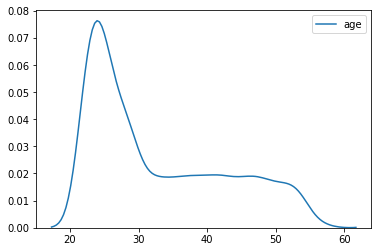

In [29]:
sns.kdeplot(data=df_emp_det.age)

In [30]:
df_emp_det.age.skew()

0.7019638562620099

In [31]:
df_emp_det.age.kurtosis()

-0.8657375902644997

<AxesSubplot:xlabel='age'>

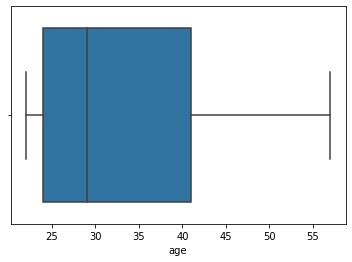

In [32]:
sns.boxplot(x=df_emp_det['age'])

<a id=section422></a>
#### **4.2.2 Summary**

No null values.

age can be converted to bins if required later for analysis.

gender and marital_status need to be converted to numeric later.

age seems to be moderately positive skewed with skewness=0.70, so need to be scaled in case not converted to bins

No outliers detected in age column

<a id=section403></a>
### **4.3 Analyzing employee data**

In [33]:
df_emp_data.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0       None              NaN         0.866838           6   
1            134.0       None              NaN         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              NaN         0.961360           6   
4            146.0     D00-SS              NaN         0.507349           2   

   recently_promoted  salary  satisfaction status  tenure  employee_id  
0                NaN  medium      0.134415   Left     4.0       124467  
1                NaN     low      0.511041   Left     3.0       112210  
2                NaN  medium      0.405101   Left     3.0       126150  
3                NaN     low      0.152974   Left     4.0       125346  
4                NaN  medium      0.434845   Left     3.0       113707

In [34]:
df_emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


department, filed_complaint, last_evaluation, recently_promoted,satisfaction and tenure have NaN values

salary, status, department are object type, need to be converted to numeric for ML algo

In [35]:
df_emp_data.describe(include='all')

avg_monthly_hrs department  filed_complaint  last_evaluation  \
count      14150.000000      13443           2046.0     12663.000000   
unique              NaN         12              NaN              NaN   
top                 NaN     D00-SS              NaN              NaN   
freq                NaN       3905              NaN              NaN   
mean         199.994346        NaN              1.0         0.718399   
std           50.833697        NaN              0.0         0.173108   
min           49.000000        NaN              1.0         0.316175   
25%          155.000000        NaN              1.0         0.563711   
50%          199.000000        NaN              1.0         0.724731   
75%          245.000000        NaN              1.0         0.871409   
max          310.000000        NaN              1.0         1.000000   

          n_projects  recently_promoted salary  satisfaction    status  \
count   14150.000000              297.0  14150  14000.000000     14150   
unique           NaN                NaN      3           NaN         2   
top              NaN                NaN    low           NaN  Employed   
freq             NaN                NaN   6906           NaN     10784   
mean        3.778304                1.0    NaN      0.621212       NaN   
std         1.250162                0.0    NaN      0.250482       NaN   
min         1.000000                1.0    NaN      0.040058       NaN   
25%         3.000000                1.0    NaN      0.450356       NaN   
50%         4.000000                1.0    NaN      0.652394       NaN   
75%         5.000000                1.0    NaN      0.824925       NaN   
max         7.000000                1.0    NaN      1.000000       NaN   

              tenure    employee_id  
count   14000.000000   14150.000000  
unique           NaN            NaN  
top              NaN            NaN  
freq             NaN            NaN  
mean        3.499357  112080.750247  
std         1.462584    8748.202856  
min         2.000000       0.000000  
25%         3.000000  105772.500000  
50%         3.000000  111291.500000  
75%         4.000000  116650.750000  
max        10.000000  148988.000000

c:\users\nigam\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

c:\users\nigam\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.



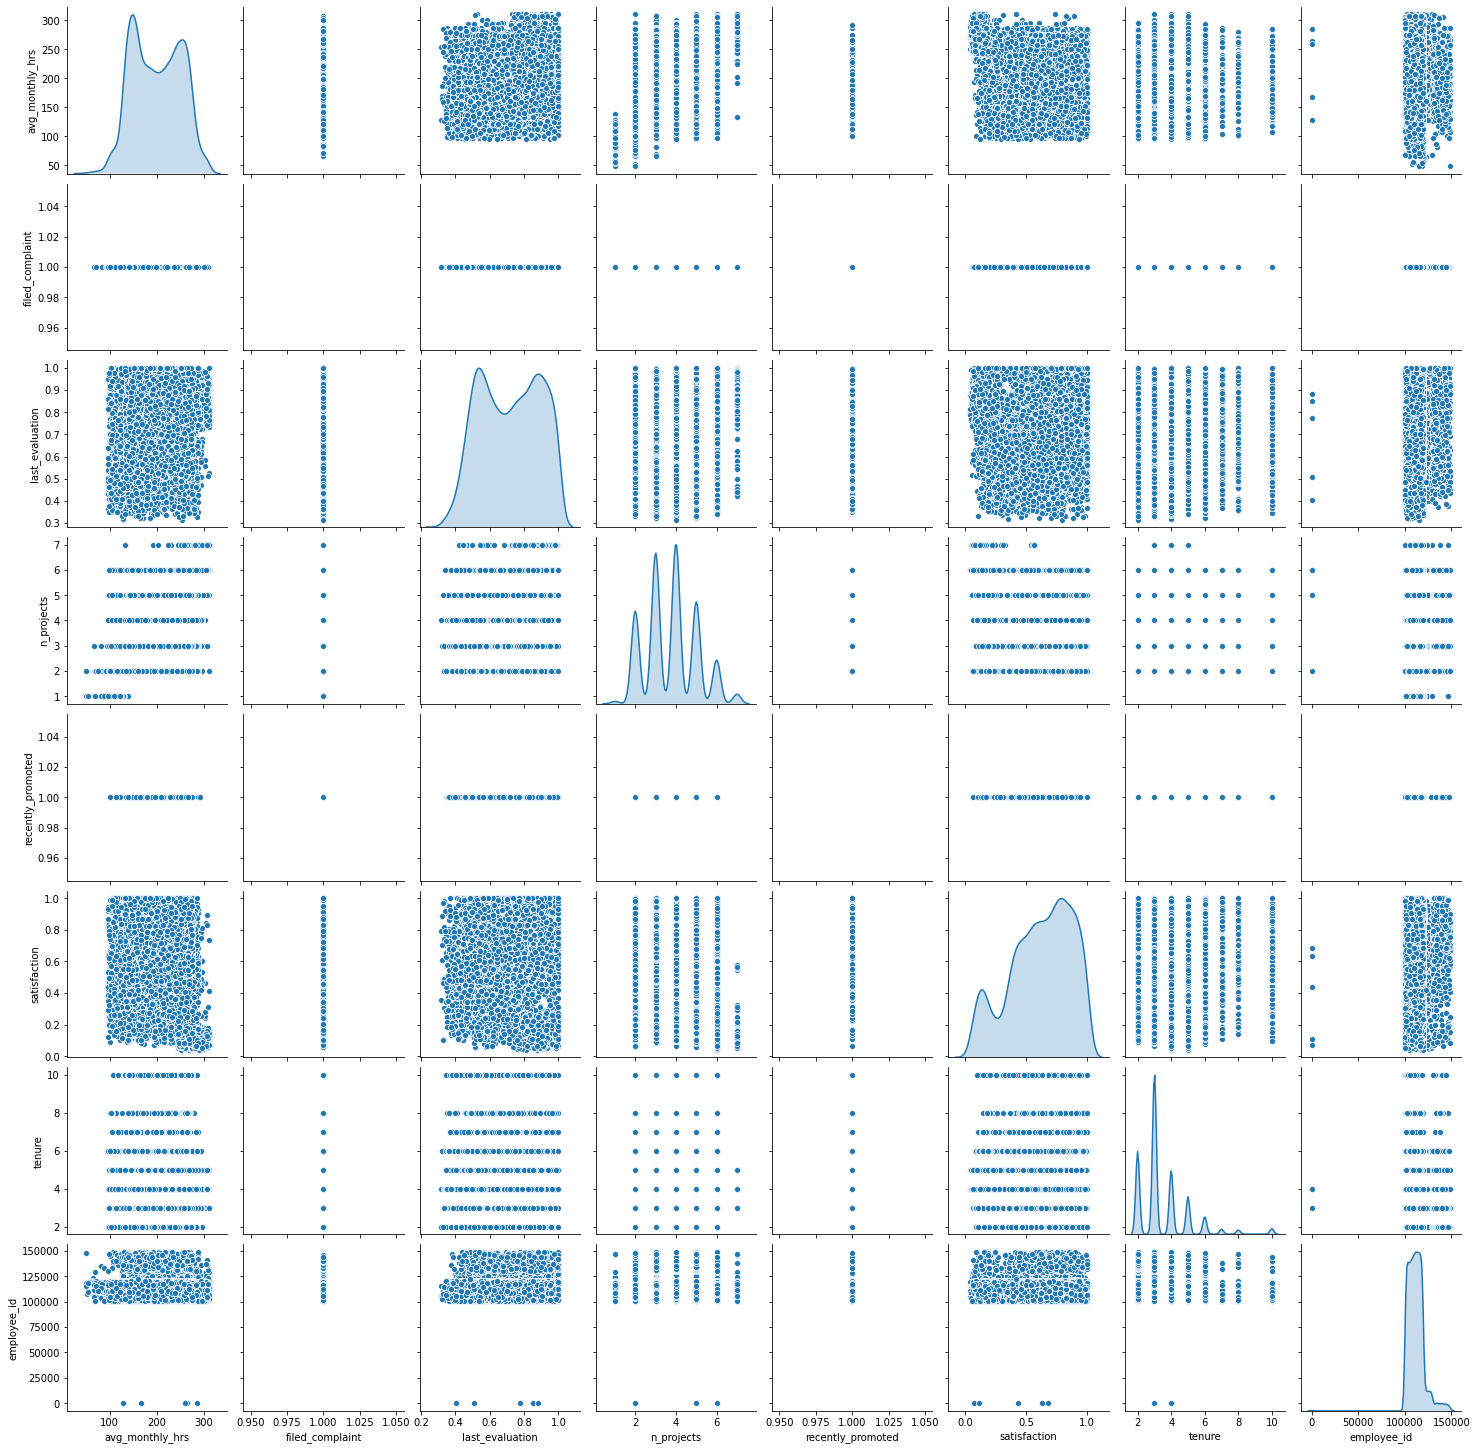

In [36]:
sns.pairplot(data=df_emp_data,diag_kind='kde')

Satisfaction seems to be bit skewed

employee_id also looks skewed, but since column contains high count of unique values, so would be removed later on before any analysis or modelling.

In [37]:
df_emp_data.isnull().sum()

avg_monthly_hrs          0
department             707
filed_complaint      12104
last_evaluation       1487
n_projects               0
recently_promoted    13853
salary                   0
satisfaction           150
status                   0
tenure                 150
employee_id              0
dtype: int64

As observed before, department, filed_complaint, last_evaluation, recently_promoted,satisfaction and tenure have NaN values

In [38]:
(df_emp_data.isnull().sum()/len(df_emp_data.employee_id))*100

avg_monthly_hrs       0.000000
department            4.996466
filed_complaint      85.540636
last_evaluation      10.508834
n_projects            0.000000
recently_promoted    97.901060
salary                0.000000
satisfaction          1.060071
status                0.000000
tenure                1.060071
employee_id           0.000000
dtype: float64

Since filed_complaint, recently_promoted have high count, can populate those
Then can analyze for last_evaluation.

Since percent of NaN values are very less for department, satisfaction and tenure, so NaN records can be removed if required.

In [39]:
df_emp_data.filed_complaint.unique()

array([nan,  1.])

In [40]:
df_emp_data.recently_promoted.unique()

array([nan,  1.])

In [41]:
df_emp_data.department.unique()

array([None, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN', '-IT'],
      dtype=object)

In [42]:
df_emp_data.department=df_emp_data.department.replace('-IT', 'D00-IT')

In [43]:
df_emp_data.department.unique()

array([None, 'D00-SS', 'D00-SP', 'D00-MT', 'D00-PD', 'D00-IT', 'D00-AD',
       'D00-MN', 'D00-ENG', 'D00-PR', 'D00-TP', 'D00-FN'], dtype=object)

filed_complaint and recently_promoted have huge count of null values

recently_promoted has 2 values  - 1 (promoted) and Nan - can impute it with 0 (not promoted)

Similarly, filed_complaint has 2 values  - 1 (yes) and and Nan - can impute it with 0 (no)

So, all empty fields could be 0 (need to check other attributes as well)

Also, empty values in departments need to be checked


From the skewness values, tenure data is skewed
But kurtosis seems to be in acceptable range, so issues of outliers

<a id=section431></a>
#### **4.3.1 Checking outliers of various fields in the dataset**

Checking for fields having continuos values like avg_monthly_hrs, satisfaction, tenure, n_projects and last_evaluation

Rest are categorical or contains discrete values, so may not be needed

<AxesSubplot:>

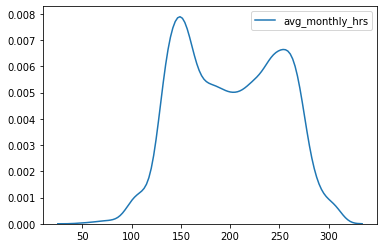

In [44]:
sns.kdeplot(data=df_emp_data.avg_monthly_hrs)

In [45]:
print(df_emp_data.avg_monthly_hrs.skew())
print(df_emp_data.avg_monthly_hrs.kurtosis())

0.01722024100417213
-1.0449371194482797


<AxesSubplot:>

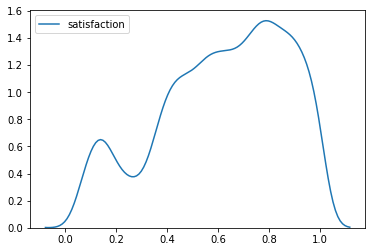

In [46]:
sns.kdeplot(data=df_emp_data.satisfaction)

In [47]:
print(df_emp_data.satisfaction.skew())
print(df_emp_data.satisfaction.kurtosis())

-0.4747826298780177
-0.669097156202433


<AxesSubplot:>

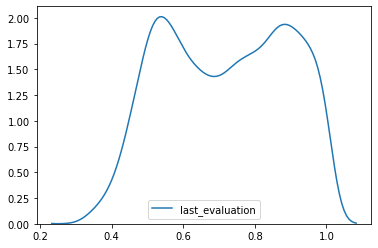

In [48]:
sns.kdeplot(data=df_emp_data.last_evaluation)

In [49]:
print(df_emp_data.last_evaluation.skew())
print(df_emp_data.last_evaluation.kurtosis())

-0.06581659576834953
-1.1985875839942184


<AxesSubplot:>

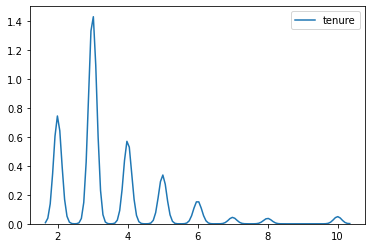

In [50]:
sns.kdeplot(data=df_emp_data.tenure)

In [51]:
print(df_emp_data.tenure.skew())
print(df_emp_data.tenure.kurtosis())

1.8582385764765548
4.778628770777413


<AxesSubplot:>

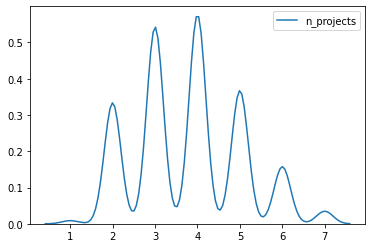

In [52]:
sns.kdeplot(data=df_emp_data.n_projects)

In [53]:
print(df_emp_data.n_projects.skew())
print(df_emp_data.n_projects.kurtosis())

0.31563437508188336
-0.482580539453179


<AxesSubplot:xlabel='avg_monthly_hrs'>

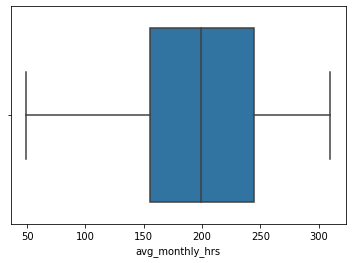

In [54]:
sns.boxplot(x=df_emp_data['avg_monthly_hrs'])

<AxesSubplot:xlabel='satisfaction'>

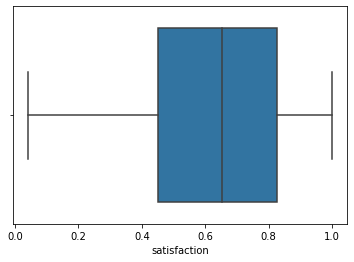

In [55]:
sns.boxplot(x=df_emp_data['satisfaction'])

<AxesSubplot:xlabel='last_evaluation'>

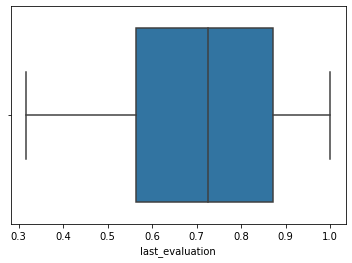

In [56]:
sns.boxplot(x=df_emp_data['last_evaluation'])

<AxesSubplot:xlabel='tenure'>

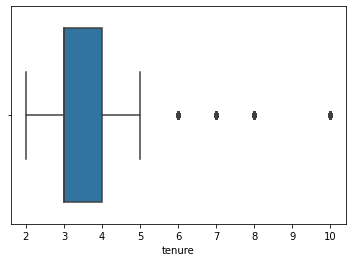

In [57]:
sns.boxplot(x=df_emp_data['tenure'])

<AxesSubplot:xlabel='n_projects'>

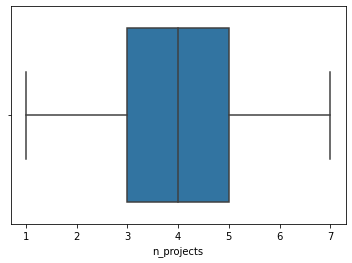

In [58]:
sns.boxplot(x=df_emp_data['n_projects'])

n_projects seems to have outliers

<a id=section432></a>
#### **4.3.2 Replacing Nan in filed_complaint and recently_promoted with 0**

In [59]:
df_emp_data.filed_complaint=df_emp_data.filed_complaint.fillna(0)

In [60]:
df_emp_data.filed_complaint.unique()

array([0., 1.])

In [61]:
df_emp_data.recently_promoted=df_emp_data.recently_promoted.fillna(0)

In [62]:
df_emp_data.recently_promoted.unique()

array([0., 1.])

<a id=section433></a>
#### **4.3.3 Analyzing columns relations and converting salary and status to numeric for further analysis**

In [63]:
df_emp_data.salary=df_emp_data.salary.map({'low':0, 'medium':1, 'high':2})
df_emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    14150 non-null  float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  14150 non-null  float64
 6   salary             14150 non-null  int64  
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 1.2+ MB


In [64]:
df_emp_data.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0       None              0.0         0.866838           6   
1            134.0       None              0.0         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              0.0         0.961360           6   
4            146.0     D00-SS              0.0         0.507349           2   

   recently_promoted  salary  satisfaction status  tenure  employee_id  
0                0.0       1      0.134415   Left     4.0       124467  
1                0.0       0      0.511041   Left     3.0       112210  
2                0.0       1      0.405101   Left     3.0       126150  
3                0.0       0      0.152974   Left     4.0       125346  
4                0.0       1      0.434845   Left     3.0       113707

In [65]:
df_emp_data.status=df_emp_data.status.map({'Employed':0, 'Left':1})
df_emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    14150 non-null  float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  14150 non-null  float64
 6   salary             14150 non-null  int64  
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  int64  
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 1.2+ MB


In [66]:
df_emp_data.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0       None              0.0         0.866838           6   
1            134.0       None              0.0         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              0.0         0.961360           6   
4            146.0     D00-SS              0.0         0.507349           2   

   recently_promoted  salary  satisfaction  status  tenure  employee_id  
0                0.0       1      0.134415       1     4.0       124467  
1                0.0       0      0.511041       1     3.0       112210  
2                0.0       1      0.405101       1     3.0       126150  
3                0.0       0      0.152974       1     4.0       125346  
4                0.0       1      0.434845       1     3.0       113707

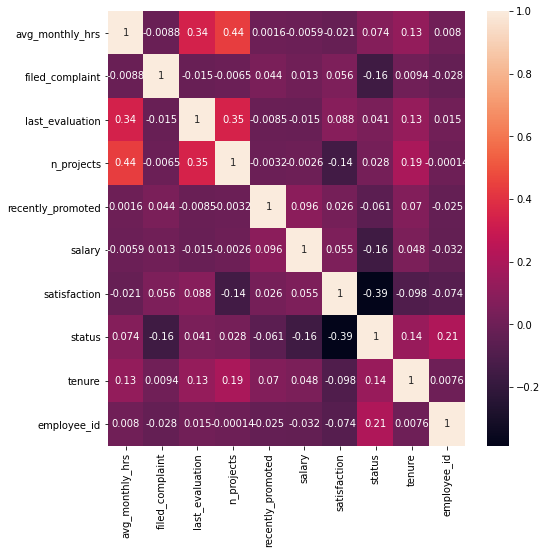

In [67]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df_emp_data.corr(),annot=True)
plt.show()

No strong correlation among any set of columns

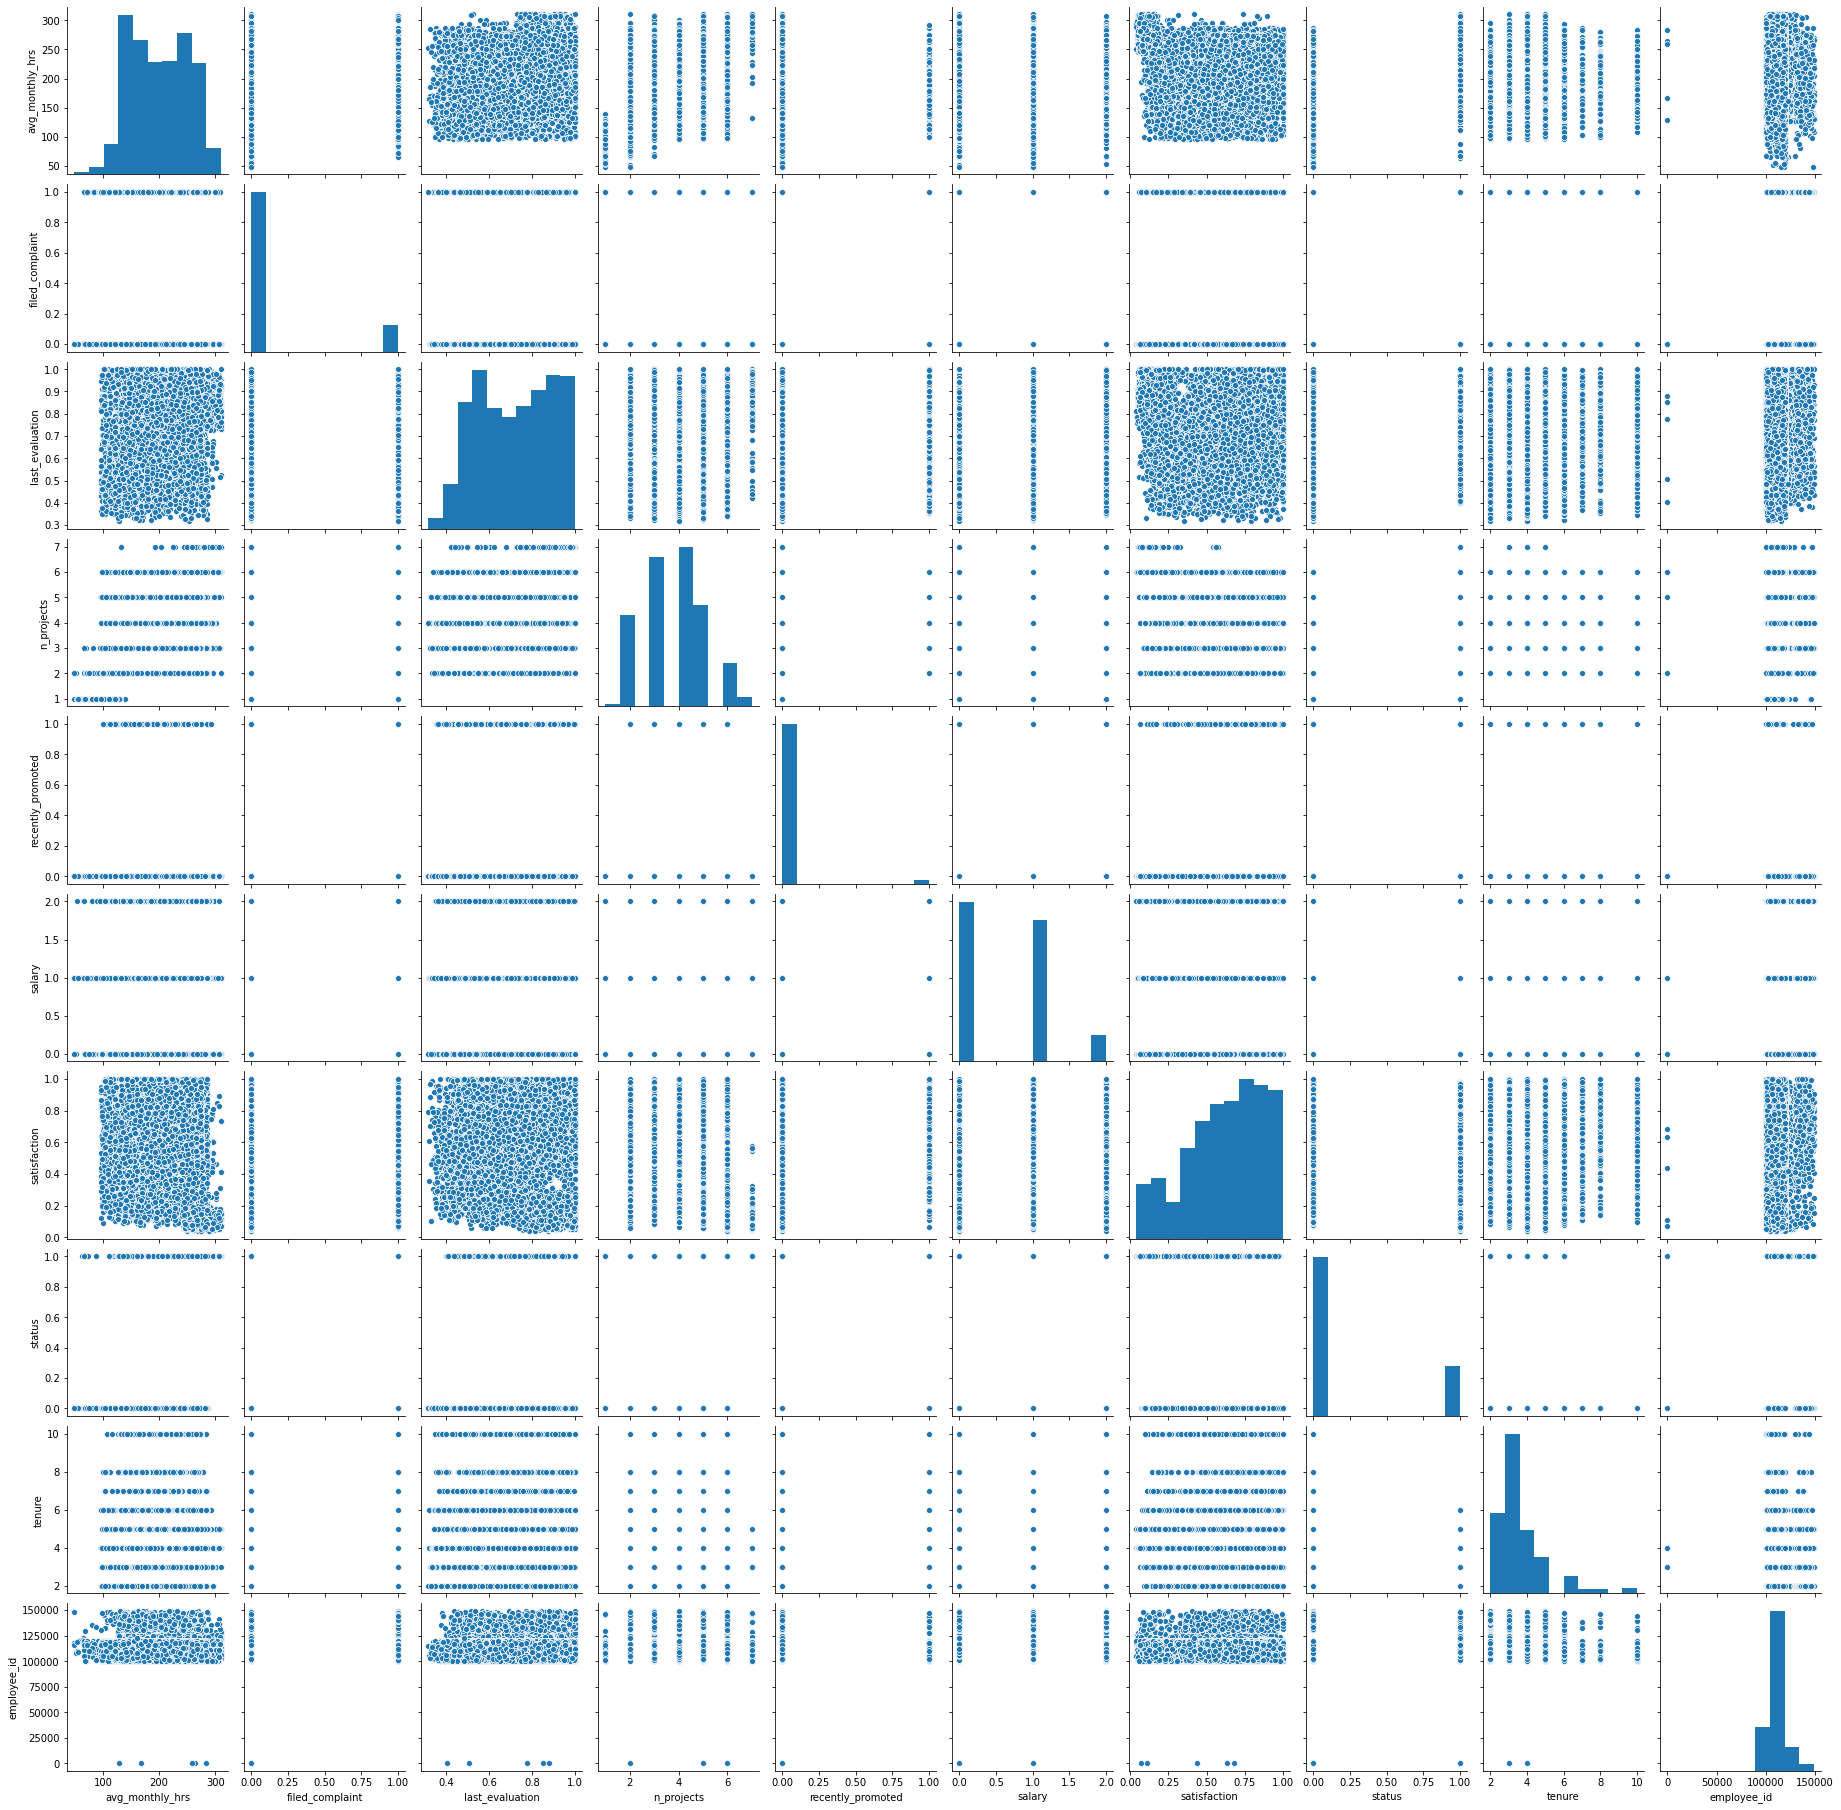

In [68]:
sns.pairplot(data=df_emp_data)

Further from scatter plot, no relation among columns

<a id=section434></a>
#### **4.3.4 Analyzing empty departments**

In [69]:
df_emp_data[df_emp_data.department.isnull()].head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0             246.0       None              0.0         0.866838           6   
1             134.0       None              0.0         0.555718           2   
25            155.0       None              0.0         0.464598           2   
28            156.0       None              0.0              NaN           2   
40            233.0       None              0.0         0.965382           5   

    recently_promoted  salary  satisfaction  status  tenure  employee_id  
0                 0.0       1      0.134415       1     4.0       124467  
1                 0.0       0      0.511041       1     3.0       112210  
25                0.0       1      0.414451       1     3.0       127792  
28                0.0       1      0.465747       1     3.0       128509  
40                0.0       1      0.962314       1     5.0       125077

Based on salary and status, and avg_monthly_hrs, most common department can be found and used to populate missing values

In [70]:
def fill_dept(salary, status, avg_hrs, department):
    if pd.isnull(department):
        try:
            return tmp_department.loc[(salary, status, avg_hrs)]
        except KeyError:
            return department
    else:
        return department

In [71]:
df_emp_data.department.isnull().sum()

707

In [72]:
df_emp_data[df_emp_data['department'].isnull()]

avg_monthly_hrs department  filed_complaint  last_evaluation  \
0                246.0       None              0.0         0.866838   
1                134.0       None              0.0         0.555718   
25               155.0       None              0.0         0.464598   
28               156.0       None              0.0              NaN   
40               233.0       None              0.0         0.965382   
...                ...        ...              ...              ...   
14023            187.0       None              0.0         0.665927   
14036            250.0       None              0.0         0.995384   
14057            247.0       None              0.0         0.373122   
14088            230.0       None              0.0              NaN   
14109            139.0       None              0.0         0.397772   

       n_projects  recently_promoted  salary  satisfaction  status  tenure  \
0               6                0.0       1      0.134415       1     4.0   
1               2                0.0       0      0.511041       1     3.0   
25              2                0.0       1      0.414451       1     3.0   
28              2                0.0       1      0.465747       1     3.0   
40              5                0.0       1      0.962314       1     5.0   
...           ...                ...     ...           ...     ...     ...   
14023           2                0.0       0      0.414367       0     3.0   
14036           3                0.0       1      0.928952       0     3.0   
14057           3                0.0       1      0.186189       0     4.0   
14088           4                0.0       1      0.903135       0     3.0   
14109           3                1.0       1      0.554280       0     8.0   

       employee_id  
0           124467  
1           112210  
25          127792  
28          128509  
40          125077  
...            ...  
14023       109640  
14036       119098  
14057       111995  
14088       106592  
14109       101864  

[707 rows x 11 columns]

In [73]:
df_emp_data.avg_monthly_hrs.min()

49.0

In [74]:
df_emp_data.avg_monthly_hrs.max()

310.0

In [75]:
bins=[40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,330]
df_emp_data['bin_avg_monthly_hrs']=pd.cut(df_emp_data['avg_monthly_hrs'], bins=bins, labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
df_emp_data.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0       None              0.0         0.866838           6   
1            134.0       None              0.0         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              0.0         0.961360           6   
4            146.0     D00-SS              0.0         0.507349           2   

   recently_promoted  salary  satisfaction  status  tenure  employee_id  \
0                0.0       1      0.134415       1     4.0       124467   
1                0.0       0      0.511041       1     3.0       112210   
2                0.0       1      0.405101       1     3.0       126150   
3                0.0       0      0.152974       1     4.0       125346   
4                0.0       1      0.434845       1     3.0       113707   

  bin_avg_monthly_hrs  
0                  11  
1                   5  
2                   6  
3                  11  
4                   6

In [76]:
tmp_department=df_emp_data[df_emp_data.department.notnull()][['salary','status','bin_avg_monthly_hrs','department']]
tmp_department

salary  status bin_avg_monthly_hrs department
2           1       1                   6     D00-SS
3           0       1                  11     D00-SP
4           1       1                   6     D00-SS
5           0       1                   5     D00-MT
6           0       1                  12     D00-PD
...       ...     ...                 ...        ...
14145       1       0                  11     D00-SS
14146       1       0                   8     D00-SS
14147       1       0                   7     D00-MN
14148       1       1                  12     D00-MT
14149       0       0                  12     D00-IT

[13443 rows x 4 columns]

In [77]:
tmp_department[(tmp_department.status==1) & (tmp_department.salary==1) & (tmp_department.bin_avg_monthly_hrs==7)]['department'].mode()[0]

'D00-IT'

In [78]:
def fill_empty_dept(salary, status, avg_hrs, department):
    if pd.isnull(department):
        try:
            return tmp_department[(tmp_department.status==status) & (tmp_department.salary==salary) & (tmp_department.bin_avg_monthly_hrs==avg_hrs)]['department'].mode()[0]
        except KeyError:
            return department
    else:
        return department

In [79]:
df_emp_data['department']=df_emp_data.apply(lambda x:fill_empty_dept(x['salary'],x['status'],x['bin_avg_monthly_hrs'], x['department']), axis=1)

In [80]:
df_emp_data.department.isnull().sum()

0

In [81]:
df_emp_data[df_emp_data.department.isnull()]

Empty DataFrame
Columns: [avg_monthly_hrs, department, filed_complaint, last_evaluation, n_projects, recently_promoted, salary, satisfaction, status, tenure, employee_id, bin_avg_monthly_hrs]
Index: []

In [82]:
df_emp_data.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0     D00-SS              0.0         0.866838           6   
1            134.0     D00-SS              0.0         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              0.0         0.961360           6   
4            146.0     D00-SS              0.0         0.507349           2   

   recently_promoted  salary  satisfaction  status  tenure  employee_id  \
0                0.0       1      0.134415       1     4.0       124467   
1                0.0       0      0.511041       1     3.0       112210   
2                0.0       1      0.405101       1     3.0       126150   
3                0.0       0      0.152974       1     4.0       125346   
4                0.0       1      0.434845       1     3.0       113707   

  bin_avg_monthly_hrs  
0                  11  
1                   5  
2                   6  
3                  11  
4                   6

In [83]:
df_emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   avg_monthly_hrs      14150 non-null  float64 
 1   department           14150 non-null  object  
 2   filed_complaint      14150 non-null  float64 
 3   last_evaluation      12663 non-null  float64 
 4   n_projects           14150 non-null  int64   
 5   recently_promoted    14150 non-null  float64 
 6   salary               14150 non-null  int64   
 7   satisfaction         14000 non-null  float64 
 8   status               14150 non-null  int64   
 9   tenure               14000 non-null  float64 
 10  employee_id          14150 non-null  int64   
 11  bin_avg_monthly_hrs  14150 non-null  category
dtypes: category(1), float64(6), int64(4), object(1)
memory usage: 1.2+ MB


In [84]:
df_emp_data.bin_avg_monthly_hrs=df_emp_data.bin_avg_monthly_hrs.astype('int')

In [85]:
df_emp_data.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0     D00-SS              0.0         0.866838           6   
1            134.0     D00-SS              0.0         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              0.0         0.961360           6   
4            146.0     D00-SS              0.0         0.507349           2   

   recently_promoted  salary  satisfaction  status  tenure  employee_id  \
0                0.0       1      0.134415       1     4.0       124467   
1                0.0       0      0.511041       1     3.0       112210   
2                0.0       1      0.405101       1     3.0       126150   
3                0.0       0      0.152974       1     4.0       125346   
4                0.0       1      0.434845       1     3.0       113707   

   bin_avg_monthly_hrs  
0                   11  
1                    5  
2                    6  
3                   11  
4                    6

In [86]:
df_emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   avg_monthly_hrs      14150 non-null  float64
 1   department           14150 non-null  object 
 2   filed_complaint      14150 non-null  float64
 3   last_evaluation      12663 non-null  float64
 4   n_projects           14150 non-null  int64  
 5   recently_promoted    14150 non-null  float64
 6   salary               14150 non-null  int64  
 7   satisfaction         14000 non-null  float64
 8   status               14150 non-null  int64  
 9   tenure               14000 non-null  float64
 10  employee_id          14150 non-null  int64  
 11  bin_avg_monthly_hrs  14150 non-null  int32  
dtypes: float64(6), int32(1), int64(4), object(1)
memory usage: 1.2+ MB


<a id=section435></a>
#### **4.3.5 Analyzing empty last evaluation values**

In [87]:
df_emp_data.last_evaluation.isnull().sum()

1487

In [88]:
tmp_df=df_emp_data[df_emp_data.last_evaluation.notnull()][['department','salary','n_projects','tenure','bin_avg_monthly_hrs', 'last_evaluation']]
tmp_df.head(20)

department  salary  n_projects  tenure  bin_avg_monthly_hrs  \
0      D00-SS       1           6     4.0                   11   
1      D00-SS       0           2     3.0                    5   
2      D00-SS       1           2     3.0                    6   
3      D00-SP       0           6     4.0                   11   
4      D00-SS       1           2     3.0                    6   
5      D00-MT       0           2     3.0                    5   
6      D00-PD       0           6     4.0                   12   
7      D00-IT       1           6     5.0                   11   
8      D00-IT       0           7     4.0                   13   
9      D00-SS       1           6     4.0                   13   
10     D00-SP       0           6     4.0                   12   
11     D00-SP       0           5     6.0                   12   
12     D00-AD       0           5     5.0                   11   
13     D00-MT       0           2     3.0                    6   
14     D00-SS       1           4     5.0                   12   
15     D00-MN       1           7     4.0                   11   
16     D00-SS       1           5     5.0                   11   
17     D00-SS       1           2     3.0                    5   
18     D00-PD       0           5     5.0                   12   
19     D00-SS       0           2     3.0                    6   

    last_evaluation  
0          0.866838  
1          0.555718  
2          0.474082  
3          0.961360  
4          0.507349  
5          0.482184  
6          0.867087  
7          0.926197  
8          0.929858  
9          0.907965  
10         0.867086  
11         0.953585  
12         0.886631  
13         0.521682  
14         0.959077  
15         0.943946  
16         0.897617  
17         0.504768  
18         1.000000  
19         0.440299

Last evaluation null values can be filled based on Department+salary+tenure+n_project+avg_montly_hrs

In [89]:
df_emp_data[df_emp_data.last_evaluation.isnull()]

avg_monthly_hrs department  filed_complaint  last_evaluation  \
21               127.0    D00-ENG              0.0              NaN   
28               156.0     D00-SS              0.0              NaN   
39               154.0     D00-SP              0.0              NaN   
44               125.0     D00-TP              0.0              NaN   
49               159.0    D00-ENG              0.0              NaN   
...                ...        ...              ...              ...   
14083            201.0     D00-SP              0.0              NaN   
14088            230.0     D00-SS              0.0              NaN   
14097            194.0     D00-SP              0.0              NaN   
14110            228.0     D00-SS              0.0              NaN   
14118            257.0     D00-SP              0.0              NaN   

       n_projects  recently_promoted  salary  satisfaction  status  tenure  \
21              2                0.0       0      0.370515       1     3.0   
28              2                0.0       1      0.465747       1     3.0   
39              2                1.0       1      0.440152       1     3.0   
44              3                0.0       1           NaN       1     NaN   
49              2                0.0       2      0.375978       1     3.0   
...           ...                ...     ...           ...     ...     ...   
14083           5                0.0       1      0.921704       0     3.0   
14088           4                0.0       1      0.903135       0     3.0   
14097           2                0.0       0      0.543278       0     2.0   
14110           3                1.0       1      0.684318       0     2.0   
14118           3                0.0       1      0.944942       0     3.0   

       employee_id  bin_avg_monthly_hrs  
21          114322                    5  
28          128509                    6  
39          110293                    6  
44          120360                    5  
49          111951                    6  
...            ...                  ...  
14083       139911                    9  
14088       106592                   10  
14097       108528                    8  
14110       109996                   10  
14118       106064                   11  

[1487 rows x 12 columns]

In [90]:
tmp_df[(tmp_df.department=='D00-ENG') & (tmp_df.salary==0) & (tmp_df.n_projects==2) & (tmp_df.bin_avg_monthly_hrs==5) & (tmp_df.tenure==3)]['last_evaluation'].mean()

0.4957069322033898

In [91]:
def fill_empty_lasteval(department, salary, n_projects, avg_hrs, tenure, last_evaluation):
    if pd.isnull(last_evaluation):
        try:
            return tmp_df[(tmp_df.department==department) & (tmp_df.salary==salary) & (tmp_df.n_projects==n_projects) & (tmp_df.bin_avg_monthly_hrs==avg_hrs) & (tmp_df.tenure==tenure)]['last_evaluation'].mean()
        except KeyError:
            return last_evaluation
    else:
        return last_evaluation

In [92]:
df_emp_data['last_evaluation']=df_emp_data.apply(lambda x:fill_empty_lasteval(x['department'],x['salary'],x['n_projects'],x['bin_avg_monthly_hrs'],x['tenure'], x['last_evaluation']), axis=1)

In [93]:
df_emp_data[df_emp_data.last_evaluation.isnull()]

avg_monthly_hrs department  filed_complaint  last_evaluation  \
44               125.0     D00-TP              0.0              NaN   
245              124.0     D00-TP              0.0              NaN   
251              119.0     D00-TP              0.0              NaN   
414              126.0     D00-TP              0.0              NaN   
468               65.0     D00-TP              0.0              NaN   
...                ...        ...              ...              ...   
13905            132.0     D00-TP              0.0              NaN   
13935            242.0     D00-MT              0.0              NaN   
13960            116.0     D00-TP              0.0              NaN   
13971            187.0     D00-AD              0.0              NaN   
13997            155.0    D00-ENG              0.0              NaN   

       n_projects  recently_promoted  salary  satisfaction  status  tenure  \
44              3                0.0       1           NaN       1     NaN   
245             3                0.0       0           NaN       1     NaN   
251             2                0.0       1           NaN       1     NaN   
414             2                0.0       0           NaN       1     NaN   
468             1                0.0       2           NaN       1     NaN   
...           ...                ...     ...           ...     ...     ...   
13905           2                0.0       1           NaN       1     NaN   
13935           2                0.0       1      0.796925       0     2.0   
13960           2                0.0       0           NaN       0     NaN   
13971           4                0.0       0      0.634592       0     2.0   
13997           2                0.0       0      0.718588       0     2.0   

       employee_id  bin_avg_monthly_hrs  
44          120360                    5  
245         116012                    5  
251         116287                    4  
414         115235                    5  
468         122769                    2  
...            ...                  ...  
13905       106482                    5  
13935       110517                   11  
13960       105231                    4  
13971       110551                    8  
13997       119716                    6  

[239 rows x 12 columns]

There are still empty values in last_evaluation as few columns on which it is dependent are empty.

So, can tey filling them up and then come back to populate it

<a id=section436></a>
#### **4.3.6 Analyzing empty satisfaction values**

satisfaction null values can be filled based on Department+salary+status

In [94]:
tmp_df1=df_emp_data[df_emp_data.satisfaction.notnull()][['department','salary','status', 'satisfaction']]
tmp_df1.head(20)

department  salary  status  satisfaction
0      D00-SS       1       1      0.134415
1      D00-SS       0       1      0.511041
2      D00-SS       1       1      0.405101
3      D00-SP       0       1      0.152974
4      D00-SS       1       1      0.434845
5      D00-MT       0       1      0.381545
6      D00-PD       0       1      0.172575
7      D00-IT       1       1      0.061868
8      D00-IT       0       1      0.161744
9      D00-SS       1       1      0.105749
10     D00-SP       0       1      0.121133
11     D00-SP       0       1      0.871310
12     D00-AD       0       1      0.265318
13     D00-MT       0       1      0.387475
14     D00-SS       1       1      0.960757
15     D00-MN       1       1      0.171328
16     D00-SS       1       1      0.753731
17     D00-SS       1       1      0.485149
18     D00-PD       0       1      0.799562
19     D00-SS       0       1      0.415771

In [95]:
df_emp_data.satisfaction.isnull().sum()

150

In [96]:
df_emp_data[df_emp_data.satisfaction.isnull()]

avg_monthly_hrs department  filed_complaint  last_evaluation  \
44               125.0     D00-TP              0.0              NaN   
245              124.0     D00-TP              0.0              NaN   
251              119.0     D00-TP              0.0              NaN   
414              126.0     D00-TP              0.0              NaN   
468               65.0     D00-TP              0.0              NaN   
...                ...        ...              ...              ...   
13741            122.0     D00-TP              0.0              NaN   
13774             49.0     D00-TP              0.0              NaN   
13841             97.0     D00-TP              1.0              NaN   
13905            132.0     D00-TP              0.0              NaN   
13960            116.0     D00-TP              0.0              NaN   

       n_projects  recently_promoted  salary  satisfaction  status  tenure  \
44              3                0.0       1           NaN       1     NaN   
245             3                0.0       0           NaN       1     NaN   
251             2                0.0       1           NaN       1     NaN   
414             2                0.0       0           NaN       1     NaN   
468             1                0.0       2           NaN       1     NaN   
...           ...                ...     ...           ...     ...     ...   
13741           2                0.0       1           NaN       0     NaN   
13774           2                0.0       0           NaN       0     NaN   
13841           1                0.0       1           NaN       0     NaN   
13905           2                0.0       1           NaN       1     NaN   
13960           2                0.0       0           NaN       0     NaN   

       employee_id  bin_avg_monthly_hrs  
44          120360                    5  
245         116012                    5  
251         116287                    4  
414         115235                    5  
468         122769                    2  
...            ...                  ...  
13741       111990                    5  
13774       148021                    1  
13841       116171                    3  
13905       106482                    5  
13960       105231                    4  

[150 rows x 12 columns]

In [97]:
tmp_df1[(tmp_df1.department=='D00-TP') & (tmp_df1.salary==1) & (tmp_df1.status==1)]['satisfaction'].mean()

nan

In [98]:
def fill_empty_satis(department, salary, status, satisfaction):
    if pd.isnull(satisfaction):
        try:
            return tmp_df1[(tmp_df1.department==department) & (tmp_df1.salary==salary) & (tmp_df1.status==status) ]['satisfaction'].mean()
        except KeyError:
            return satisfaction
    else:
        return satisfaction

In [99]:
df_emp_data['satisfaction']=df_emp_data.apply(lambda x:fill_empty_satis(x['department'],x['salary'],x['status'], x['satisfaction']), axis=1)

In [100]:
df_emp_data.satisfaction.isnull().sum()

28

In [101]:
df_emp_data[df_emp_data.satisfaction.isnull()]

avg_monthly_hrs department  filed_complaint  last_evaluation  \
44               125.0     D00-TP              0.0              NaN   
245              124.0     D00-TP              0.0              NaN   
251              119.0     D00-TP              0.0              NaN   
414              126.0     D00-TP              0.0              NaN   
468               65.0     D00-TP              0.0              NaN   
729              139.0     D00-TP              0.0              NaN   
779               63.0     D00-TP              0.0              NaN   
913               72.0     D00-TP              0.0              NaN   
930               87.0     D00-TP              0.0              NaN   
993               68.0     D00-TP              1.0              NaN   
1332              74.0     D00-TP              0.0              NaN   
1345              67.0     D00-TP              0.0              NaN   
1645             129.0     D00-TP              0.0              NaN   
3045             127.0     D00-TP              1.0              NaN   
3839             100.0     D00-TP              0.0              NaN   
3890             125.0     D00-TP              0.0              NaN   
5044              81.0     D00-TP              0.0              NaN   
5608             112.0     D00-TP              0.0              NaN   
6823              67.0     D00-TP              0.0              NaN   
7272             127.0     D00-TP              0.0              NaN   
7485              89.0     D00-TP              0.0              NaN   
8230             127.0     D00-TP              1.0              NaN   
8672              67.0     D00-TP              0.0              NaN   
10619             54.0     D00-TP              0.0              NaN   
12036             95.0     D00-TP              1.0              NaN   
12303            115.0     D00-TP              0.0              NaN   
12398            111.0     D00-TP              0.0              NaN   
13905            132.0     D00-TP              0.0              NaN   

       n_projects  recently_promoted  salary  satisfaction  status  tenure  \
44              3                0.0       1           NaN       1     NaN   
245             3                0.0       0           NaN       1     NaN   
251             2                0.0       1           NaN       1     NaN   
414             2                0.0       0           NaN       1     NaN   
468             1                0.0       2           NaN       1     NaN   
729             1                0.0       1           NaN       1     NaN   
779             1                0.0       1           NaN       1     NaN   
913             1                0.0       1           NaN       1     NaN   
930             2                0.0       1           NaN       1     NaN   
993             1                0.0       0           NaN       1     NaN   
1332            1                0.0       0           NaN       1     NaN   
1345            1                0.0       1           NaN       1     NaN   
1645            2                0.0       0           NaN       1     NaN   
3045            1                0.0       2           NaN       0     NaN   
3839            2                0.0       2           NaN       0     NaN   
3890            3                0.0       0           NaN       1     NaN   
5044            1                0.0       2           NaN       0     NaN   
5608            2                0.0       0           NaN       1     NaN   
6823            3                0.0       2           NaN       0     NaN   
7272            2                0.0       1           NaN       1     NaN   
7485            2                0.0       2           NaN       0     NaN   
8230            3                0.0       1           NaN       1     NaN   
8672            2                0.0       0           NaN       1     NaN   
10619           1                0.0       2           NaN       0     NaN 

satisfaction still empty in few records, will analyze them later

<a id=section437></a>
#### **4.3.7 Analyzing empty tenure values**

Get mode value of tenire grouped by department and n_project

In [102]:
tmp_df2=df_emp_data[df_emp_data.tenure.notnull()][['department','n_projects', 'tenure']]
tmp_df2.head(20)

department  n_projects  tenure
0      D00-SS           6     4.0
1      D00-SS           2     3.0
2      D00-SS           2     3.0
3      D00-SP           6     4.0
4      D00-SS           2     3.0
5      D00-MT           2     3.0
6      D00-PD           6     4.0
7      D00-IT           6     5.0
8      D00-IT           7     4.0
9      D00-SS           6     4.0
10     D00-SP           6     4.0
11     D00-SP           5     6.0
12     D00-AD           5     5.0
13     D00-MT           2     3.0
14     D00-SS           4     5.0
15     D00-MN           7     4.0
16     D00-SS           5     5.0
17     D00-SS           2     3.0
18     D00-PD           5     5.0
19     D00-SS           2     3.0

In [103]:
df_emp_data.tenure.isnull().sum()

150

In [104]:
df_emp_data[df_emp_data.tenure.isnull()]

avg_monthly_hrs department  filed_complaint  last_evaluation  \
44               125.0     D00-TP              0.0              NaN   
245              124.0     D00-TP              0.0              NaN   
251              119.0     D00-TP              0.0              NaN   
414              126.0     D00-TP              0.0              NaN   
468               65.0     D00-TP              0.0              NaN   
...                ...        ...              ...              ...   
13741            122.0     D00-TP              0.0              NaN   
13774             49.0     D00-TP              0.0              NaN   
13841             97.0     D00-TP              1.0              NaN   
13905            132.0     D00-TP              0.0              NaN   
13960            116.0     D00-TP              0.0              NaN   

       n_projects  recently_promoted  salary  satisfaction  status  tenure  \
44              3                0.0       1           NaN       1     NaN   
245             3                0.0       0           NaN       1     NaN   
251             2                0.0       1           NaN       1     NaN   
414             2                0.0       0           NaN       1     NaN   
468             1                0.0       2           NaN       1     NaN   
...           ...                ...     ...           ...     ...     ...   
13741           2                0.0       1      0.519995       0     NaN   
13774           2                0.0       0      0.766470       0     NaN   
13841           1                0.0       1      0.519995       0     NaN   
13905           2                0.0       1           NaN       1     NaN   
13960           2                0.0       0      0.766470       0     NaN   

       employee_id  bin_avg_monthly_hrs  
44          120360                    5  
245         116012                    5  
251         116287                    4  
414         115235                    5  
468         122769                    2  
...            ...                  ...  
13741       111990                    5  
13774       148021                    1  
13841       116171                    3  
13905       106482                    5  
13960       105231                    4  

[150 rows x 12 columns]

In [105]:
tmp_df2[(tmp_df2.department=='D00-TP') & (tmp_df2.n_projects==1)]['tenure'].median()

nan

In [106]:
def fill_empty_tenure(department, n_projects, tenure):
    if pd.isnull(tenure):
        try:
            return tmp_df2[(tmp_df2.department==department) & (tmp_df2.n_projects==n_projects) ]['tenure'].median()
        except KeyError:
            return tenure
    else:
        return tenure

In [107]:
df_emp_data['tenure']=df_emp_data.apply(lambda x:fill_empty_tenure(x['department'],x['n_projects'], x['tenure']), axis=1)

In [108]:
df_emp_data.tenure.isnull().sum()

140

In [109]:
df_emp_data[df_emp_data.tenure.isnull()]

avg_monthly_hrs department  filed_complaint  last_evaluation  \
251              119.0     D00-TP              0.0              NaN   
414              126.0     D00-TP              0.0              NaN   
468               65.0     D00-TP              0.0              NaN   
729              139.0     D00-TP              0.0              NaN   
779               63.0     D00-TP              0.0              NaN   
...                ...        ...              ...              ...   
13741            122.0     D00-TP              0.0              NaN   
13774             49.0     D00-TP              0.0              NaN   
13841             97.0     D00-TP              1.0              NaN   
13905            132.0     D00-TP              0.0              NaN   
13960            116.0     D00-TP              0.0              NaN   

       n_projects  recently_promoted  salary  satisfaction  status  tenure  \
251             2                0.0       1           NaN       1     NaN   
414             2                0.0       0           NaN       1     NaN   
468             1                0.0       2           NaN       1     NaN   
729             1                0.0       1           NaN       1     NaN   
779             1                0.0       1           NaN       1     NaN   
...           ...                ...     ...           ...     ...     ...   
13741           2                0.0       1      0.519995       0     NaN   
13774           2                0.0       0      0.766470       0     NaN   
13841           1                0.0       1      0.519995       0     NaN   
13905           2                0.0       1           NaN       1     NaN   
13960           2                0.0       0      0.766470       0     NaN   

       employee_id  bin_avg_monthly_hrs  
251         116287                    4  
414         115235                    5  
468         122769                    2  
729         123723                    5  
779         120313                    2  
...            ...                  ...  
13741       111990                    5  
13774       148021                    1  
13841       116171                    3  
13905       106482                    5  
13960       105231                    4  

[140 rows x 12 columns]

<a id=section438></a>
#### **4.3.8 Analyzing and populating remaining NaNs in dataframe fields**

In [110]:
df_emp_data.isnull().sum()

avg_monthly_hrs          0
department               0
filed_complaint          0
last_evaluation        239
n_projects               0
recently_promoted        0
salary                   0
satisfaction            28
status                   0
tenure                 140
employee_id              0
bin_avg_monthly_hrs      0
dtype: int64

<a id=section4381></a>
##### **4.3.8.1 Analyzing tenure**

In [111]:
tmp=df_emp_data[df_emp_data.tenure.isnull()]
tmp.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
251            119.0     D00-TP              0.0              NaN           2   
414            126.0     D00-TP              0.0              NaN           2   
468             65.0     D00-TP              0.0              NaN           1   
729            139.0     D00-TP              0.0              NaN           1   
779             63.0     D00-TP              0.0              NaN           1   

     recently_promoted  salary  satisfaction  status  tenure  employee_id  \
251                0.0       1           NaN       1     NaN       116287   
414                0.0       0           NaN       1     NaN       115235   
468                0.0       2           NaN       1     NaN       122769   
729                0.0       1           NaN       1     NaN       123723   
779                0.0       1           NaN       1     NaN       120313   

     bin_avg_monthly_hrs  
251                    4  
414                    5  
468                    2  
729                    5  
779                    2

In [112]:
tmp.department.unique()

array(['D00-TP'], dtype=object)

**All the record where department='D00-TP' can be deleted**

In [113]:
df_emp_data[df_emp_data.department=='D00-TP']

avg_monthly_hrs department  filed_complaint  last_evaluation  \
44               125.0     D00-TP              0.0              NaN   
245              124.0     D00-TP              0.0              NaN   
251              119.0     D00-TP              0.0              NaN   
414              126.0     D00-TP              0.0              NaN   
468               65.0     D00-TP              0.0              NaN   
...                ...        ...              ...              ...   
13741            122.0     D00-TP              0.0              NaN   
13774             49.0     D00-TP              0.0              NaN   
13841             97.0     D00-TP              1.0              NaN   
13905            132.0     D00-TP              0.0              NaN   
13960            116.0     D00-TP              0.0              NaN   

       n_projects  recently_promoted  salary  satisfaction  status  tenure  \
44              3                0.0       1           NaN       1     3.0   
245             3                0.0       0           NaN       1     3.0   
251             2                0.0       1           NaN       1     NaN   
414             2                0.0       0           NaN       1     NaN   
468             1                0.0       2           NaN       1     NaN   
...           ...                ...     ...           ...     ...     ...   
13741           2                0.0       1      0.519995       0     NaN   
13774           2                0.0       0      0.766470       0     NaN   
13841           1                0.0       1      0.519995       0     NaN   
13905           2                0.0       1           NaN       1     NaN   
13960           2                0.0       0      0.766470       0     NaN   

       employee_id  bin_avg_monthly_hrs  
44          120360                    5  
245         116012                    5  
251         116287                    4  
414         115235                    5  
468         122769                    2  
...            ...                  ...  
13741       111990                    5  
13774       148021                    1  
13841       116171                    3  
13905       106482                    5  
13960       105231                    4  

[153 rows x 12 columns]

In [114]:
emp_data_df=df_emp_data[df_emp_data.department!='D00-TP'].copy()

In [115]:
emp_data_df.isnull().sum()

avg_monthly_hrs         0
department              0
filed_complaint         0
last_evaluation        88
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
employee_id             0
bin_avg_monthly_hrs     0
dtype: int64

<a id=section4382></a>
##### **4.3.8.2 Analyzing last_evaluation based on updated dataframe**

In [116]:
tmp_df=emp_data_df[emp_data_df.last_evaluation.notnull()][['department','salary','n_projects','tenure','bin_avg_monthly_hrs', 'last_evaluation']]
tmp_df.head(20)

department  salary  n_projects  tenure  bin_avg_monthly_hrs  \
0      D00-SS       1           6     4.0                   11   
1      D00-SS       0           2     3.0                    5   
2      D00-SS       1           2     3.0                    6   
3      D00-SP       0           6     4.0                   11   
4      D00-SS       1           2     3.0                    6   
5      D00-MT       0           2     3.0                    5   
6      D00-PD       0           6     4.0                   12   
7      D00-IT       1           6     5.0                   11   
8      D00-IT       0           7     4.0                   13   
9      D00-SS       1           6     4.0                   13   
10     D00-SP       0           6     4.0                   12   
11     D00-SP       0           5     6.0                   12   
12     D00-AD       0           5     5.0                   11   
13     D00-MT       0           2     3.0                    6   
14     D00-SS       1           4     5.0                   12   
15     D00-MN       1           7     4.0                   11   
16     D00-SS       1           5     5.0                   11   
17     D00-SS       1           2     3.0                    5   
18     D00-PD       0           5     5.0                   12   
19     D00-SS       0           2     3.0                    6   

    last_evaluation  
0          0.866838  
1          0.555718  
2          0.474082  
3          0.961360  
4          0.507349  
5          0.482184  
6          0.867087  
7          0.926197  
8          0.929858  
9          0.907965  
10         0.867086  
11         0.953585  
12         0.886631  
13         0.521682  
14         0.959077  
15         0.943946  
16         0.897617  
17         0.504768  
18         1.000000  
19         0.440299

In [117]:
emp_data_df.last_evaluation.isnull().sum()

88

In [118]:
def fill_empty_lasteval(department, salary, n_projects, avg_hrs, tenure, last_evaluation):
    if pd.isnull(last_evaluation):
        try:
            return tmp_df[(tmp_df.department==department) & (tmp_df.salary==salary) & (tmp_df.n_projects==n_projects) & (tmp_df.bin_avg_monthly_hrs==avg_hrs) & (tmp_df.tenure==tenure)]['last_evaluation'].mean()
        except KeyError:
            return last_evaluation
    else:
        return last_evaluation

In [119]:
emp_data_df['last_evaluation']=emp_data_df.apply(lambda x:fill_empty_lasteval(x['department'],x['salary'],x['n_projects'],x['bin_avg_monthly_hrs'],x['tenure'], x['last_evaluation']), axis=1)

In [120]:
emp_data_df.last_evaluation.isnull().sum()

88

In [121]:
emp_data_df[emp_data_df.last_evaluation.isnull()]

avg_monthly_hrs department  filed_complaint  last_evaluation  \
1702             154.0     D00-SP              0.0              NaN   
1872             151.0    D00-ENG              0.0              NaN   
1917             134.0     D00-IT              0.0              NaN   
1945             260.0     D00-PR              0.0              NaN   
1964             280.0     D00-FN              0.0              NaN   
...                ...        ...              ...              ...   
13153            205.0     D00-MT              0.0              NaN   
13227            283.0     D00-IT              0.0              NaN   
13935            242.0     D00-MT              0.0              NaN   
13971            187.0     D00-AD              0.0              NaN   
13997            155.0    D00-ENG              0.0              NaN   

       n_projects  recently_promoted  salary  satisfaction  status  tenure  \
1702            3                0.0       2      0.638969       0     3.0   
1872            6                0.0       0      0.409562       0     2.0   
1917            5                0.0       2      0.705559       0     3.0   
1945            3                0.0       0      0.954338       0     2.0   
1964            2                0.0       1      0.854033       0     3.0   
...           ...                ...     ...           ...     ...     ...   
13153           3                0.0       2      0.831848       0     3.0   
13227           3                0.0       0      0.550004       0     3.0   
13935           2                0.0       1      0.796925       0     2.0   
13971           4                0.0       0      0.634592       0     2.0   
13997           2                0.0       0      0.718588       0     2.0   

       employee_id  bin_avg_monthly_hrs  
1702        103758                    6  
1872        108594                    6  
1917        104573                    5  
1945        119567                   11  
1964        105435                   12  
...            ...                  ...  
13153       108910                    9  
13227       130084                   13  
13935       110517                   11  
13971       110551                    8  
13997       119716                    6  

[88 rows x 12 columns]

These records can be removed from dataframe where still last_evaluation is null

In [122]:
emp_data_df=emp_data_df[emp_data_df.last_evaluation.notnull()]
emp_data_df.describe()

avg_monthly_hrs  filed_complaint  last_evaluation    n_projects  \
count     13909.000000     13909.000000     13909.000000  13909.000000   
mean        201.107412         0.143720         0.715063      3.801136   
std          49.918579         0.350818         0.168634      1.235149   
min          96.000000         0.000000         0.316175      2.000000   
25%         156.000000         0.000000         0.565752      3.000000   
50%         200.000000         0.000000         0.719804      4.000000   
75%         245.000000         0.000000         0.861169      5.000000   
max         310.000000         1.000000         1.000000      7.000000   

       recently_promoted        salary  satisfaction        status  \
count       13909.000000  13909.000000  13909.000000  13909.000000   
mean            0.021137      0.589618      0.620847      0.240420   
std             0.143847      0.632816      0.250721      0.427354   
min             0.000000      0.000000      0.040058      0.000000   
25%             0.000000      0.000000      0.449336      0.000000   
50%             0.000000      1.000000      0.652143      0.000000   
75%             0.000000      1.000000      0.824547      0.000000   
max             1.000000      2.000000      1.000000      1.000000   

             tenure    employee_id  bin_avg_monthly_hrs  
count  13909.000000   13909.000000         13909.000000  
mean       3.505356  112074.741534             8.527500  
std        1.464734    8736.124440             2.525549  
min        2.000000       0.000000             3.000000  
25%        3.000000  105767.000000             6.000000  
50%        3.000000  111304.000000             8.000000  
75%        4.000000  116659.000000            11.000000  
max       10.000000  148988.000000            14.000000

In [123]:
emp_data_df.isnull().sum()

avg_monthly_hrs        0
department             0
filed_complaint        0
last_evaluation        0
n_projects             0
recently_promoted      0
salary                 0
satisfaction           0
status                 0
tenure                 0
employee_id            0
bin_avg_monthly_hrs    0
dtype: int64

<a id=section439></a>
#### **4.3.9 Checking category columns counts**

In [124]:
emp_data_df.recently_promoted.value_counts()

0.0    13615
1.0      294
Name: recently_promoted, dtype: int64

In [125]:
emp_data_df.filed_complaint.value_counts()

0.0    11910
1.0     1999
Name: filed_complaint, dtype: int64

In [126]:
emp_data_df.status.value_counts()

0    10565
1     3344
Name: status, dtype: int64

In [127]:
(emp_data_df[emp_data_df.status==0].shape[0]/emp_data_df.shape[0])*100

75.95801279746927

In [128]:
(emp_data_df[emp_data_df.status==1].shape[0]/emp_data_df.shape[0])*100

24.041987202530734

There are around 76% status for Employed and 24% for Left, so imbalance dataset might need upsampling/downsampling before modelling

<a id=section404></a>
### **4.4 Merging Employee data and Employee details**

In [129]:
emp_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13909 entries, 0 to 14149
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   avg_monthly_hrs      13909 non-null  float64
 1   department           13909 non-null  object 
 2   filed_complaint      13909 non-null  float64
 3   last_evaluation      13909 non-null  float64
 4   n_projects           13909 non-null  int64  
 5   recently_promoted    13909 non-null  float64
 6   salary               13909 non-null  int64  
 7   satisfaction         13909 non-null  float64
 8   status               13909 non-null  int64  
 9   tenure               13909 non-null  float64
 10  employee_id          13909 non-null  int64  
 11  bin_avg_monthly_hrs  13909 non-null  int32  
dtypes: float64(6), int32(1), int64(4), object(1)
memory usage: 1.3+ MB


In [130]:
df_emp_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [131]:
df_employee_data=pd.merge(emp_data_df, df_emp_det, on='employee_id', how='left')
df_employee_data.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0     D00-SS              0.0         0.866838           6   
1            134.0     D00-SS              0.0         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              0.0         0.961360           6   
4            146.0     D00-SS              0.0         0.507349           2   

   recently_promoted  salary  satisfaction  status  tenure  employee_id  \
0                0.0       1      0.134415       1     4.0       124467   
1                0.0       0      0.511041       1     3.0       112210   
2                0.0       1      0.405101       1     3.0       126150   
3                0.0       0      0.152974       1     4.0       125346   
4                0.0       1      0.434845       1     3.0       113707   

   bin_avg_monthly_hrs   age  gender marital_status  
0                   11  42.0  Female        Married  
1                    5  23.0  Female      Unmarried  
2                    6  24.0  Female      Unmarried  
3                   11  51.0  Female        Married  
4                    6  23.0  Female      Unmarried

In [132]:
df_employee_data.shape

(13909, 15)

**Checking records(if any) for employee id=0 so it can be removed**

In [133]:
df_employee_data[df_employee_data.employee_id==0]

avg_monthly_hrs department  filed_complaint  last_evaluation  \
34               284.0     D00-SS              0.0         0.852702   
301              264.0    D00-ENG              0.0         0.774554   
1224             129.0     D00-SP              0.0         0.402660   
11110            167.0     D00-SS              0.0         0.880053   
12094            259.0    D00-ENG              0.0         0.505883   

       n_projects  recently_promoted  salary  satisfaction  status  tenure  \
34              6                0.0       0      0.069168       1     4.0   
301             6                0.0       0      0.110974       1     4.0   
1224            2                0.0       1      0.437359       1     3.0   
11110           5                0.0       0      0.682140       0     3.0   
12094           5                0.0       0      0.631046       0     4.0   

       employee_id  bin_avg_monthly_hrs  age gender marital_status  
34               0                   13  NaN    NaN            NaN  
301              0                   12  NaN    NaN            NaN  
1224             0                    5  NaN    NaN            NaN  
11110            0                    7  NaN    NaN            NaN  
12094            0                   11  NaN    NaN            NaN

In [134]:
df_employee_data=df_employee_data[df_employee_data.employee_id>0]

In [135]:
df_employee_data.shape

(13904, 15)

In [136]:
df_employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13904 entries, 0 to 13908
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   avg_monthly_hrs      13904 non-null  float64
 1   department           13904 non-null  object 
 2   filed_complaint      13904 non-null  float64
 3   last_evaluation      13904 non-null  float64
 4   n_projects           13904 non-null  int64  
 5   recently_promoted    13904 non-null  float64
 6   salary               13904 non-null  int64  
 7   satisfaction         13904 non-null  float64
 8   status               13904 non-null  int64  
 9   tenure               13904 non-null  float64
 10  employee_id          13904 non-null  int64  
 11  bin_avg_monthly_hrs  13904 non-null  int32  
 12  age                  13904 non-null  float64
 13  gender               13904 non-null  object 
 14  marital_status       13904 non-null  object 
dtypes: float64(7), int32(1), int64(4), o

No NaN data

<a id=section405></a>
### **4.5 Merging further with department**

In [137]:
df_employee_info=pd.merge(df_employee_data, df_dept, left_on='department', right_on='dept_id', how='left')
df_employee_info.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0     D00-SS              0.0         0.866838           6   
1            134.0     D00-SS              0.0         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              0.0         0.961360           6   
4            146.0     D00-SS              0.0         0.507349           2   

   recently_promoted  salary  satisfaction  status  tenure  employee_id  \
0                0.0       1      0.134415       1     4.0       124467   
1                0.0       0      0.511041       1     3.0       112210   
2                0.0       1      0.405101       1     3.0       126150   
3                0.0       0      0.152974       1     4.0       125346   
4                0.0       1      0.434845       1     3.0       113707   

   bin_avg_monthly_hrs   age  gender marital_status dept_id dept_name  \
0                   11  42.0  Female        Married  D00-SS     Sales   
1                    5  23.0  Female      Unmarried  D00-SS     Sales   
2                    6  24.0  Female      Unmarried  D00-SS     Sales   
3                   11  51.0  Female        Married  D00-SP   Support   
4                    6  23.0  Female      Unmarried  D00-SS     Sales   

         dept_head  
0  Edward J Bayley  
1  Edward J Bayley  
2  Edward J Bayley  
3   Amelia Westray  
4  Edward J Bayley

In [138]:
df_employee_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13904 entries, 0 to 13903
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   avg_monthly_hrs      13904 non-null  float64
 1   department           13904 non-null  object 
 2   filed_complaint      13904 non-null  float64
 3   last_evaluation      13904 non-null  float64
 4   n_projects           13904 non-null  int64  
 5   recently_promoted    13904 non-null  float64
 6   salary               13904 non-null  int64  
 7   satisfaction         13904 non-null  float64
 8   status               13904 non-null  int64  
 9   tenure               13904 non-null  float64
 10  employee_id          13904 non-null  int64  
 11  bin_avg_monthly_hrs  13904 non-null  int32  
 12  age                  13904 non-null  float64
 13  gender               13904 non-null  object 
 14  marital_status       13904 non-null  object 
 15  dept_id              13904 non-null 

<a id=section5></a>
## **5. Pre-processing and Feature engineering on merged dataset**

In [139]:
df_employee_info.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0     D00-SS              0.0         0.866838           6   
1            134.0     D00-SS              0.0         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              0.0         0.961360           6   
4            146.0     D00-SS              0.0         0.507349           2   

   recently_promoted  salary  satisfaction  status  tenure  employee_id  \
0                0.0       1      0.134415       1     4.0       124467   
1                0.0       0      0.511041       1     3.0       112210   
2                0.0       1      0.405101       1     3.0       126150   
3                0.0       0      0.152974       1     4.0       125346   
4                0.0       1      0.434845       1     3.0       113707   

   bin_avg_monthly_hrs   age  gender marital_status dept_id dept_name  \
0                   11  42.0  Female        Married  D00-SS     Sales   
1                    5  23.0  Female      Unmarried  D00-SS     Sales   
2                    6  24.0  Female      Unmarried  D00-SS     Sales   
3                   11  51.0  Female        Married  D00-SP   Support   
4                    6  23.0  Female      Unmarried  D00-SS     Sales   

         dept_head  
0  Edward J Bayley  
1  Edward J Bayley  
2  Edward J Bayley  
3   Amelia Westray  
4  Edward J Bayley

<a id=section501></a>
### **5.1 Removing dept_id, dept_name and dept_head**

In [140]:
df_employee_info.drop(['dept_id','dept_name','dept_head'], axis=1, inplace=True)

In [141]:
df_employee_info.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0     D00-SS              0.0         0.866838           6   
1            134.0     D00-SS              0.0         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              0.0         0.961360           6   
4            146.0     D00-SS              0.0         0.507349           2   

   recently_promoted  salary  satisfaction  status  tenure  employee_id  \
0                0.0       1      0.134415       1     4.0       124467   
1                0.0       0      0.511041       1     3.0       112210   
2                0.0       1      0.405101       1     3.0       126150   
3                0.0       0      0.152974       1     4.0       125346   
4                0.0       1      0.434845       1     3.0       113707   

   bin_avg_monthly_hrs   age  gender marital_status  
0                   11  42.0  Female        Married  
1                    5  23.0  Female      Unmarried  
2                    6  24.0  Female      Unmarried  
3                   11  51.0  Female        Married  
4                    6  23.0  Female      Unmarried

In [142]:
df_employee_info.gender=df_employee_info.gender.map({'Female':0, 'Male':1})
df_employee_info.marital_status=df_employee_info.marital_status.map({'Married':0, 'Unmarried':1})
df_employee_info.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0     D00-SS              0.0         0.866838           6   
1            134.0     D00-SS              0.0         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              0.0         0.961360           6   
4            146.0     D00-SS              0.0         0.507349           2   

   recently_promoted  salary  satisfaction  status  tenure  employee_id  \
0                0.0       1      0.134415       1     4.0       124467   
1                0.0       0      0.511041       1     3.0       112210   
2                0.0       1      0.405101       1     3.0       126150   
3                0.0       0      0.152974       1     4.0       125346   
4                0.0       1      0.434845       1     3.0       113707   

   bin_avg_monthly_hrs   age  gender  marital_status  
0                   11  42.0       0               0  
1                    5  23.0       0               1  
2                    6  24.0       0               1  
3                   11  51.0       0               0  
4                    6  23.0       0               1

<a id=section502></a>
### **5.2 Converting age to bins**

In [143]:
df_employee_info.age.min()

22.0

In [144]:
df_employee_info.age.max()

57.0

In [145]:
bins=[20,25,30,35,40,45,50,55,60]
df_employee_info['bin_age']=pd.cut(df_employee_info['age'], bins=bins, labels=[1,2,3,4,5,6,7,8])
df_employee_info.head()

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0            246.0     D00-SS              0.0         0.866838           6   
1            134.0     D00-SS              0.0         0.555718           2   
2            156.0     D00-SS              1.0         0.474082           2   
3            256.0     D00-SP              0.0         0.961360           6   
4            146.0     D00-SS              0.0         0.507349           2   

   recently_promoted  salary  satisfaction  status  tenure  employee_id  \
0                0.0       1      0.134415       1     4.0       124467   
1                0.0       0      0.511041       1     3.0       112210   
2                0.0       1      0.405101       1     3.0       126150   
3                0.0       0      0.152974       1     4.0       125346   
4                0.0       1      0.434845       1     3.0       113707   

   bin_avg_monthly_hrs   age  gender  marital_status bin_age  
0                   11  42.0       0               0       5  
1                    5  23.0       0               1       1  
2                    6  24.0       0               1       1  
3                   11  51.0       0               0       7  
4                    6  23.0       0               1       1

In [146]:
df_employee_info.bin_age=df_employee_info.bin_age.astype('int')

In [147]:
df_employee_info.bin_avg_monthly_hrs=df_employee_info.bin_avg_monthly_hrs.astype('int')

<a id=section503></a>
### **5.3 Checking for outliers**

In [148]:
df_employee_info.describe()

avg_monthly_hrs  filed_complaint  last_evaluation    n_projects  \
count     13904.000000     13904.000000     13904.000000  13904.000000   
mean        201.100403         0.143772         0.715074      3.800777   
std          49.912756         0.350871         0.168624      1.234911   
min          96.000000         0.000000         0.316175      2.000000   
25%         156.000000         0.000000         0.565796      3.000000   
50%         200.000000         0.000000         0.719796      4.000000   
75%         245.000000         0.000000         0.861173      5.000000   
max         310.000000         1.000000         1.000000      7.000000   

       recently_promoted        salary  satisfaction        status  \
count       13904.000000  13904.000000  13904.000000  13904.000000   
mean            0.021145      0.589758      0.620932      0.240291   
std             0.143873      0.632841      0.250680      0.427275   
min             0.000000      0.000000      0.040058      0.000000   
25%             0.000000      0.000000      0.449570      0.000000   
50%             0.000000      1.000000      0.652164      0.000000   
75%             0.000000      1.000000      0.824750      0.000000   
max             1.000000      2.000000      1.000000      1.000000   

             tenure    employee_id  bin_avg_monthly_hrs           age  \
count  13904.000000   13904.000000         13904.000000  13904.000000   
mean       3.505322  112115.044591             8.527114     32.978855   
std        1.464967    8475.164507             2.525249      9.997244   
min        2.000000  100101.000000             3.000000     22.000000   
25%        3.000000  105773.500000             6.000000     24.000000   
50%        3.000000  111306.500000             8.000000     29.000000   
75%        4.000000  116660.250000            11.000000     41.000000   
max       10.000000  148988.000000            14.000000     57.000000   

             gender  marital_status       bin_age  
count  13904.000000    13904.000000  13904.000000  
mean       0.657077        0.505898      2.977057  
std        0.474703        0.499983      2.031219  
min        0.000000        0.000000      1.000000  
25%        0.000000        0.000000      1.000000  
50%        1.000000        1.000000      2.000000  
75%        1.000000        1.000000      5.000000  
max        1.000000        1.000000      8.000000

In [149]:
def get_outlier_info(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    #print (IQR)
    return df[((df<(Q1-IQR*1.5)) | (df>(Q3+IQR*1.5))).any(axis=1)]

In [150]:
df_employee_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13904 entries, 0 to 13903
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   avg_monthly_hrs      13904 non-null  float64
 1   department           13904 non-null  object 
 2   filed_complaint      13904 non-null  float64
 3   last_evaluation      13904 non-null  float64
 4   n_projects           13904 non-null  int64  
 5   recently_promoted    13904 non-null  float64
 6   salary               13904 non-null  int64  
 7   satisfaction         13904 non-null  float64
 8   status               13904 non-null  int64  
 9   tenure               13904 non-null  float64
 10  employee_id          13904 non-null  int64  
 11  bin_avg_monthly_hrs  13904 non-null  int32  
 12  age                  13904 non-null  float64
 13  gender               13904 non-null  int64  
 14  marital_status       13904 non-null  int64  
 15  bin_age              13904 non-null 

In [151]:
tmp_emp_df=df_employee_info.drop('department', axis=1)
tmp_emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13904 entries, 0 to 13903
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   avg_monthly_hrs      13904 non-null  float64
 1   filed_complaint      13904 non-null  float64
 2   last_evaluation      13904 non-null  float64
 3   n_projects           13904 non-null  int64  
 4   recently_promoted    13904 non-null  float64
 5   salary               13904 non-null  int64  
 6   satisfaction         13904 non-null  float64
 7   status               13904 non-null  int64  
 8   tenure               13904 non-null  float64
 9   employee_id          13904 non-null  int64  
 10  bin_avg_monthly_hrs  13904 non-null  int32  
 11  age                  13904 non-null  float64
 12  gender               13904 non-null  int64  
 13  marital_status       13904 non-null  int64  
 14  bin_age              13904 non-null  int32  
dtypes: float64(7), int32(2), int64(6)
me

In [152]:
tmp=get_outlier_info(tmp_emp_df)
print (tmp.shape)

tmp.head()

(6438, 15)


avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
0            246.0              0.0         0.866838           6   
1            134.0              0.0         0.555718           2   
2            156.0              1.0         0.474082           2   
3            256.0              0.0         0.961360           6   
4            146.0              0.0         0.507349           2   

   recently_promoted  salary  satisfaction  status  tenure  employee_id  \
0                0.0       1      0.134415       1     4.0       124467   
1                0.0       0      0.511041       1     3.0       112210   
2                0.0       1      0.405101       1     3.0       126150   
3                0.0       0      0.152974       1     4.0       125346   
4                0.0       1      0.434845       1     3.0       113707   

   bin_avg_monthly_hrs   age  gender  marital_status  bin_age  
0                   11  42.0       0               0        5  
1                    5  23.0       0               1        1  
2                    6  24.0       0               1        1  
3                   11  51.0       0               0        7  
4                    6  23.0       0               1        1

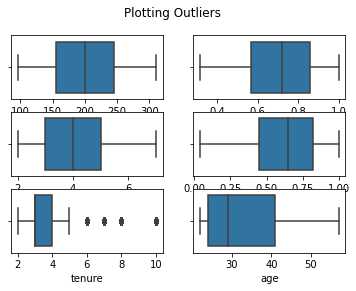

In [153]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)

fig.suptitle('Plotting Outliers')

sns.boxplot(x=df_employee_info.avg_monthly_hrs, ax=ax1)
sns.boxplot(x=df_employee_info.last_evaluation, ax=ax2)
sns.boxplot(x=df_employee_info.n_projects, ax=ax3)

sns.boxplot(x=df_employee_info.satisfaction, ax=ax4)
sns.boxplot(x=df_employee_info.tenure, ax=ax5)
sns.boxplot(x=df_employee_info.age, ax=ax6)

plt.rcParams['figure.figsize'] = 20, 10
plt.show()

tenure seems to have outliers - so we can mantain 2 datasets, with outliers and without outliers and can apply ML algos on both datasets

<a id=section504></a>
### **5.4 Checking relation among columns**

<AxesSubplot:>

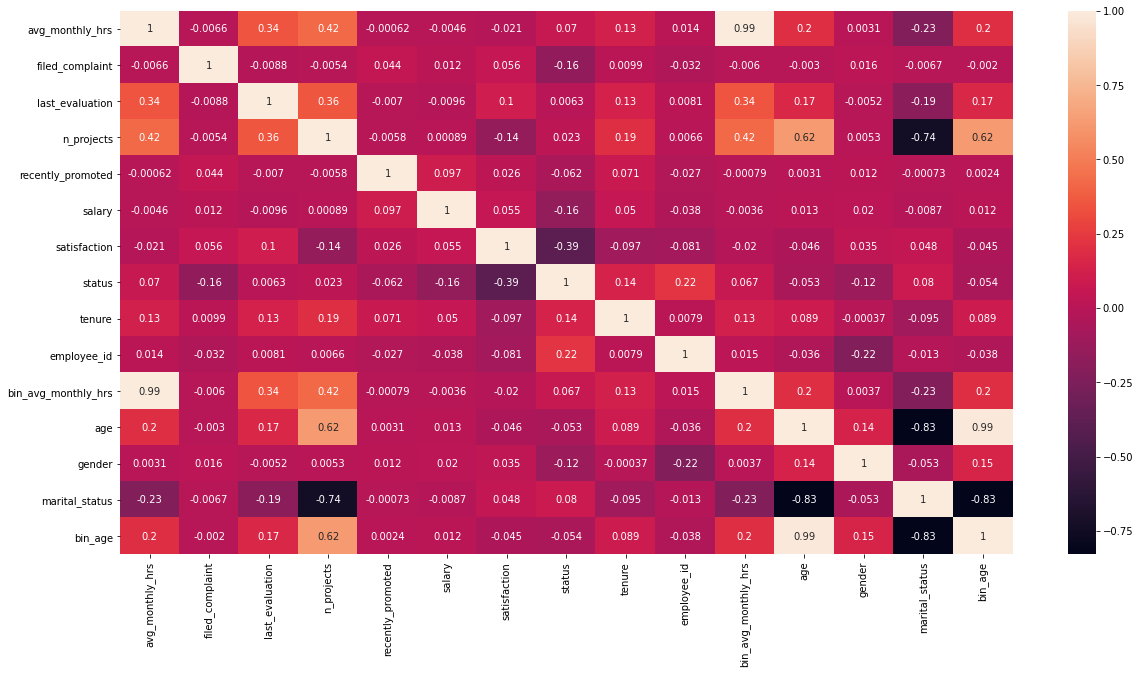

In [154]:
tmp_emp_df=df_employee_info.drop('department', axis=1)
sns.heatmap(data=tmp_emp_df.corr(), annot=True)

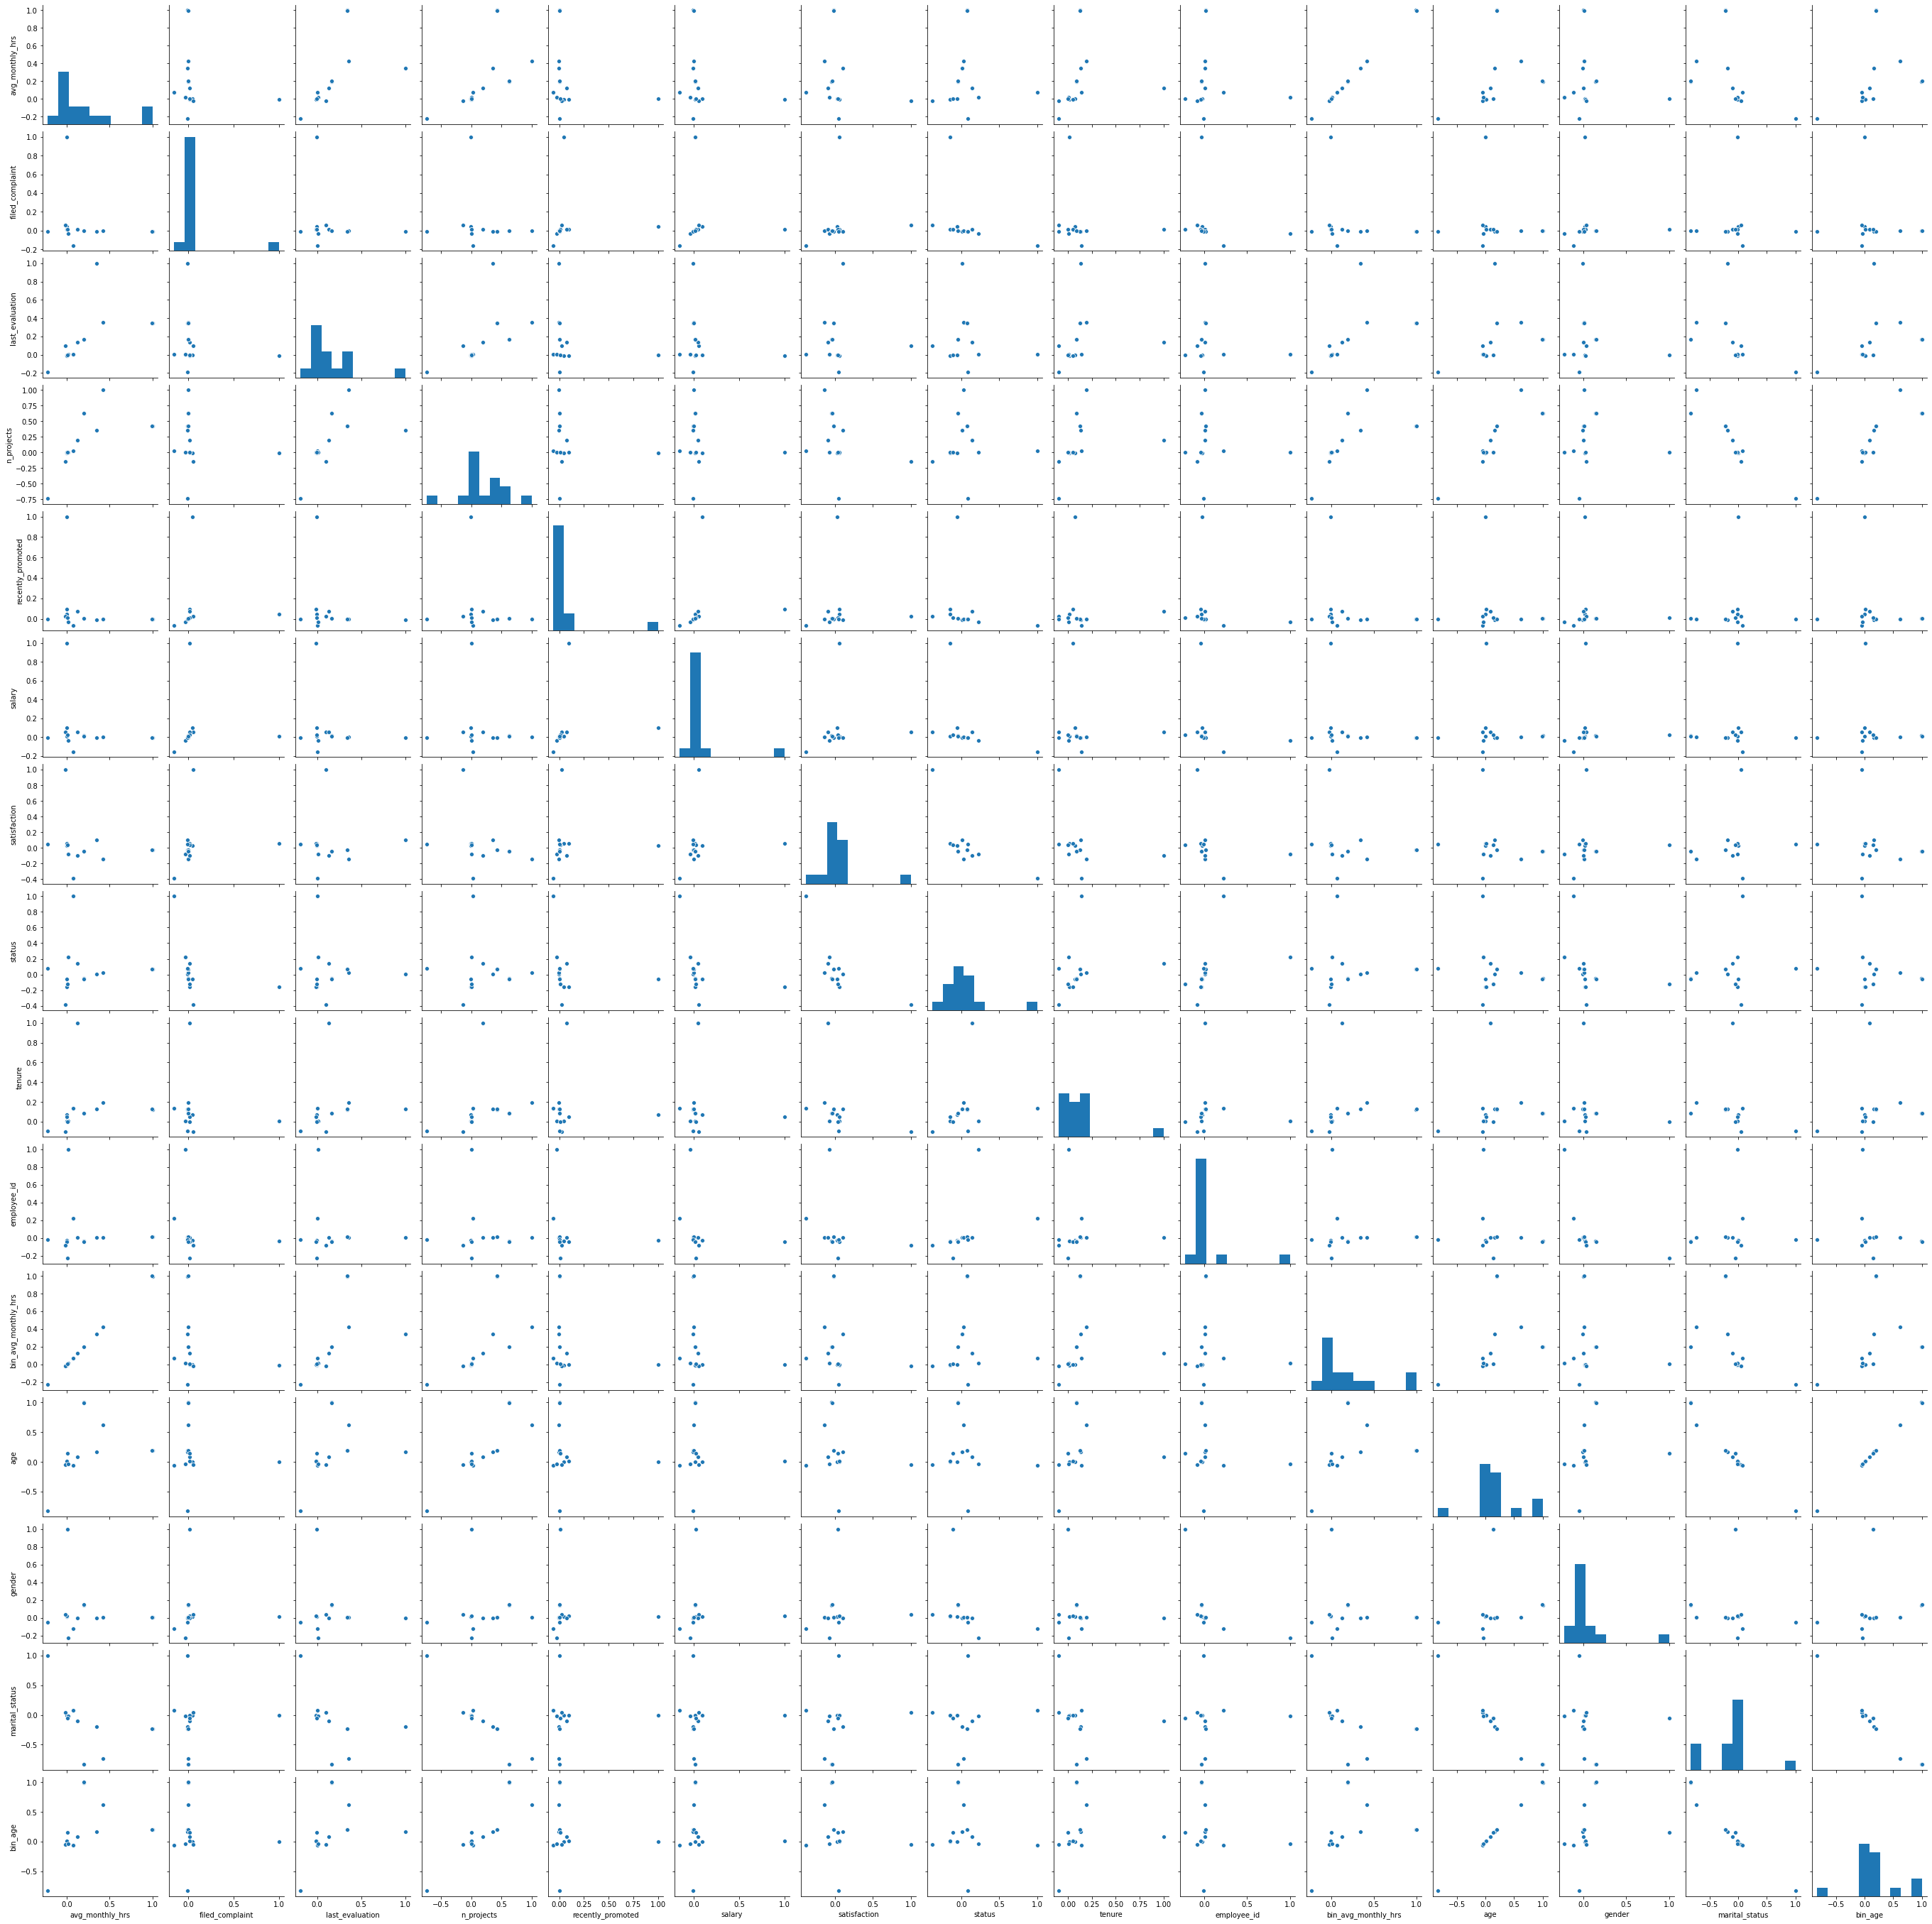

In [155]:
tmp_emp_df=df_employee_info.drop('department', axis=1)
sns.pairplot(data=tmp_emp_df.corr(),diag_kind='hist')

 - avg_monthly_hrs seems to have slight postibe correlation with last_evaluation and n_projects
 - bin_age and age are highly correlated, which is obvious, so one of the column will be deleted from final dataset
 - avg_monthly_hrs and bin_avg_monthly_hrs are highly correlated which is obvious, so one of the column will be deleted from final dataset
 - n_projects and marital status seems to be highly negative correlated
 - age and marital status seems to be highly negative correlated

Can consider below dataset for further analysis

- without bin_age and bin_avg_monthly_hrs 
- without age and avg_monthly_hrs

In [156]:
df_employee_info=pd.get_dummies(df_employee_info, columns=['department'],drop_first=True)
df_employee_info.head()

avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
0            246.0              0.0         0.866838           6   
1            134.0              0.0         0.555718           2   
2            156.0              1.0         0.474082           2   
3            256.0              0.0         0.961360           6   
4            146.0              0.0         0.507349           2   

   recently_promoted  salary  satisfaction  status  tenure  employee_id  ...  \
0                0.0       1      0.134415       1     4.0       124467  ...   
1                0.0       0      0.511041       1     3.0       112210  ...   
2                0.0       1      0.405101       1     3.0       126150  ...   
3                0.0       0      0.152974       1     4.0       125346  ...   
4                0.0       1      0.434845       1     3.0       113707  ...   

   bin_age  department_D00-ENG  department_D00-FN  department_D00-IT  \
0        5                   0                  0                  0   
1        1                   0                  0                  0   
2        1                   0                  0                  0   
3        7                   0                  0                  0   
4        1                   0                  0                  0   

   department_D00-MN  department_D00-MT  department_D00-PD  department_D00-PR  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   department_D00-SP  department_D00-SS  
0                  0                  1  
1                  0                  1  
2                  0                  1  
3                  1                  0  
4                  0                  1  

[5 rows x 24 columns]

<a id=section505></a>
### **5.5 Feature analysis using PyCaret**

In [157]:
df_employee_info1=df_employee_info.drop(['bin_age', 'bin_avg_monthly_hrs','marital_status'], axis=1)
df_employee_info2=df_employee_info.drop(['age', 'avg_monthly_hrs','marital_status'], axis=1)

In [158]:
df_employee_info1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13904 entries, 0 to 13903
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_monthly_hrs     13904 non-null  float64
 1   filed_complaint     13904 non-null  float64
 2   last_evaluation     13904 non-null  float64
 3   n_projects          13904 non-null  int64  
 4   recently_promoted   13904 non-null  float64
 5   salary              13904 non-null  int64  
 6   satisfaction        13904 non-null  float64
 7   status              13904 non-null  int64  
 8   tenure              13904 non-null  float64
 9   employee_id         13904 non-null  int64  
 10  age                 13904 non-null  float64
 11  gender              13904 non-null  int64  
 12  department_D00-ENG  13904 non-null  uint8  
 13  department_D00-FN   13904 non-null  uint8  
 14  department_D00-IT   13904 non-null  uint8  
 15  department_D00-MN   13904 non-null  uint8  
 16  depa

In [159]:
df_employee_info2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13904 entries, 0 to 13903
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   filed_complaint      13904 non-null  float64
 1   last_evaluation      13904 non-null  float64
 2   n_projects           13904 non-null  int64  
 3   recently_promoted    13904 non-null  float64
 4   salary               13904 non-null  int64  
 5   satisfaction         13904 non-null  float64
 6   status               13904 non-null  int64  
 7   tenure               13904 non-null  float64
 8   employee_id          13904 non-null  int64  
 9   bin_avg_monthly_hrs  13904 non-null  int32  
 10  gender               13904 non-null  int64  
 11  bin_age              13904 non-null  int32  
 12  department_D00-ENG   13904 non-null  uint8  
 13  department_D00-FN    13904 non-null  uint8  
 14  department_D00-IT    13904 non-null  uint8  
 15  department_D00-MN    13904 non-null 

In [160]:
!pip install pycaret

You should consider upgrading via the 'c:\users\nigam\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [161]:
from pycaret.classification import *

<a id=section551></a>
#### **5..5.1 Using dataset1**

In [162]:
dataset1 = setup(data = df_employee_info1, target = 'status', normalize=True, feature_selection=True, session_id=123)

Setup Succesfully Completed!


In [164]:
bestacc = compare_models(sort='Accuracy', exclude=['qda'])

In [165]:
bestauc = compare_models(sort='AUC', exclude=['qda'])

In [166]:
bestrecall = compare_models(sort='Recall', exclude=['qda'])

In [167]:
bestprecision = compare_models(sort='Precision', exclude=['qda'])

In [168]:
bestf1 = compare_models(sort='F1', exclude=['qda'])

In [169]:
xgb_model=create_model('xgboost')

In [170]:
tuned_xgb_model=tune_model(xgb_model,  optimize='F1')

In [171]:
lgbm_model=create_model('lightgbm')

In [172]:
tuned_lgbm_model=tune_model(lgbm_model, optimize='F1')

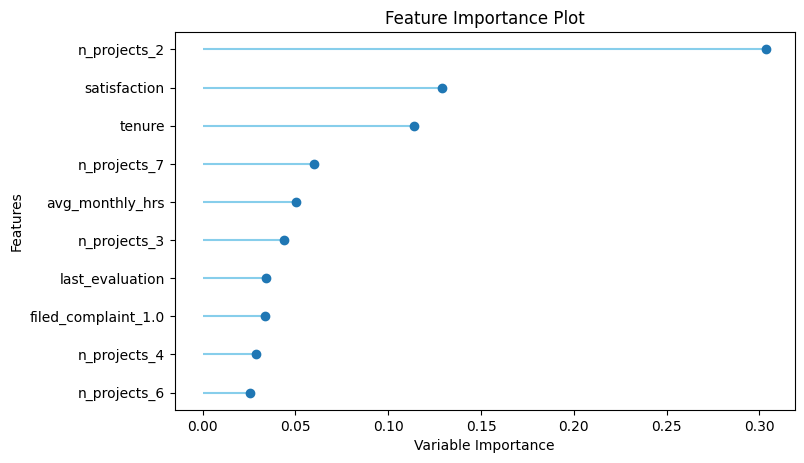

In [173]:
plot_model(xgb_model, plot='feature')

In [174]:
dataset11 = setup(data = df_employee_info1, target = 'status', normalize=True, feature_selection=True, session_id=125, fix_imbalance=True)

Setup Succesfully Completed!


In [175]:
bestacc = compare_models(sort='Accuracy', exclude=['qda', 'lda'])

In [176]:
bestauc = compare_models(sort='AUC', exclude=['qda'])

In [177]:
bestrecall = compare_models(sort='Recall', exclude=['qda'])

In [178]:
bestprecision = compare_models(sort='Precision', exclude=['qda'])

In [179]:
bestf1 = compare_models(sort='F1', exclude=['qda'])

In [180]:
xgb_model=create_model('xgboost')

In [181]:
tuned_xgb_model=tune_model(xgb_model,  optimize='F1')

In [182]:
lgbm_model=create_model('lightgbm')

In [183]:
tuned_lgbm_model=tune_model(lgbm_model, optimize='F1')

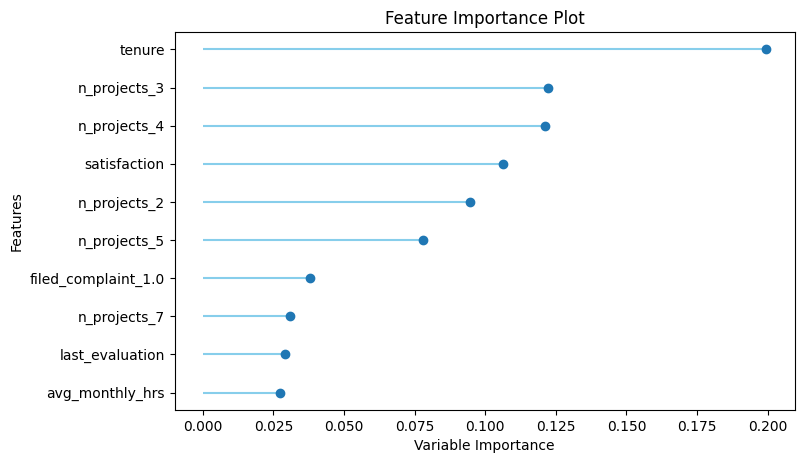

In [184]:
plot_model(xgb_model, plot='feature')

<a id=section552></a>
#### **5.5.2 Using dataset2**

In [185]:
dataset2 = setup(data = df_employee_info2, target = 'status', normalize=True, feature_selection=True, session_id=124)

Setup Succesfully Completed!


In [186]:
bestacc1 = compare_models(sort='Accuracy', exclude=['qda'])

In [187]:
bestauc1 = compare_models(sort='AUC', exclude=['qda'])

In [188]:
bestrecall1 = compare_models(sort='Recall', exclude=['qda'])

In [189]:
bestprecision1 = compare_models(sort='Precision', exclude=['qda'])

In [190]:
bestf11 = compare_models(sort='F1', exclude=['qda'])

In [191]:
xgb_model=create_model('xgboost')

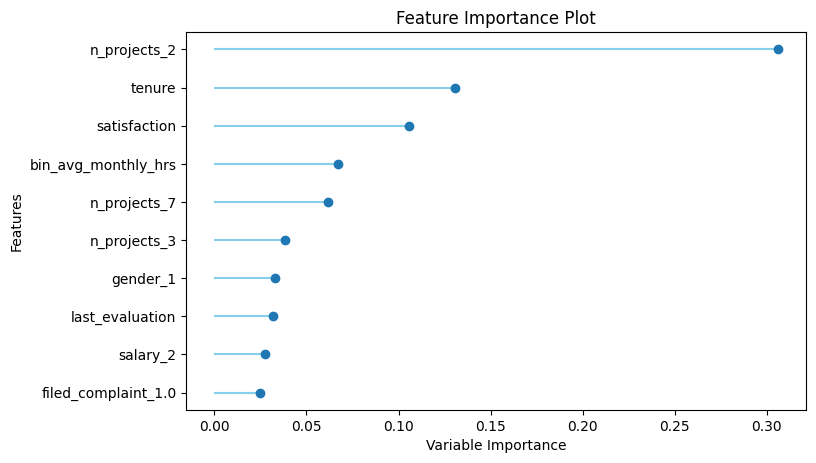

In [192]:
plot_model(xgb_model, plot='feature')

In [193]:
dataset21 = setup(data = df_employee_info2, target = 'status', normalize=True, feature_selection=True, session_id=126, fix_imbalance=True)

Setup Succesfully Completed!


In [194]:
bestacc1 = compare_models(sort='Accuracy', exclude=['qda'])

In [195]:
bestauc1 = compare_models(sort='AUC', exclude=['qda'])

In [196]:
bestrecall1 = compare_models(sort='Recall', exclude=['qda'])

In [197]:
bestprecision1 = compare_models(sort='Precision', exclude=['qda'])

In [198]:
bestf11 = compare_models(sort='F1', exclude=['qda'])

In [199]:
xgb_model=create_model('xgboost')

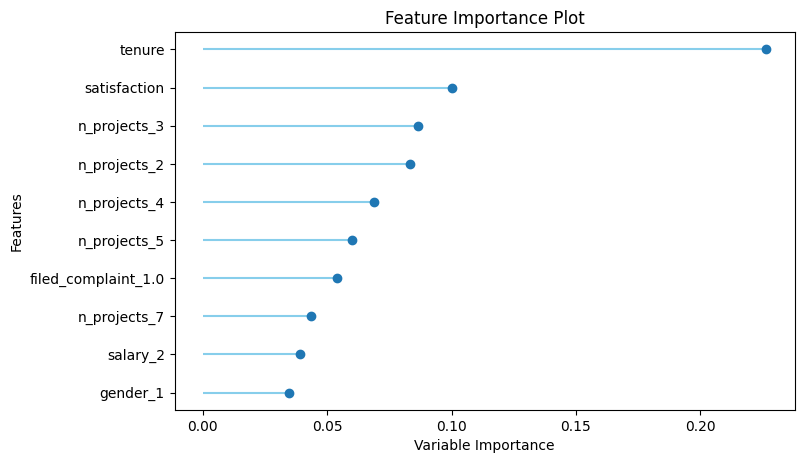

In [200]:
plot_model(xgb_model, plot='feature')

Results seems to be better for dataset1 without imbalance fix and below algos worked better

- LGBM
- CatBoost
- XGBoost
- Random Forest
- Xtra Trees Classifier

And tenure and n_projects seems to be important features

<a id=section506></a>
### **5.6 Checking important feature**



In [216]:
df_employee_info1.drop('employee_id', axis=1, inplace=True)
df_employee_info2.drop('employee_id', axis=1, inplace=True)

In [220]:
def plot_features_kBest_chi(X,Y):
    
    bestfeatures=SelectKBest(score_func=chi2, k='all')
    fit=bestfeatures.fit(X,Y)
    dfscores=pd.DataFrame(fit.scores_)
    dfcolumns=pd.DataFrame(X.columns)

    plt.figure(figsize=(6,6))
    featureScores=pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns=['Features', 'Score']
    sns.barplot(x='Score', y='Features', data=featureScores.sort_values(by='Score', ascending=False).head(20))
    plt.show()

In [221]:
def plot_features_kBest_classif(X,Y):
    
    bestfeatures=SelectKBest(score_func=f_classif, k='all')
    fit=bestfeatures.fit(X,Y)
    dfscores=pd.DataFrame(fit.scores_)
    dfcolumns=pd.DataFrame(X.columns)

    plt.figure(figsize=(6,6))
    featureScores=pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns=['Features', 'Score']
    sns.barplot(x='Score', y='Features', data=featureScores.sort_values(by='Score', ascending=False).head(20))
    plt.show()

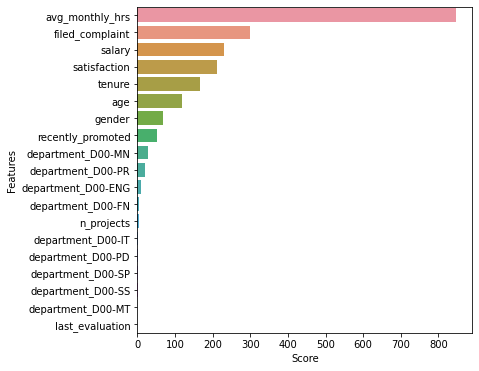

In [222]:
plot_features_kBest_chi(df_employee_info1.drop('status', axis=1), df_employee_info1['status'])

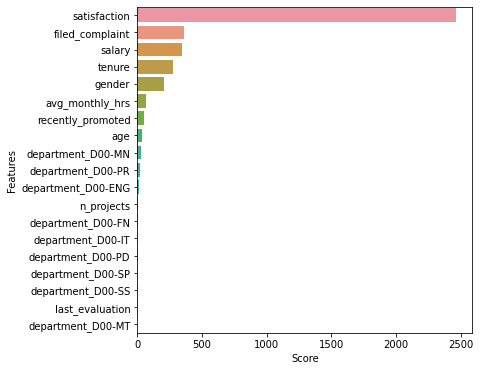

In [223]:
plot_features_kBest_classif(df_employee_info1.drop('status', axis=1), df_employee_info1['status'])

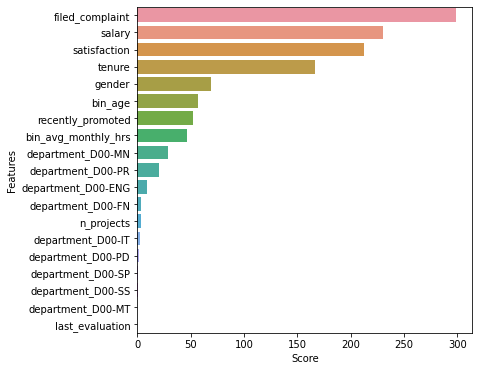

In [224]:
plot_features_kBest_chi(df_employee_info2.drop('status', axis=1), df_employee_info2['status'])

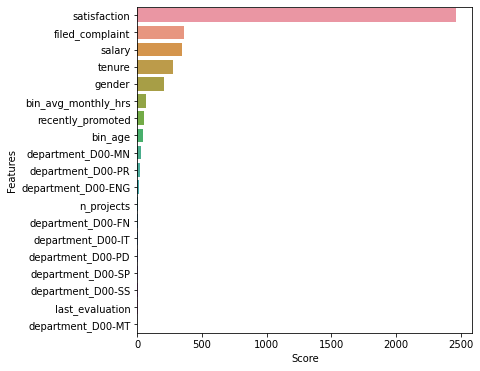

In [225]:
plot_features_kBest_classif(df_employee_info2.drop('status', axis=1), df_employee_info2['status'])

<a id=section507></a>
### **5.7 Extracting features - LDA/PCA**

In [226]:
X_data_1=df_employee_info1.drop('status', axis=1)
y_data_1=df_employee_info1['status']

In [227]:
X_data_2=df_employee_info2.drop('status', axis=1)
y_data_2=df_employee_info2['status']

<a id=section571></a>
#### **5.7.1 LDA**

In [228]:
def select_n_components(var_ratio, goal_var):
    total_variance=0
    n_comp=0

    for explained_variance in var_ratio:
        total_variance  += explained_variance

        n_comp += 1

        if total_variance>=goal_var:
            break

    return n_comp

In [229]:
def get_lda_comp(X, y):

    lda=LDA(n_components=None)

    X_lda=lda.fit(X, y)

    lda_var_ratios=lda.explained_variance_ratio_
    
    print(select_n_components(lda_var_ratios, 0.99))

In [230]:
scaler1=MinMaxScaler()
scaler2=StandardScaler()
scaler3=Normalizer()
scaler4=RobustScaler()

In [231]:
X_data1_scale1=scaler1.fit_transform(X_data_1)
X_data1_scale2=scaler2.fit_transform(X_data_1)
X_data1_scale3=scaler3.fit_transform(X_data_1)
X_data1_scale4=scaler4.fit_transform(X_data_1)

In [232]:
X_data2_scale1=scaler1.fit_transform(X_data_2)
X_data2_scale2=scaler2.fit_transform(X_data_2)
X_data2_scale3=scaler3.fit_transform(X_data_2)
X_data2_scale4=scaler4.fit_transform(X_data_2)

In [234]:
get_lda_comp(X_data1_scale1, y_data_1)

1


In [235]:
get_lda_comp(X_data1_scale2, y_data_1)

1


In [236]:
get_lda_comp(X_data1_scale3, y_data_1)

1


In [237]:
get_lda_comp(X_data1_scale4, y_data_1)

1


In [238]:
get_lda_comp(X_data2_scale1, y_data_2)

1


In [239]:
get_lda_comp(X_data2_scale2, y_data_2)

1


In [240]:
get_lda_comp(X_data2_scale3, y_data_2)

1


In [241]:
get_lda_comp(X_data2_scale4, y_data_2)

1


Seems like 1 component explains majority of the variance

<a id=section572></a>
#### **5.7.2 PCA**

In [242]:
def get_PCA(X):    
    pca = PCA(n_components=0.99)
    X_pca = pca.fit_transform(X)
    print(X_pca.shape[1])

In [243]:
get_PCA(X_data1_scale1)

17


In [244]:
get_PCA(X_data1_scale2)

18


In [245]:
get_PCA(X_data1_scale3)

5


In [246]:
get_PCA(X_data1_scale4)

16


In [247]:
get_PCA(X_data2_scale1)

17


In [248]:
get_PCA(X_data2_scale2)

18


In [249]:
get_PCA(X_data2_scale3)

15


In [250]:
get_PCA(X_data2_scale4)

16


In case of PCA, there are differetn number of components explaining variance, so can add them in experiment

<a id=section6></a>
## **6. Building Machine Learning Models**

We will analyze below dataset

- df_employee_info1
- df_employee_info2


We will use below models in pipeline

- XGBoost Classifier
- LightGBM Classifier
- CatBoost Classifier
- Random Forest Classifier


We will include feature selection, LDA,PCA as pre-processing steps in pipeline.

Also include SMOTE in pipeline to address data imbalance issue.

<a id=section601></a>
### **6.1 Baseline Models**

In [251]:
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Recall', 'MLA Precision', 'MLA F1 Score']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [252]:
def test_baseline_models(data, stratified, accmodelfilename, recmodelfilename, prcmodelfilename, f1modelfilename):
    
    row_index=0
    best_accuracy=0
    best_recall=0
    best_precision=0
    best_f1=0
    
    X=data.drop('status', axis=1)
    y=data['status']
    
    if (True==stratified):
        X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = .20, random_state = 0, stratify=y, shuffle=True)
    else:
        X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = .20, random_state = 0)
     
    #XGBoost Classifier

    pipe_xgb1=Pipeline([('xgbscaling1', MinMaxScaler()),
                        ('xgbclassifer1', XGBClassifier(random_state=0))])
    pipe_xgb2=Pipeline([('xgbscaling2', MinMaxScaler()),
                        ('xgbpreprocess2', SelectKBest(score_func=chi2, k=10)),
                        ('xgbclassifer2', XGBClassifier(random_state=0))])
    pipe_xgb3=Pipeline([('xgbscaling3', MinMaxScaler()),
                        ('xgbpreprocess3', SelectKBest(score_func=f_classif, k=5)),
                        ('xgbclassifer3', XGBClassifier(random_state=0))])
    pipe_xgb4=Pipeline([('xgbscaling4', MinMaxScaler()),
                        ('xgbpreprocess4', LDA(n_components=1)),
                        ('xgbclassifer4', XGBClassifier(random_state=0))])
    pipe_xgb5=Pipeline([('xgbscaling5', MinMaxScaler()),
                        ('xgbpreprocess5', PCA(n_components=18)),
                        ('xgbclassifer5', XGBClassifier(random_state=0))])
    pipe_xgb6=Pipeline([('xgbscaling6', MinMaxScaler()),
                        ('xgbimbalance6', RandomOverSampler(random_state=0)),
                        ('xgbclassifer6', XGBClassifier(random_state=0))])
    pipe_xgb7=Pipeline([('xgbscaling7', MinMaxScaler()),
                         ('xgbimbalance7', RandomOverSampler(random_state=0)),
                        ('xgbpreprocess7', SelectKBest(score_func=chi2, k=10)),
                        ('xgbclassifer7', XGBClassifier(random_state=0))])
    pipe_xgb8=Pipeline([('xgbscaling8', MinMaxScaler()),
                         ('xgbimbalance8', RandomOverSampler(random_state=0)),
                        ('xgbpreprocess8', SelectKBest(score_func=f_classif, k=5)),
                        ('xgbclassifer8', XGBClassifier(random_state=0))])
    pipe_xgb9=Pipeline([('xgbscaling9', MinMaxScaler()),
                         ('xgbimbalance9', RandomOverSampler(random_state=0)),
                        ('xgbpreprocess9', LDA(n_components=1)),
                        ('xgbclassifer9', XGBClassifier(random_state=0))])
    pipe_xgb10=Pipeline([('xgbscaling10', MinMaxScaler()),
                         ('xgbimbalance10', RandomOverSampler(random_state=0)),
                        ('xgbpreprocess10', PCA(n_components=18)),
                        ('xgbclassifer10', XGBClassifier(random_state=0))])
    pipe_xgb11=Pipeline([('xgbscaling11', MinMaxScaler()),
                        ('xgbimbalance11', SMOTE(random_state=0)),
                        ('xgbclassifer11', XGBClassifier(random_state=0))])
    pipe_xgb12=Pipeline([('xgbscaling12', MinMaxScaler()),
                         ('xgbimbalance12', SMOTE(random_state=0)),
                        ('xgbpreprocess12', SelectKBest(score_func=chi2, k=10)),
                        ('xgbclassifer12', XGBClassifier(random_state=0))])
    pipe_xgb13=Pipeline([('xgbscaling13', MinMaxScaler()),
                         ('xgbimbalance13', SMOTE(random_state=0)),
                        ('xgbpreprocess13', SelectKBest(score_func=f_classif, k=5)),
                        ('xgbclassifer13', XGBClassifier(random_state=0))])
    pipe_xgb14=Pipeline([('xgbscaling14', MinMaxScaler()),
                         ('xgbimbalance14', SMOTE(random_state=0)),
                        ('xgbpreprocess14', LDA(n_components=1)),
                        ('xgbclassifer14', XGBClassifier(random_state=0))])
    pipe_xgb15=Pipeline([('xgbscaling15', MinMaxScaler()),
                         ('xgbimbalance15', SMOTE(random_state=0)),
                        ('xgbpreprocess15', PCA(n_components=18)),
                        ('xgbclassifer15', XGBClassifier(random_state=0))])
 
    
    
    #LightGBM
    pipe_lgbm1=Pipeline([('lgbmscaling1', MinMaxScaler()),
                        ('lgbmclassifer1', LGBMClassifier(random_state=0))])
    pipe_lgbm2=Pipeline([('lgbmscaling2', MinMaxScaler()),
                        ('lgbmpreprocess2', SelectKBest(score_func=chi2, k=10)),
                        ('lgbmclassifer2', LGBMClassifier(random_state=0))])
    pipe_lgbm3=Pipeline([('lgbmscaling3', MinMaxScaler()),
                        ('lgbmpreprocess3', SelectKBest(score_func=f_classif, k=5)),
                        ('lgbmclassifer3', LGBMClassifier(random_state=0))])
    pipe_lgbm4=Pipeline([('lgbmscaling4', MinMaxScaler()),
                        ('lgbmpreprocess4', LDA(n_components=1)),
                        ('lgbmclassifer4', LGBMClassifier(random_state=0))])
    pipe_lgbm5=Pipeline([('lgbmscaling5', MinMaxScaler()),
                        ('lgbmpreprocess5', PCA(n_components=18)),
                        ('lgbmclassifer5', LGBMClassifier(random_state=0))])
    pipe_lgbm6=Pipeline([('lgbmscaling6', MinMaxScaler()),
                        ('lgbmimbalance6', RandomOverSampler(random_state=0)),
                        ('lgbmclassifer6', LGBMClassifier(random_state=0))])
    pipe_lgbm7=Pipeline([('lgbmscaling7', MinMaxScaler()),
                         ('lgbmimbalance7', RandomOverSampler(random_state=0)),
                        ('lgbmpreprocess7', SelectKBest(score_func=chi2, k=10)),
                        ('lgbmclassifer7', LGBMClassifier(random_state=0))])
    pipe_lgbm8=Pipeline([('lgbmscaling8', MinMaxScaler()),
                         ('lgbmimbalance8', RandomOverSampler(random_state=0)),
                        ('lgbmpreprocess8', SelectKBest(score_func=f_classif, k=5)),
                        ('lgbmclassifer8', LGBMClassifier(random_state=0))])
    pipe_lgbm9=Pipeline([('lgbmscaling9', MinMaxScaler()),
                         ('lgbmimbalance9', RandomOverSampler(random_state=0)),
                        ('lgbmpreprocess9', LDA(n_components=1)),
                        ('lgbmclassifer9', LGBMClassifier(random_state=0))])
    pipe_lgbm10=Pipeline([('lgbmscaling10', MinMaxScaler()),
                         ('lgbmimbalance10', RandomOverSampler(random_state=0)),
                        ('lgbmpreprocess10', PCA(n_components=18)),
                        ('lgbmclassifer10', LGBMClassifier(random_state=0))])
    pipe_lgbm11=Pipeline([('lgbmscaling11', MinMaxScaler()),
                        ('lgbmimbalance11', SMOTE(random_state=0)),
                        ('lgbmclassifer11', LGBMClassifier(random_state=0))])
    pipe_lgbm12=Pipeline([('lgbmscaling12', MinMaxScaler()),
                         ('lgbmimbalance12', SMOTE(random_state=0)),
                        ('lgbmpreprocess12', SelectKBest(score_func=chi2, k=10)),
                        ('lgbmclassifer12', LGBMClassifier(random_state=0))])
    pipe_lgbm13=Pipeline([('lgbmscaling13', MinMaxScaler()),
                         ('lgbmimbalance13', SMOTE(random_state=0)),
                        ('lgbmpreprocess13', SelectKBest(score_func=f_classif, k=5)),
                        ('lgbmclassifer13', LGBMClassifier(random_state=0))])
    pipe_lgbm14=Pipeline([('lgbmscaling14', MinMaxScaler()),
                         ('lgbmimbalance14', SMOTE(random_state=0)),
                        ('lgbmpreprocess14', LDA(n_components=1)),
                        ('lgbmclassifer14', LGBMClassifier(random_state=0))])
    pipe_lgbm15=Pipeline([('lgbmscaling15', MinMaxScaler()),
                         ('lgbmimbalance15', SMOTE(random_state=0)),
                        ('lgbmpreprocess15', PCA(n_components=18)),
                        ('lgbmclassifer15', LGBMClassifier(random_state=0))])
    
    #Random Forest Classifier
    pipe_rf1=Pipeline([('rfscaling1', MinMaxScaler()),
                        ('rfclassifer1', RandomForestClassifier(random_state=0, criterion='gini'))])
    pipe_rf2=Pipeline([('rfscaling2', MinMaxScaler()),
                        ('rfpreprocess2', SelectKBest(score_func=chi2, k=10)),
                        ('rfclassifer2', RandomForestClassifier(random_state=0, criterion='gini'))])
    pipe_rf3=Pipeline([('rfscaling3', MinMaxScaler()),
                        ('rfpreprocess3', SelectKBest(score_func=f_classif, k=5)),
                        ('rfclassifer3', RandomForestClassifier(random_state=0, criterion='gini'))])
    pipe_rf4=Pipeline([('rfscaling4', MinMaxScaler()),
                        ('rfpreprocess4', LDA(n_components=1)),
                        ('rfclassifer4', RandomForestClassifier(random_state=0, criterion='gini'))])
    pipe_rf5=Pipeline([('rfscaling5', MinMaxScaler()),
                        ('rfpreprocess5', PCA(n_components=18)),
                        ('rfclassifer5', RandomForestClassifier(random_state=0, criterion='gini'))])
    pipe_rf6=Pipeline([('rfscaling6', MinMaxScaler()),
                        ('rfimbalance6', RandomOverSampler(random_state=0)),
                        ('rfclassifer6', RandomForestClassifier(random_state=0, criterion='gini'))])
    pipe_rf7=Pipeline([('rfscaling7', MinMaxScaler()),
                         ('rfimbalance7', RandomOverSampler(random_state=0)),
                        ('rfpreprocess7', SelectKBest(score_func=chi2, k=10)),
                        ('rfclassifer7', RandomForestClassifier(random_state=0, criterion='gini'))])
    pipe_rf8=Pipeline([('rfscaling8', MinMaxScaler()),
                         ('rfimbalance8', RandomOverSampler(random_state=0)),
                        ('rfpreprocess8', SelectKBest(score_func=f_classif, k=5)),
                        ('rfclassifer8', RandomForestClassifier(random_state=0, criterion='gini'))])
    pipe_rf9=Pipeline([('rfscaling9', MinMaxScaler()),
                         ('rfimbalance9', RandomOverSampler(random_state=0)),
                        ('rfpreprocess9', LDA(n_components=1)),
                        ('rfclassifer9', RandomForestClassifier(random_state=0, criterion='gini'))])
    pipe_rf10=Pipeline([('rfscaling10', MinMaxScaler()),
                         ('rfimbalance10', RandomOverSampler(random_state=0)),
                        ('rfpreprocess10', PCA(n_components=18)),
                        ('rfclassifer10', RandomForestClassifier(random_state=0, criterion='gini'))])
    pipe_rf11=Pipeline([('rfscaling11', MinMaxScaler()),
                        ('rfimbalance11', SMOTE(random_state=0)),
                        ('rfclassifer11', RandomForestClassifier(random_state=0, criterion='gini'))])
    pipe_rf12=Pipeline([('rfscaling12', MinMaxScaler()),
                         ('rfimbalance12', SMOTE(random_state=0)),
                        ('rfpreprocess12', SelectKBest(score_func=chi2, k=10)),
                        ('rfclassifer12', RandomForestClassifier(random_state=0, criterion='gini'))])
    pipe_rf13=Pipeline([('rfscaling13', MinMaxScaler()),
                         ('rfimbalance13', SMOTE(random_state=0)),
                        ('rfpreprocess13', SelectKBest(score_func=f_classif, k=5)),
                        ('rfclassifer13', RandomForestClassifier(random_state=0, criterion='gini'))])
    pipe_rf14=Pipeline([('rfscaling14', MinMaxScaler()),
                         ('rfimbalance14', SMOTE(random_state=0)),
                        ('rfpreprocess14', LDA(n_components=1)),
                        ('rfclassifer14', RandomForestClassifier(random_state=0, criterion='gini'))])
    pipe_rf15=Pipeline([('rfscaling15', MinMaxScaler()),
                         ('rfimbalance15', SMOTE(random_state=0)),
                        ('rfpreprocess15', PCA(n_components=18)),
                        ('rfclassifer15', RandomForestClassifier(random_state=0, criterion='gini'))])
    
    
    #CatBoost Classifier
    pipe_catb1=Pipeline([('catbscaling1', MinMaxScaler()),
                        ('catbclassifer1', CatBoostClassifier(iterations=50, learning_rate=0.1, random_state=0, verbose=0))])
    pipe_catb2=Pipeline([('catbscaling2', MinMaxScaler()),
                        ('catbpreprocess2', SelectKBest(score_func=chi2, k=10)),
                        ('catbclassifer2', CatBoostClassifier(iterations=50, learning_rate=0.1, random_state=0, verbose=0))])
    pipe_catb3=Pipeline([('catbscaling3', MinMaxScaler()),
                        ('catbpreprocess3', SelectKBest(score_func=f_classif, k=5)),
                        ('catbclassifer3', CatBoostClassifier(iterations=50, learning_rate=0.1, random_state=0, verbose=0))])
    pipe_catb4=Pipeline([('catbscaling4', MinMaxScaler()),
                        ('catbpreprocess4', LDA(n_components=1)),
                        ('catbclassifer4', CatBoostClassifier(iterations=50, learning_rate=0.1, random_state=0, verbose=0))])
    pipe_catb5=Pipeline([('catbscaling5', MinMaxScaler()),
                        ('catbpreprocess5', PCA(n_components=18)),
                        ('catbclassifer5', CatBoostClassifier(iterations=50, learning_rate=0.1, random_state=0, verbose=0))])
    pipe_catb6=Pipeline([('catbscaling6', MinMaxScaler()),
                        ('catbimbalance6', RandomOverSampler(random_state=0)),
                        ('catbclassifer6', CatBoostClassifier(iterations=50, learning_rate=0.1, random_state=0, verbose=0))])
    pipe_catb7=Pipeline([('catbscaling7', MinMaxScaler()),
                         ('catbimbalance7', RandomOverSampler(random_state=0)),
                        ('catbpreprocess7', SelectKBest(score_func=chi2, k=10)),
                        ('catbclassifer7', CatBoostClassifier(iterations=50, learning_rate=0.1, random_state=0, verbose=0))])
    pipe_catb8=Pipeline([('catbscaling8', MinMaxScaler()),
                         ('catbimbalance8', RandomOverSampler(random_state=0)),
                        ('catbpreprocess8', SelectKBest(score_func=f_classif, k=5)),
                        ('catbclassifer8', CatBoostClassifier(iterations=50, learning_rate=0.1, random_state=0, verbose=0))])
    pipe_catb9=Pipeline([('catbscaling9', MinMaxScaler()),
                         ('catbimbalance9', RandomOverSampler(random_state=0)),
                        ('catbpreprocess9', LDA(n_components=1)),
                        ('catbclassifer9', CatBoostClassifier(iterations=50, learning_rate=0.1, random_state=0, verbose=0))])
    pipe_catb10=Pipeline([('catbscaling10', MinMaxScaler()),
                         ('catbimbalance10', RandomOverSampler(random_state=0)),
                        ('catbpreprocess10', PCA(n_components=18)),
                        ('catbclassifer10', CatBoostClassifier(iterations=50, learning_rate=0.1, random_state=0, verbose=0))])
    pipe_catb11=Pipeline([('catbscaling11', MinMaxScaler()),
                        ('catbimbalance11', SMOTE(random_state=0)),
                        ('catbclassifer11', CatBoostClassifier(iterations=50, learning_rate=0.1, random_state=0, verbose=0))])
    pipe_catb12=Pipeline([('catbscaling12', MinMaxScaler()),
                         ('catbimbalance12', SMOTE(random_state=0)),
                        ('catbpreprocess12', SelectKBest(score_func=chi2, k=10)),
                        ('catbclassifer12', CatBoostClassifier(iterations=50, learning_rate=0.1, random_state=0, verbose=0))])
    pipe_catb13=Pipeline([('catbscaling13', MinMaxScaler()),
                         ('catbimbalance13', SMOTE(random_state=0)),
                        ('catbpreprocess13', SelectKBest(score_func=f_classif, k=5)),
                        ('catbclassifer13', CatBoostClassifier(iterations=50, learning_rate=0.1, random_state=0, verbose=0))])
    pipe_catb14=Pipeline([('catbscaling14', MinMaxScaler()),
                         ('catbimbalance14', SMOTE(random_state=0)),
                        ('catbpreprocess14', LDA(n_components=1)),
                        ('catbclassifer14', CatBoostClassifier(iterations=50, learning_rate=0.1, random_state=0, verbose=0))])
    pipe_catb15=Pipeline([('catbscaling15', MinMaxScaler()),
                         ('catbimbalance15', SMOTE(random_state=0)),
                        ('catbpreprocess15', PCA(n_components=18)),
                        ('catbclassifer15', CatBoostClassifier(iterations=50, learning_rate=0.1, random_state=0, verbose=0))])
    
    pipelines=[pipe_xgb1,pipe_xgb2,pipe_xgb3,pipe_xgb4,pipe_xgb5,pipe_xgb6,pipe_xgb7,pipe_xgb8,pipe_xgb9,pipe_xgb10,pipe_xgb11,pipe_xgb12,pipe_xgb13,pipe_xgb14,pipe_xgb15,
              pipe_lgbm1,pipe_lgbm2,pipe_lgbm3,pipe_lgbm4,pipe_lgbm5,pipe_lgbm6,pipe_lgbm7,pipe_lgbm8,pipe_lgbm9,pipe_lgbm10,pipe_lgbm11,pipe_lgbm12,pipe_lgbm13,pipe_lgbm14,pipe_lgbm15,
              pipe_rf1,pipe_rf2,pipe_rf3,pipe_rf4,pipe_rf5,pipe_rf6,pipe_rf7,pipe_rf8,pipe_rf9,pipe_rf10,pipe_rf11,pipe_rf12,pipe_rf13,pipe_rf14,pipe_rf15,
              pipe_catb1,pipe_catb2,pipe_catb3,pipe_catb4,pipe_catb5,pipe_catb6,pipe_catb7,pipe_catb8,pipe_catb9,pipe_catb10,pipe_catb11,pipe_catb12,pipe_catb13,pipe_catb14,pipe_catb15]
    
    for pipe in pipelines:
        pipe.fit(X_tr, y_tr)
        
    for i,model in enumerate(pipelines):
        if (i>=0 and i<=14):
            MLA_compare.loc[row_index, 'MLA Name']='XGBoost'
        elif (i>=15 and i<=29):
            MLA_compare.loc[row_index, 'MLA Name']='LightGBM'
        elif (i>=30 and i<=44):
            MLA_compare.loc[row_index, 'MLA Name']='RandomForest'
        elif (i>=45 and i<=59):
            MLA_compare.loc[row_index, 'MLA Name']='CatBoost'
            
            
        MLA_compare.loc[row_index, 'MLA Parameters']=str(model.get_params())
        MLA_compare.loc[row_index, 'MLA Train Accuracy Mean']=model.score(X_tr,y_tr)
        MLA_compare.loc[row_index, 'MLA Test Accuracy Mean']=model.score(X_ts,y_ts)
        y_pred = model.predict(X_ts)
        MLA_compare.loc[row_index, 'MLA Recall']=metrics.recall_score(y_ts, y_pred, average='weighted')
        MLA_compare.loc[row_index, 'MLA Precision']=metrics.precision_score(y_ts, y_pred,average='weighted')
        MLA_compare.loc[row_index, 'MLA F1 Score']=metrics.f1_score(y_ts, y_pred, average='weighted')
        
        row_index=row_index+1
        
        if (model.score(X_ts,y_ts)>best_accuracy):
            best_accuracy=model.score(X_ts,y_ts,)
            best_accpipeline=model
            
        if (metrics.recall_score(y_ts, y_pred, average='weighted')>best_recall):
            best_recall=metrics.recall_score(y_ts, y_pred, average='weighted')
            bestrecpipeline=model
            
        if (metrics.precision_score(y_ts, y_pred, average='weighted')>best_precision):
            best_precision=metrics.precision_score(y_ts, y_pred, average='weighted')
            bestprcpipeline=model
            
        if (metrics.f1_score(y_ts, y_pred, average='weighted')>best_f1):
            best_f1=metrics.f1_score(y_ts, y_pred, average='weighted')
            bestf1pipeline=model
            
        MLA_compare['Difference']= (MLA_compare['MLA Test Accuracy Mean']-MLA_compare['MLA Train Accuracy Mean'])*100
        
        
    with open(accmodelfilename, 'wb') as file:
        pickle.dump(best_accpipeline, file)
        
    with open(recmodelfilename, 'wb') as file:
        pickle.dump(bestrecpipeline, file)
        
    with open(prcmodelfilename, 'wb') as file:
        pickle.dump(bestprcpipeline, file)
        
    with open(f1modelfilename, 'wb') as file:
        pickle.dump(bestf1pipeline, file)
    

    return MLA_compare


In [253]:
def plot_test_accuracy(df):
    tmp_df=df.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False)
    tmp_df.reset_index(drop=True, inplace=True)
    plt.figure(figsize=(10,10))
    sns.barplot(x='MLA Name', y='MLA Test Accuracy Mean', data=tmp_df.head(10))
    plt.title("Mean Test Accuracy of Models", fontdict={'fontweight':'bold'})
    plt.show()

In [254]:
def plot_train_accuracy(df):
    tmp_df=df.sort_values(by = ['MLA Train Accuracy Mean'], ascending = False)
    tmp_df.reset_index(drop=True, inplace=True)
    plt.figure(figsize=(10,10))
    sns.barplot(x='MLA Name', y='MLA Train Accuracy Mean', data=tmp_df.head(10))
    plt.title("Mean Train Accuracy of Models", fontdict={'fontweight':'bold'})
    plt.show()

In [255]:
def plot_recall(df):
    tmp_df=df.sort_values(by = ['MLA Recall'], ascending = False)
    tmp_df.reset_index(drop=True, inplace=True)
    plt.figure(figsize=(10,10))
    sns.barplot(x='MLA Name', y='MLA Recall', data=tmp_df.head(10))
    plt.title("Weighted Recall of Models", fontdict={'fontweight':'bold'})
    plt.show()

In [256]:
def plot_precision(df):
    tmp_df=df.sort_values(by = ['MLA Precision'], ascending = False)
    tmp_df.reset_index(drop=True, inplace=True)
    plt.figure(figsize=(10,10))
    sns.barplot(x='MLA Name', y='MLA Precision', data=tmp_df.head(10))
    plt.title("Weighted Precision of Models", fontdict={'fontweight':'bold'})
    plt.show()

In [257]:
def plot_f1score(df):
    tmp_df=df.sort_values(by = ['MLA F1 Score'], ascending = False)
    tmp_df.reset_index(drop=True, inplace=True)
    plt.figure(figsize=(10,10))
    sns.barplot(x='MLA Name', y='MLA F1 Score', data=tmp_df.head(10))
    plt.title("Weighted F1 Score of Models", fontdict={'fontweight':'bold'})
    plt.show()

<a id=section611></a>
#### **6.1.1 Dataset1 with Stratified=False**

In [258]:
df10=test_baseline_models(df_employee_info1, 0, 'dataset1_accfile0', 'dataset1_recfile0', 'dataset1_prcfile0', 'dataset1_f1file0').copy()

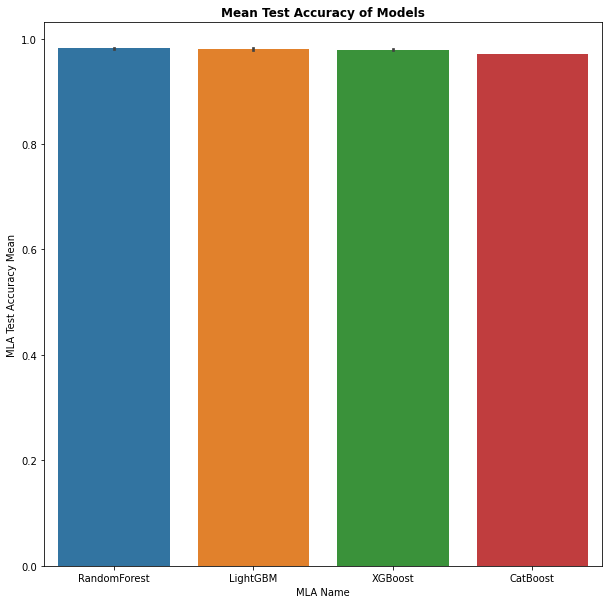

In [259]:
plot_test_accuracy(df10)

In [260]:
df10.sort_values(by='MLA Test Accuracy Mean', ascending=False).head()

MLA Name                                     MLA Parameters  \
40  RandomForest  {'memory': None, 'steps': [('rfscaling11', Min...   
30  RandomForest  {'memory': None, 'steps': [('rfscaling1', MinM...   
15      LightGBM  {'memory': None, 'steps': [('lgbmscaling1', Mi...   
35  RandomForest  {'memory': None, 'steps': [('rfscaling6', MinM...   
20      LightGBM  {'memory': None, 'steps': [('lgbmscaling6', Mi...   

   MLA Train Accuracy Mean MLA Test Accuracy Mean MLA Recall MLA Precision  \
40                       1               0.982021   0.982021      0.981951   
30                       1               0.981661   0.981661      0.981627   
15                0.991909               0.981661   0.981661      0.981591   
35                       1               0.980942   0.980942      0.980874   
20                0.993976               0.980583   0.980583      0.980545   

   MLA F1 Score Difference  
40      0.98194   -1.79791  
30      0.98153   -1.83387  
15     0.981605   -1.02474  
35     0.980828   -1.90579  
20     0.980561   -1.33939

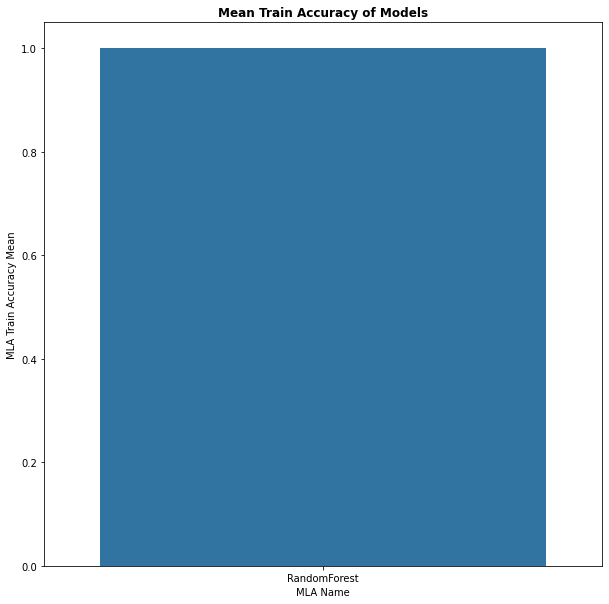

In [261]:
plot_train_accuracy(df10)

In [262]:
df10.sort_values(by='MLA Train Accuracy Mean', ascending=False).head()

MLA Name                                     MLA Parameters  \
30  RandomForest  {'memory': None, 'steps': [('rfscaling1', MinM...   
40  RandomForest  {'memory': None, 'steps': [('rfscaling11', Min...   
34  RandomForest  {'memory': None, 'steps': [('rfscaling5', MinM...   
35  RandomForest  {'memory': None, 'steps': [('rfscaling6', MinM...   
39  RandomForest  {'memory': None, 'steps': [('rfscaling10', Min...   

   MLA Train Accuracy Mean MLA Test Accuracy Mean MLA Recall MLA Precision  \
30                       1               0.981661   0.981661      0.981627   
40                       1               0.982021   0.982021      0.981951   
34                       1               0.969076   0.969076      0.968934   
35                       1               0.980942   0.980942      0.980874   
39                       1               0.966559   0.966559      0.966307   

   MLA F1 Score Difference  
30      0.98153   -1.83387  
40      0.98194   -1.79791  
34     0.968716   -3.09241  
35     0.980828   -1.90579  
39      0.96634   -3.34412

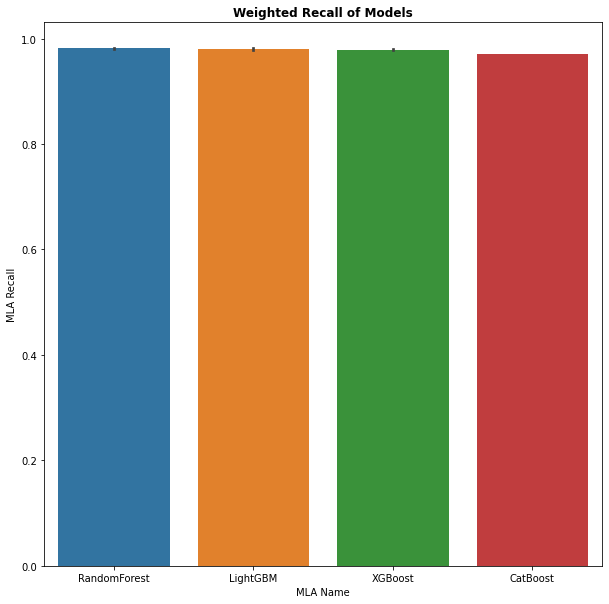

In [263]:
plot_recall(df10)

In [264]:
df10.sort_values(by='MLA Recall', ascending=False).head()

MLA Name                                     MLA Parameters  \
40  RandomForest  {'memory': None, 'steps': [('rfscaling11', Min...   
30  RandomForest  {'memory': None, 'steps': [('rfscaling1', MinM...   
15      LightGBM  {'memory': None, 'steps': [('lgbmscaling1', Mi...   
35  RandomForest  {'memory': None, 'steps': [('rfscaling6', MinM...   
20      LightGBM  {'memory': None, 'steps': [('lgbmscaling6', Mi...   

   MLA Train Accuracy Mean MLA Test Accuracy Mean MLA Recall MLA Precision  \
40                       1               0.982021   0.982021      0.981951   
30                       1               0.981661   0.981661      0.981627   
15                0.991909               0.981661   0.981661      0.981591   
35                       1               0.980942   0.980942      0.980874   
20                0.993976               0.980583   0.980583      0.980545   

   MLA F1 Score Difference  
40      0.98194   -1.79791  
30      0.98153   -1.83387  
15     0.981605   -1.02474  
35     0.980828   -1.90579  
20     0.980561   -1.33939

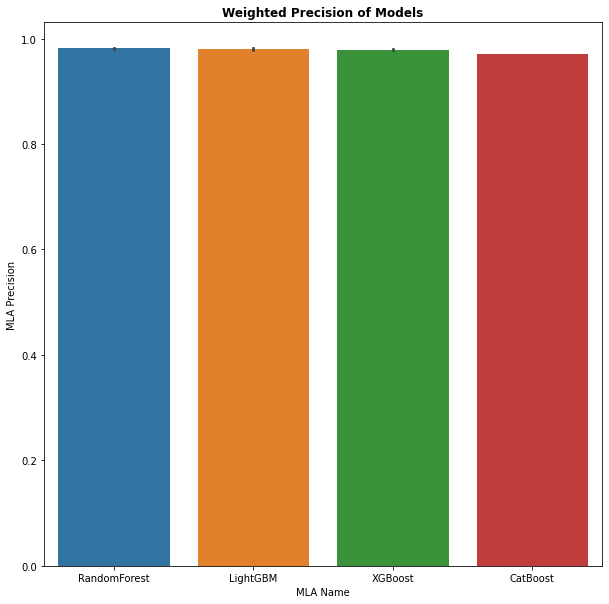

In [265]:
plot_precision(df10)

In [266]:
df10.sort_values(by='MLA Precision', ascending=False).head()

MLA Name                                     MLA Parameters  \
40  RandomForest  {'memory': None, 'steps': [('rfscaling11', Min...   
30  RandomForest  {'memory': None, 'steps': [('rfscaling1', MinM...   
15      LightGBM  {'memory': None, 'steps': [('lgbmscaling1', Mi...   
35  RandomForest  {'memory': None, 'steps': [('rfscaling6', MinM...   
20      LightGBM  {'memory': None, 'steps': [('lgbmscaling6', Mi...   

   MLA Train Accuracy Mean MLA Test Accuracy Mean MLA Recall MLA Precision  \
40                       1               0.982021   0.982021      0.981951   
30                       1               0.981661   0.981661      0.981627   
15                0.991909               0.981661   0.981661      0.981591   
35                       1               0.980942   0.980942      0.980874   
20                0.993976               0.980583   0.980583      0.980545   

   MLA F1 Score Difference  
40      0.98194   -1.79791  
30      0.98153   -1.83387  
15     0.981605   -1.02474  
35     0.980828   -1.90579  
20     0.980561   -1.33939

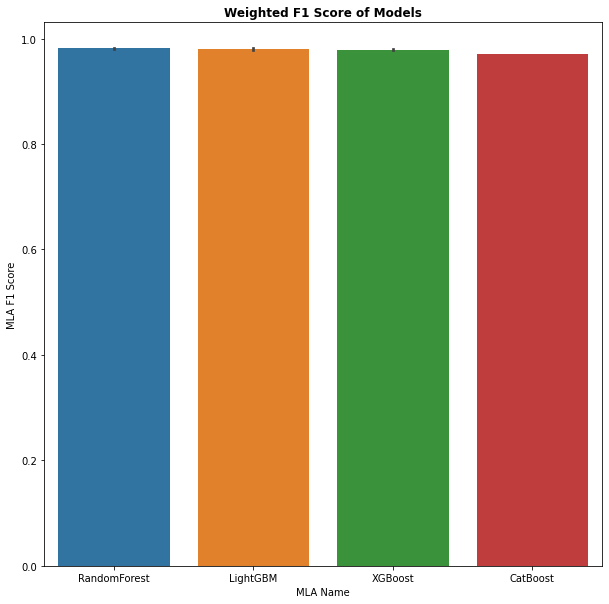

In [267]:
plot_f1score(df10)

In [268]:
df10.sort_values(by='MLA F1 Score', ascending=False).head()

MLA Name                                     MLA Parameters  \
40  RandomForest  {'memory': None, 'steps': [('rfscaling11', Min...   
15      LightGBM  {'memory': None, 'steps': [('lgbmscaling1', Mi...   
30  RandomForest  {'memory': None, 'steps': [('rfscaling1', MinM...   
35  RandomForest  {'memory': None, 'steps': [('rfscaling6', MinM...   
20      LightGBM  {'memory': None, 'steps': [('lgbmscaling6', Mi...   

   MLA Train Accuracy Mean MLA Test Accuracy Mean MLA Recall MLA Precision  \
40                       1               0.982021   0.982021      0.981951   
15                0.991909               0.981661   0.981661      0.981591   
30                       1               0.981661   0.981661      0.981627   
35                       1               0.980942   0.980942      0.980874   
20                0.993976               0.980583   0.980583      0.980545   

   MLA F1 Score Difference  
40      0.98194   -1.79791  
15     0.981605   -1.02474  
30      0.98153   -1.83387  
35     0.980828   -1.90579  
20     0.980561   -1.33939

<a id=section612></a>
#### **6.1.2 Dataset2 with Stratified=False**

In [270]:
df20=test_baseline_models(df_employee_info2, 0, 'dataset2_accfile0', 'dataset2_recfile0', 'dataset2_prcfile0', 'dataset2_f1file0').copy()

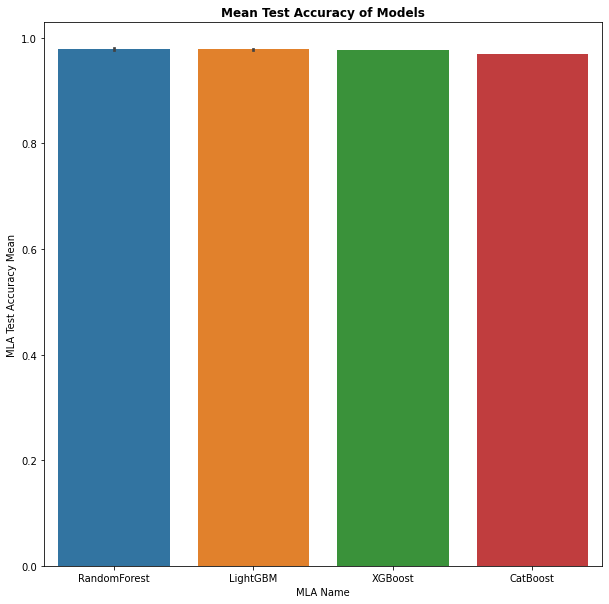

In [271]:
plot_test_accuracy(df20)

In [272]:
df20.sort_values(by='MLA Test Accuracy Mean', ascending=False).head()

MLA Name                                     MLA Parameters  \
35  RandomForest  {'memory': None, 'steps': [('rfscaling6', MinM...   
40  RandomForest  {'memory': None, 'steps': [('rfscaling11', Min...   
15      LightGBM  {'memory': None, 'steps': [('lgbmscaling1', Mi...   
25      LightGBM  {'memory': None, 'steps': [('lgbmscaling11', M...   
5        XGBoost  {'memory': None, 'steps': [('xgbscaling6', Min...   

   MLA Train Accuracy Mean MLA Test Accuracy Mean MLA Recall MLA Precision  \
35                       1               0.980583   0.980583        0.9805   
40                       1               0.979144   0.979144      0.979052   
15                0.989032               0.979144   0.979144      0.979052   
25                0.986155               0.978425   0.978425      0.978331   
5                 0.995775               0.977346   0.977346      0.977261   

   MLA F1 Score Difference  
35     0.980506   -1.94175  
40     0.979026   -2.08558  
15     0.979026  -0.988754  
25     0.978352  -0.772979  
5      0.977289   -1.84282

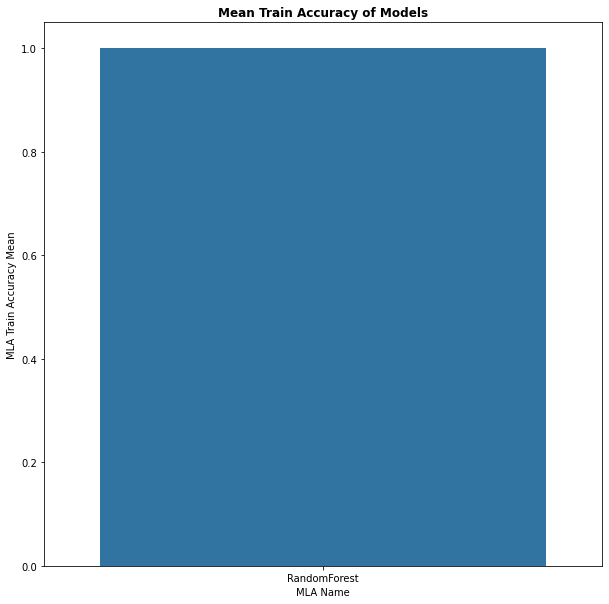

In [273]:
plot_train_accuracy(df20)

In [274]:
df20.sort_values(by='MLA Train Accuracy Mean', ascending=False).head()

MLA Name                                     MLA Parameters  \
30  RandomForest  {'memory': None, 'steps': [('rfscaling1', MinM...   
40  RandomForest  {'memory': None, 'steps': [('rfscaling11', Min...   
44  RandomForest  {'memory': None, 'steps': [('rfscaling15', Min...   
34  RandomForest  {'memory': None, 'steps': [('rfscaling5', MinM...   
35  RandomForest  {'memory': None, 'steps': [('rfscaling6', MinM...   

   MLA Train Accuracy Mean MLA Test Accuracy Mean MLA Recall MLA Precision  \
30                       1               0.976987   0.976987      0.976901   
40                       1               0.979144   0.979144      0.979052   
44                       1               0.969076   0.969076      0.968937   
34                       1               0.968716   0.968716      0.968727   
35                       1               0.980583   0.980583        0.9805   

   MLA F1 Score Difference  
30     0.976802   -2.30133  
40     0.979026   -2.08558  
44     0.968989   -3.09241  
34     0.968246   -3.12837  
35     0.980506   -1.94175

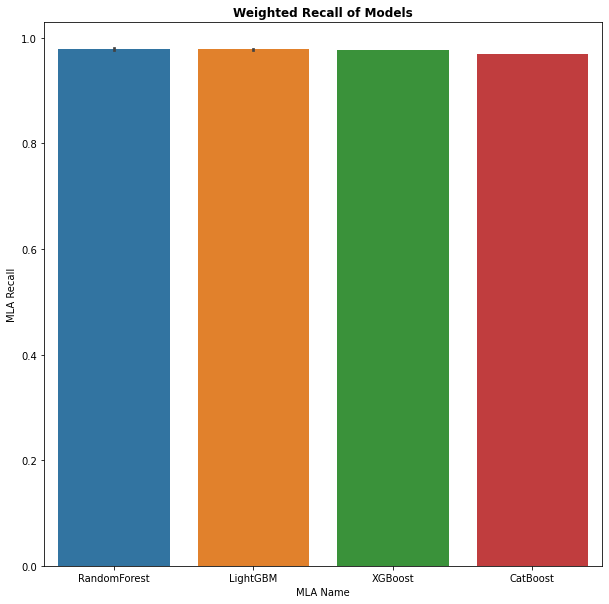

In [275]:
plot_recall(df20)

In [276]:
df20.sort_values(by='MLA Recall', ascending=False).head()

MLA Name                                     MLA Parameters  \
35  RandomForest  {'memory': None, 'steps': [('rfscaling6', MinM...   
40  RandomForest  {'memory': None, 'steps': [('rfscaling11', Min...   
15      LightGBM  {'memory': None, 'steps': [('lgbmscaling1', Mi...   
25      LightGBM  {'memory': None, 'steps': [('lgbmscaling11', M...   
5        XGBoost  {'memory': None, 'steps': [('xgbscaling6', Min...   

   MLA Train Accuracy Mean MLA Test Accuracy Mean MLA Recall MLA Precision  \
35                       1               0.980583   0.980583        0.9805   
40                       1               0.979144   0.979144      0.979052   
15                0.989032               0.979144   0.979144      0.979052   
25                0.986155               0.978425   0.978425      0.978331   
5                 0.995775               0.977346   0.977346      0.977261   

   MLA F1 Score Difference  
35     0.980506   -1.94175  
40     0.979026   -2.08558  
15     0.979026  -0.988754  
25     0.978352  -0.772979  
5      0.977289   -1.84282

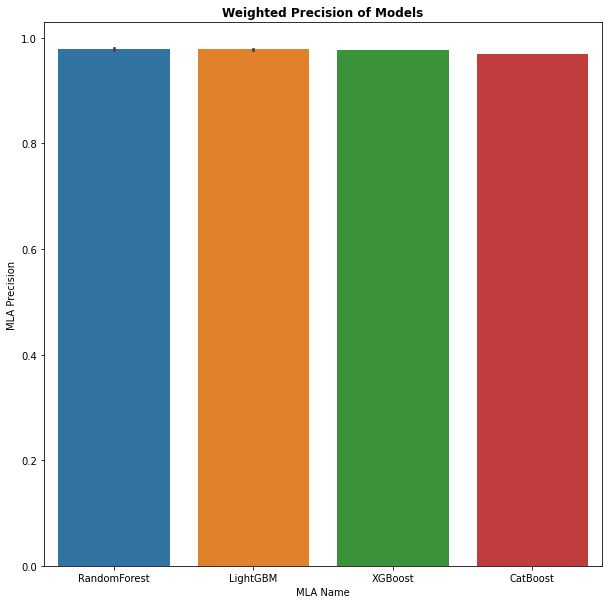

In [277]:
plot_precision(df20)

In [278]:
df20.sort_values(by='MLA Precision', ascending=False).head()

MLA Name                                     MLA Parameters  \
35  RandomForest  {'memory': None, 'steps': [('rfscaling6', MinM...   
40  RandomForest  {'memory': None, 'steps': [('rfscaling11', Min...   
15      LightGBM  {'memory': None, 'steps': [('lgbmscaling1', Mi...   
25      LightGBM  {'memory': None, 'steps': [('lgbmscaling11', M...   
5        XGBoost  {'memory': None, 'steps': [('xgbscaling6', Min...   

   MLA Train Accuracy Mean MLA Test Accuracy Mean MLA Recall MLA Precision  \
35                       1               0.980583   0.980583        0.9805   
40                       1               0.979144   0.979144      0.979052   
15                0.989032               0.979144   0.979144      0.979052   
25                0.986155               0.978425   0.978425      0.978331   
5                 0.995775               0.977346   0.977346      0.977261   

   MLA F1 Score Difference  
35     0.980506   -1.94175  
40     0.979026   -2.08558  
15     0.979026  -0.988754  
25     0.978352  -0.772979  
5      0.977289   -1.84282

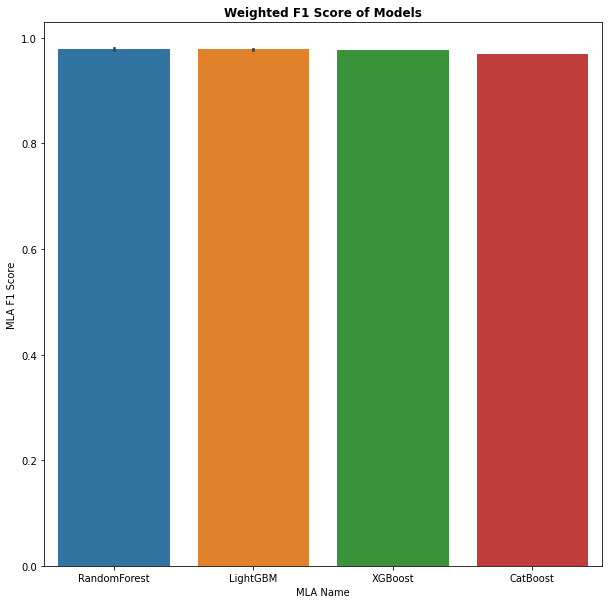

In [279]:
plot_f1score(df20)

In [280]:
df20.sort_values(by='MLA F1 Score', ascending=False).head()

MLA Name                                     MLA Parameters  \
35  RandomForest  {'memory': None, 'steps': [('rfscaling6', MinM...   
40  RandomForest  {'memory': None, 'steps': [('rfscaling11', Min...   
15      LightGBM  {'memory': None, 'steps': [('lgbmscaling1', Mi...   
25      LightGBM  {'memory': None, 'steps': [('lgbmscaling11', M...   
5        XGBoost  {'memory': None, 'steps': [('xgbscaling6', Min...   

   MLA Train Accuracy Mean MLA Test Accuracy Mean MLA Recall MLA Precision  \
35                       1               0.980583   0.980583        0.9805   
40                       1               0.979144   0.979144      0.979052   
15                0.989032               0.979144   0.979144      0.979052   
25                0.986155               0.978425   0.978425      0.978331   
5                 0.995775               0.977346   0.977346      0.977261   

   MLA F1 Score Difference  
35     0.980506   -1.94175  
40     0.979026   -2.08558  
15     0.979026  -0.988754  
25     0.978352  -0.772979  
5      0.977289   -1.84282

**Analyzing various models created**

In [287]:
with open('dataset1_accfile0', 'rb') as file:
    model=pickle.load(file)

model

Pipeline(memory=None,
         steps=[('rfscaling11', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('rfimbalance11',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=0,
                       sampling_strategy='auto')),
                ('rfclassifer11',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=Fals

In [288]:
with open('dataset1_recfile0', 'rb') as file:
    model=pickle.load(file)

model

Pipeline(memory=None,
         steps=[('rfscaling11', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('rfimbalance11',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=0,
                       sampling_strategy='auto')),
                ('rfclassifer11',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=Fals

In [289]:
with open('dataset1_prcfile0', 'rb') as file:
    model=pickle.load(file)

model

Pipeline(memory=None,
         steps=[('rfscaling11', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('rfimbalance11',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=0,
                       sampling_strategy='auto')),
                ('rfclassifer11',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=Fals

In [290]:
with open('dataset1_f1file0', 'rb') as file:
    model=pickle.load(file)

model

Pipeline(memory=None,
         steps=[('rfscaling11', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('rfimbalance11',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=0,
                       sampling_strategy='auto')),
                ('rfclassifer11',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=Fals

In [291]:
with open('dataset2_accfile0', 'rb') as file:
    model=pickle.load(file)

model

Pipeline(memory=None,
         steps=[('rfscaling6', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('rfimbalance6',
                 RandomOverSampler(random_state=0, sampling_strategy='auto')),
                ('rfclassifer6',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                       

In [292]:
with open('dataset2_recfile0', 'rb') as file:
    model=pickle.load(file)

model

Pipeline(memory=None,
         steps=[('rfscaling6', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('rfimbalance6',
                 RandomOverSampler(random_state=0, sampling_strategy='auto')),
                ('rfclassifer6',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                       

In [293]:
with open('dataset2_prcfile0', 'rb') as file:
    model=pickle.load(file)

model

Pipeline(memory=None,
         steps=[('rfscaling6', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('rfimbalance6',
                 RandomOverSampler(random_state=0, sampling_strategy='auto')),
                ('rfclassifer6',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                       

In [294]:
with open('dataset2_f1file0', 'rb') as file:
    model=pickle.load(file)

model

Pipeline(memory=None,
         steps=[('rfscaling6', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('rfimbalance6',
                 RandomOverSampler(random_state=0, sampling_strategy='auto')),
                ('rfclassifer6',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                       

XGBoost and Random Forest classifers performed better than LightGBM and Catboost, BUt LightGBM also performed good

So, can apply hyper parameter tuning on the models - XGBoost, RandomForest and LightGBM if it further enahnces the performance

<a id=section602></a>
### **6.2 Hyper Parameter tuning of models**

<a id=section621></a>
#### **6.2.1 Random Forest**

In [295]:
#Function to train Random Forest using hyper parameter tuning
def process_rf(data,stratified, filename):
    """
    data - input data
    stratified flag - wether to set the stratified flag to TRUE or FALSE (always FALSE in this case)
    """
    X=data.drop('status', axis=1)
    y=data['status']
    
    if (True==stratified):
        X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = .20, random_state = 0, stratify=y, shuffle=True)
    else:
        X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = .20, random_state = 0)
        
    
    pipe_1=Pipeline([('scaling', MinMaxScaler()),
                        ('classifier', RandomForestClassifier(random_state=0))])
    pipe_2=Pipeline([('scaling', MinMaxScaler()),
                        ('preprocess', SelectKBest(score_func=chi2, k=10)),
                        ('classifier', RandomForestClassifier(random_state=0))])
    pipe_3=Pipeline([('scaling', MinMaxScaler()),
                        ('preprocess', SelectKBest(score_func=f_classif, k=5)),
                        ('classifier', RandomForestClassifier(random_state=0))])
    pipe_4=Pipeline([('scaling', MinMaxScaler()),
                        ('preprocess', LDA(n_components=1)),
                        ('classifier', RandomForestClassifier(random_state=0))])
    pipe_5=Pipeline([('scaling', MinMaxScaler()),
                        ('preprocess', PCA(n_components=18)),
                        ('classifier', RandomForestClassifier(random_state=0))])
    pipe_6=Pipeline([('scaling', MinMaxScaler()),
                        ('imbalance', RandomOverSampler(random_state=0)),
                        ('classifier', RandomForestClassifier(random_state=0))])
    pipe_7=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', RandomOverSampler(random_state=0)),
                        ('preprocess', SelectKBest(score_func=chi2, k=10)),
                        ('classifier', RandomForestClassifier(random_state=0))])
    pipe_8=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', RandomOverSampler(random_state=0)),
                        ('preprocess', SelectKBest(score_func=f_classif, k=5)),
                        ('classifier', RandomForestClassifier(random_state=0))])
    pipe_9=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', RandomOverSampler(random_state=0)),
                        ('preprocess', LDA(n_components=1)),
                        ('classifier', RandomForestClassifier(random_state=0))])
    pipe_10=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', RandomOverSampler(random_state=0)),
                        ('preprocess', PCA(n_components=18)),
                        ('classifier', RandomForestClassifier(random_state=0))])
    pipe_11=Pipeline([('scaling', MinMaxScaler()),
                        ('imbalance', SMOTE(random_state=0)),
                        ('classifier', RandomForestClassifier(random_state=0))])
    pipe_12=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', SMOTE(random_state=0)),
                        ('preprocess', SelectKBest(score_func=chi2, k=10)),
                        ('classifier', RandomForestClassifier(random_state=0))])
    pipe_13=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', SMOTE(random_state=0)),
                        ('preprocess', SelectKBest(score_func=f_classif, k=5)),
                        ('classifier', RandomForestClassifier(random_state=0))])
    pipe_14=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', SMOTE(random_state=0)),
                        ('preprocess', LDA(n_components=1)),
                        ('classifier', RandomForestClassifier(random_state=0))])
    pipe_15=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', SMOTE(random_state=0)),
                        ('preprocess', PCA(n_components=18)),
                        ('classifier', RandomForestClassifier(random_state=0))])
    
    
    param_grid= {
                  'classifier__n_estimators': [None, 10, 50, 100, 200, 300, 500],
                  'classifier__criterion':['gini', 'entropy'],
                  'classifier__max_depth':range(0,50,2),
                  'classifier__min_samples_split':range(0,100, 10),
                  'classifier__min_samples_leaf':range(0,20, 1),
                  'classifier__max_features':['auto','sqrt','log2']
               }
    
    gs_1=RandomizedSearchCV(pipe_1, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_2=RandomizedSearchCV(pipe_2, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_3=RandomizedSearchCV(pipe_3, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_4=RandomizedSearchCV(pipe_4, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_5=RandomizedSearchCV(pipe_5, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_6=RandomizedSearchCV(pipe_6, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_7=RandomizedSearchCV(pipe_7, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_8=RandomizedSearchCV(pipe_8, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_9=RandomizedSearchCV(pipe_9, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_10=RandomizedSearchCV(pipe_10, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_11=RandomizedSearchCV(pipe_11, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_12=RandomizedSearchCV(pipe_12, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_13=RandomizedSearchCV(pipe_13, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_14=RandomizedSearchCV(pipe_14, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_15=RandomizedSearchCV(pipe_15, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
        
    
    grids=[gs_1,gs_2,gs_3,gs_4,gs_5,gs_6,gs_7,gs_8,gs_9,gs_10,gs_11,gs_12,gs_13,gs_14,gs_15]
    
    print('Performing model optimizations...')
   
    best_f1=0
    
    for gs in grids:
        gs.fit(X_tr, y_tr)
        print("Best parameters - : ", gs.best_params_)
        print("Best training accuracy - :", gs.best_score_)
        y_pred = gs.predict(X_ts)
        print("Test accuracy -  : ", gs.score(X_ts, y_ts))
        print ("Recall Score - : ", metrics.recall_score(y_ts, y_pred, average='weighted'))
        print ("Precison Score - : ", metrics.precision_score(y_ts, y_pred, average='weighted'))
        print ("F1 Score - : ", metrics.f1_score(y_ts, y_pred, average='weighted'))
        
        if metrics.f1_score(y_ts, y_pred, average='weighted')>best_f1:
            best_f1=metrics.f1_score(y_ts, y_pred, average='weighted')
            best_gs=gs
     
    print("===========================================================")
    print ("Best Model values :")
    print("Best parameters - : ", best_gs.best_params_)
    print("Best training accuracy - :", best_gs.best_score_)
    y_pred = best_gs.predict(X_ts)
    print("Test accuracy -  : ", best_gs.score(X_ts, y_ts))
    print ("Recall Score - : ", metrics.recall_score(y_ts, y_pred, average='weighted'))
    print ("Precison Score - : ", metrics.precision_score(y_ts, y_pred, average='weighted'))
    print ("F1 Score - : ", metrics.f1_score(y_ts, y_pred, average='weighted'))
    
    y_pred_proba = best_gs.predict_proba(X_ts)
    preds = y_pred_proba[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_ts, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)

    plt.figure()
    plt.plot(fpr, tpr, label='AUC ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    
    print("===========================================================")
    
    with open(filename, 'wb') as file:
        pickle.dump(best_gs, file)
    
    return best_gs

Performing model optimizations...
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.9s finished


Best parameters - :  {'classifier__n_estimators': 200, 'classifier__min_samples_split': 50, 'classifier__min_samples_leaf': 3, 'classifier__max_features': 'auto', 'classifier__max_depth': 44, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.9409768316988035
Test accuracy -  :  0.9465153970826581
Recall Score - :  0.9762675296655879
Precison Score - :  0.9762459285784502
F1 Score - :  0.9760200535165616
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.5s finished


Best parameters - :  {'classifier__n_estimators': 300, 'classifier__min_samples_split': 50, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'auto', 'classifier__max_depth': 38, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.8458515278901523
Test accuracy -  :  0.8729903536977491
Recall Score - :  0.9431859043509528
Precison Score - :  0.9425687001597594
F1 Score - :  0.9427632354493819
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.2s finished


Best parameters - :  {'classifier__n_estimators': 500, 'classifier__min_samples_split': 20, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 40, 'classifier__criterion': 'gini'}
Best training accuracy - : 0.8354149025900984
Test accuracy -  :  0.8548895899053629
Recall Score - :  0.9338367493707299
Precison Score - :  0.9337644992562155
F1 Score - :  0.9337999784534197
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.6s finished


Best parameters - :  {'classifier__n_estimators': 100, 'classifier__min_samples_split': 70, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'auto', 'classifier__max_depth': 12, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.5060274772374569
Test accuracy -  :  0.5012919896640826
Recall Score - :  0.7918015102481122
Precison Score - :  0.7802697660138669
F1 Score - :  0.7846064323695257
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.7s finished


Best parameters - :  {'classifier__n_estimators': 100, 'classifier__min_samples_split': 30, 'classifier__min_samples_leaf': 10, 'classifier__max_features': 'auto', 'classifier__max_depth': 18, 'classifier__criterion': 'gini'}
Best training accuracy - : 0.9044867501344616
Test accuracy -  :  0.9040867389491243
Recall Score - :  0.9586479683567062
Precison Score - :  0.9587230656506054
F1 Score - :  0.9577600822031563
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.4s finished


Best parameters - :  {'classifier__n_estimators': 500, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'log2', 'classifier__max_depth': 24, 'classifier__criterion': 'gini'}
Best training accuracy - : 0.9514290085062882
Test accuracy -  :  0.9562450278440733
Recall Score - :  0.9802229413879899
Precison Score - :  0.9801387334257595
F1 Score - :  0.980150534215848
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    1.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished


Best parameters - :  {'classifier__n_estimators': 50, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'log2', 'classifier__max_depth': 24, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.8518637866936641
Test accuracy -  :  0.8725128960943258
Recall Score - :  0.937792161093132
Precison Score - :  0.9427716355757453
F1 Score - :  0.9391427665758659
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   13.8s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.9s finished


Best parameters - :  {'classifier__n_estimators': 500, 'classifier__min_samples_split': 40, 'classifier__min_samples_leaf': 10, 'classifier__max_features': 'auto', 'classifier__max_depth': 12, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.8340205527905387
Test accuracy -  :  0.8556925308194343
Recall Score - :  0.928443006112909
Precison Score - :  0.9356899946368641
F1 Score - :  0.9303387273194567
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.5s finished


Best parameters - :  {'classifier__n_estimators': 200, 'classifier__min_samples_split': 80, 'classifier__min_samples_leaf': 17, 'classifier__max_features': 'log2', 'classifier__max_depth': 6, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.6106049083912525
Test accuracy -  :  0.5966913861950941
Recall Score - :  0.7457749011147069
Precison Score - :  0.8265097478056211
F1 Score - :  0.7646794266348362
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.8s finished


Best parameters - :  {'classifier__n_estimators': 100, 'classifier__min_samples_split': 20, 'classifier__min_samples_leaf': 10, 'classifier__max_features': 'log2', 'classifier__max_depth': 48, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.9161240338692694
Test accuracy -  :  0.9213836477987422
Recall Score - :  0.9640417116145271
Precison Score - :  0.9640828538775524
F1 Score - :  0.9640615988237653
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   32.1s finished


Best parameters - :  {'classifier__n_estimators': 500, 'classifier__min_samples_split': 80, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'auto', 'classifier__max_depth': 24, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.9404589909155285
Test accuracy -  :  0.9421221864951769
Recall Score - :  0.9741100323624595
Precison Score - :  0.9739678599664876
F1 Score - :  0.9739174237490855
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.5s finished


Best parameters - :  {'classifier__n_estimators': 50, 'classifier__min_samples_split': 60, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'auto', 'classifier__max_depth': 32, 'classifier__criterion': 'gini'}
Best training accuracy - : 0.8560887410542284
Test accuracy -  :  0.8738738738738738
Recall Score - :  0.9395900755124056
Precison Score - :  0.9427014670279997
F1 Score - :  0.9405532917066346
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.8s finished


Best parameters - :  {'classifier__n_estimators': 200, 'classifier__min_samples_split': 80, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'auto', 'classifier__max_depth': 14, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.8373362236799968
Test accuracy -  :  0.8617021276595744
Recall Score - :  0.9345559151384394
Precison Score - :  0.9367892544836788
F1 Score - :  0.9353451930998214
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   35.5s finished


Best parameters - :  {'classifier__n_estimators': 100, 'classifier__min_samples_split': 90, 'classifier__min_samples_leaf': 15, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 12, 'classifier__criterion': 'gini'}
Best training accuracy - : 0.6044494949326484
Test accuracy -  :  0.5955504848830576
Recall Score - :  0.7450557353469974
Precison Score - :  0.8258414926819895
F1 Score - :  0.7640137390156988
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished


Best parameters - :  {'classifier__n_estimators': 500, 'classifier__min_samples_split': 30, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 38, 'classifier__criterion': 'gini'}
Best training accuracy - : 0.9125196045678245
Test accuracy -  :  0.9189189189189189
Recall Score - :  0.9633225458468176
Precison Score - :  0.9631248423130252
F1 Score - :  0.9631987439130036
Best Model values :
Best parameters - :  {'classifier__n_estimators': 500, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'log2', 'classifier__max_depth': 24, 'classifier__criterion': 'gini'}
Best training accuracy - : 0.9514290085062882
Test accuracy -  :  0.9562450278440733
Recall Score - :  0.9802229413879899
Precison Score - :  0.9801387334257595
F1 Score - :  0.980150534215848
0.9920720476110104


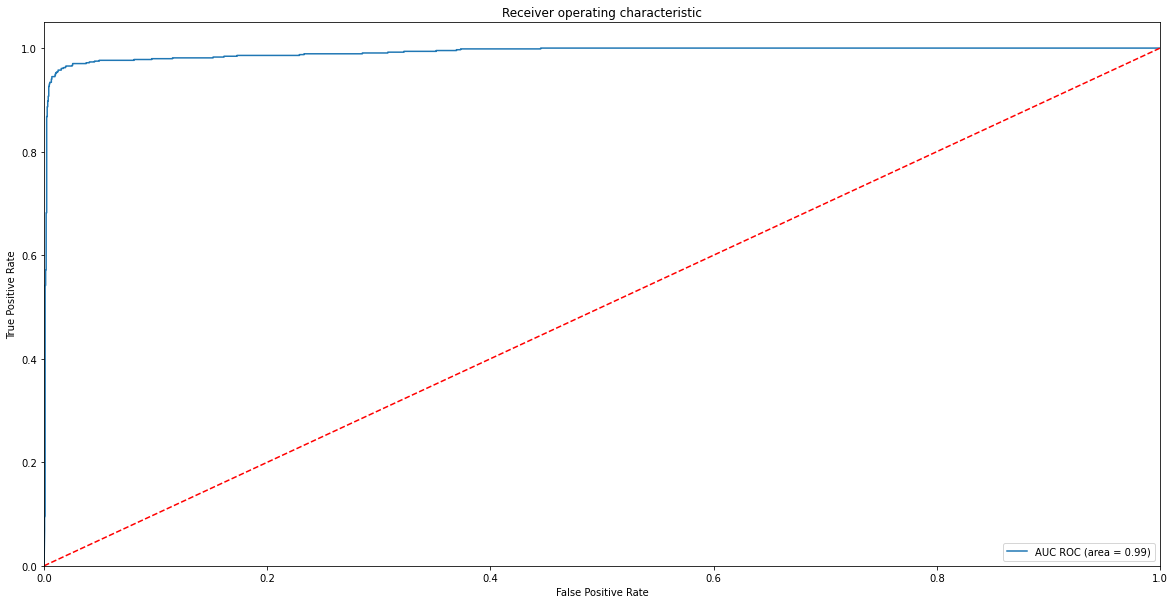

In [297]:
best_rf_model0=process_rf(df_employee_info1, 0, 'tuned_rf_model0')

In [298]:
best_rf_model0

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaling',
                                              MinMaxScaler(copy=True,
                                                           feature_range=(0,
                                                                          1))),
                                             ('imbalance',
                                              RandomOverSampler(random_state=0,
                                                                sampling_strategy='auto')),
                                             ('classifier',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight=None,
                                                                     crite

Performing model optimizations...
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.5s finished


Best parameters - :  {'classifier__n_estimators': 200, 'classifier__min_samples_split': 40, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'auto', 'classifier__max_depth': 18, 'classifier__criterion': 'gini'}
Best training accuracy - : 0.9378478098723708
Test accuracy -  :  0.9436734693877551
Recall Score - :  0.9751887810140237
Precison Score - :  0.975280634330811
F1 Score - :  0.9748617833144199
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.3s finished


Best parameters - :  {'classifier__n_estimators': 500, 'classifier__min_samples_split': 40, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 38, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.8435431348061952
Test accuracy -  :  0.8697042366107115
Recall Score - :  0.9413879899316793
Precison Score - :  0.9408766037748751
F1 Score - :  0.9410720559690027
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.8s finished


Best parameters - :  {'classifier__n_estimators': 300, 'classifier__min_samples_split': 50, 'classifier__min_samples_leaf': 17, 'classifier__max_features': 'log2', 'classifier__max_depth': 12, 'classifier__criterion': 'gini'}
Best training accuracy - : 0.8314400809614773
Test accuracy -  :  0.8571428571428572
Recall Score - :  0.9356346637900036
Precison Score - :  0.9351104175467139
F1 Score - :  0.9353249954880771
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.7s finished


Best parameters - :  {'classifier__n_estimators': 50, 'classifier__min_samples_split': 90, 'classifier__min_samples_leaf': 16, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 12, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.4856738462849116
Test accuracy -  :  0.4856115107913669
Recall Score - :  0.7943185904350953
Precison Score - :  0.7786639137751152
F1 Score - :  0.7833577547983067
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished


Best parameters - :  {'classifier__n_estimators': 500, 'classifier__min_samples_split': 20, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'log2', 'classifier__max_depth': 44, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.9159638001744159
Test accuracy -  :  0.9158415841584158
Recall Score - :  0.9633225458468176
Precison Score - :  0.9632843670201455
F1 Score - :  0.9626894663576391
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.9s finished


Best parameters - :  {'classifier__n_estimators': 500, 'classifier__min_samples_split': 30, 'classifier__min_samples_leaf': 7, 'classifier__max_features': 'log2', 'classifier__max_depth': 32, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.9364613688095105
Test accuracy -  :  0.9465283320031922
Recall Score - :  0.9759079467817332
Precison Score - :  0.9757793580805489
F1 Score - :  0.975792037417325
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    4.4s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.8s finished


Best parameters - :  {'classifier__n_estimators': 50, 'classifier__min_samples_split': 60, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'log2', 'classifier__max_depth': 36, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.8478991507021151
Test accuracy -  :  0.8667152221412965
Recall Score - :  0.9341963322545846
Precison Score - :  0.9406477354861894
F1 Score - :  0.9358555717727676
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    9.0s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.7s finished


Best parameters - :  {'classifier__n_estimators': 300, 'classifier__min_samples_split': 50, 'classifier__min_samples_leaf': 7, 'classifier__max_features': 'log2', 'classifier__max_depth': 16, 'classifier__criterion': 'gini'}
Best training accuracy - : 0.8357238110636815
Test accuracy -  :  0.8544395924308588
Recall Score - :  0.9280834232290543
Precison Score - :  0.9348962268666645
F1 Score - :  0.929912209858236
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.5s finished


Best parameters - :  {'classifier__n_estimators': 500, 'classifier__min_samples_split': 70, 'classifier__min_samples_leaf': 8, 'classifier__max_features': 'log2', 'classifier__max_depth': 10, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.6147181747934285
Test accuracy -  :  0.5958702064896755
Recall Score - :  0.753685724559511
Precison Score - :  0.8221575536376355
F1 Score - :  0.771030331536413
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.2s finished


Best parameters - :  {'classifier__n_estimators': 50, 'classifier__min_samples_split': 70, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'log2', 'classifier__max_depth': 38, 'classifier__criterion': 'gini'}
Best training accuracy - : 0.9129886910640537
Test accuracy -  :  0.9224683544303797
Recall Score - :  0.9647608773822366
Precison Score - :  0.9646552282199676
F1 Score - :  0.9647018370989162
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.4s finished


Best parameters - :  {'classifier__n_estimators': 50, 'classifier__min_samples_split': 80, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 40, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.9367565716733315
Test accuracy -  :  0.9390048154093099
Recall Score - :  0.9726717008270407
Precison Score - :  0.972503314921237
F1 Score - :  0.9724844892306492
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   17.5s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.4s finished


Best parameters - :  {'classifier__n_estimators': 50, 'classifier__min_samples_split': 50, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'log2', 'classifier__max_depth': 28, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.8498349251830462
Test accuracy -  :  0.8738601823708207
Recall Score - :  0.9403092412801151
Precison Score - :  0.9424112812020372
F1 Score - :  0.941029132167969
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.3s finished


Best parameters - :  {'classifier__n_estimators': 50, 'classifier__min_samples_split': 40, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'log2', 'classifier__max_depth': 44, 'classifier__criterion': 'gini'}
Best training accuracy - : 0.8360779990328323
Test accuracy -  :  0.8646616541353382
Recall Score - :  0.9352750809061489
Precison Score - :  0.9383796912055662
F1 Score - :  0.9362762164463776
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   48.3s finished


Best parameters - :  {'classifier__n_estimators': 500, 'classifier__min_samples_split': 80, 'classifier__min_samples_leaf': 15, 'classifier__max_features': 'auto', 'classifier__max_depth': 24, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.6093450896438897
Test accuracy -  :  0.5878928987194412
Recall Score - :  0.7454153182308522
Precison Score - :  0.819057757687906
F1 Score - :  0.7637738104111623
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished


Best parameters - :  {'classifier__n_estimators': 500, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 11, 'classifier__max_features': 'auto', 'classifier__max_depth': 12, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.9100130243199954
Test accuracy -  :  0.91725768321513
Recall Score - :  0.9622437971952535
Precison Score - :  0.9622231811148436
F1 Score - :  0.9622333182495325
Best Model values :
Best parameters - :  {'classifier__n_estimators': 500, 'classifier__min_samples_split': 30, 'classifier__min_samples_leaf': 7, 'classifier__max_features': 'log2', 'classifier__max_depth': 32, 'classifier__criterion': 'entropy'}
Best training accuracy - : 0.9364613688095105
Test accuracy -  :  0.9465283320031922
Recall Score - :  0.9759079467817332
Precison Score - :  0.9757793580805489
F1 Score - :  0.975792037417325
0.9896302221309008


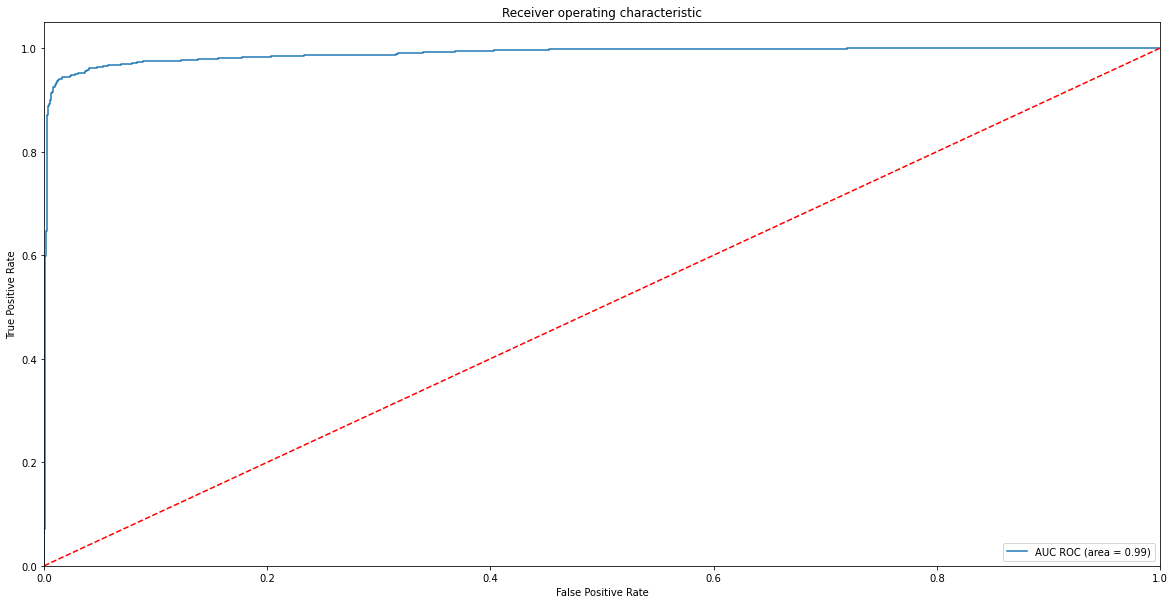

In [300]:
best_rf_model1=process_rf(df_employee_info2, 0, 'tuned_rf_model1')

In [301]:
best_rf_model1

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaling',
                                              MinMaxScaler(copy=True,
                                                           feature_range=(0,
                                                                          1))),
                                             ('imbalance',
                                              RandomOverSampler(random_state=0,
                                                                sampling_strategy='auto')),
                                             ('classifier',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight=None,
                                                                     crite

<a id=section622></a>
#### **6.2.2 XGBoost**

In [302]:
#Function to process Xtreme Gradient Boosting model using hyper parameter tuning
def process_xgb(data,stratified, filename):
    
    """
    data - input data
    stratified flag - wether to set the stratified flag to TRUE or FALSE (always FALSE in this case)
    """

    X=data.drop('status', axis=1)
    y=data['status']
    
    if (True==stratified):
        X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = .20, random_state = 0, stratify=y, shuffle=True)
    else:
        X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = .20, random_state = 0)
        

    
    pipe_1=Pipeline([('scaling', MinMaxScaler()),
                        ('classifier', XGBClassifier(random_state=0))])
    pipe_2=Pipeline([('scaling', MinMaxScaler()),
                        ('preprocess', SelectKBest(score_func=chi2, k=10)),
                        ('classifier', XGBClassifier(random_state=0))])
    pipe_3=Pipeline([('scaling', MinMaxScaler()),
                        ('preprocess', SelectKBest(score_func=f_classif, k=5)),
                        ('classifier', XGBClassifier(random_state=0))])
    pipe_4=Pipeline([('scaling', MinMaxScaler()),
                        ('preprocess', LDA(n_components=1)),
                        ('classifier', XGBClassifier(random_state=0))])
    pipe_5=Pipeline([('scaling', MinMaxScaler()),
                        ('preprocess', PCA(n_components=18)),
                        ('classifier', XGBClassifier(random_state=0))])
    pipe_6=Pipeline([('scaling', MinMaxScaler()),
                        ('imbalance', RandomOverSampler(random_state=0)),
                        ('classifier', XGBClassifier(random_state=0))])
    pipe_7=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', RandomOverSampler(random_state=0)),
                        ('preprocess', SelectKBest(score_func=chi2, k=10)),
                        ('classifier', XGBClassifier(random_state=0))])
    pipe_8=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', RandomOverSampler(random_state=0)),
                        ('preprocess', SelectKBest(score_func=f_classif, k=5)),
                        ('classifier', XGBClassifier(random_state=0))])
    pipe_9=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', RandomOverSampler(random_state=0)),
                        ('preprocess', LDA(n_components=1)),
                        ('classifier', XGBClassifier(random_state=0))])
    pipe_10=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', RandomOverSampler(random_state=0)),
                        ('preprocess', PCA(n_components=18)),
                        ('classifier', XGBClassifier(random_state=0))])
    pipe_11=Pipeline([('scaling', MinMaxScaler()),
                        ('imbalance', SMOTE(random_state=0)),
                        ('classifier', XGBClassifier(random_state=0))])
    pipe_12=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', SMOTE(random_state=0)),
                        ('preprocess', SelectKBest(score_func=chi2, k=10)),
                        ('classifier', XGBClassifier(random_state=0))])
    pipe_13=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', SMOTE(random_state=0)),
                        ('preprocess', SelectKBest(score_func=f_classif, k=5)),
                        ('classifier', XGBClassifier(random_state=0))])
    pipe_14=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', SMOTE(random_state=0)),
                        ('preprocess', LDA(n_components=1)),
                        ('classifier', XGBClassifier(random_state=0))])
    pipe_15=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', SMOTE(random_state=0)),
                        ('preprocess', PCA(n_components=18)),
                        ('classifier', XGBClassifier(random_state=0))])
    
    
    param_grid= {
                'classifier__eta': [0.3, 0.2, 0.1 , 0.01, 0.001],
                'classifier__max_depth':range(2,20,2),
                'classifier__gamma':[i/10.0 for i in range(0,5)],
                'classifier__min_child_weight': range(2,20,2),
                'classifier__subsample':[0.5, 0.6, 0.7,0.75,0.8,0.85,0.9,0.95,1],
                'classifier__reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
               }

    gs_1=RandomizedSearchCV(pipe_1, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_2=RandomizedSearchCV(pipe_2, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_3=RandomizedSearchCV(pipe_3, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_4=RandomizedSearchCV(pipe_4, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_5=RandomizedSearchCV(pipe_5, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_6=RandomizedSearchCV(pipe_6, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_7=RandomizedSearchCV(pipe_7, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_8=RandomizedSearchCV(pipe_8, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_9=RandomizedSearchCV(pipe_9, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_10=RandomizedSearchCV(pipe_10, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_11=RandomizedSearchCV(pipe_11, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_12=RandomizedSearchCV(pipe_12, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_13=RandomizedSearchCV(pipe_13, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_14=RandomizedSearchCV(pipe_14, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_15=RandomizedSearchCV(pipe_15, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
        
    
    grids=[gs_1,gs_2,gs_3,gs_4,gs_5,gs_6,gs_7,gs_8,gs_9,gs_10,gs_11,gs_12,gs_13,gs_14,gs_15]
    
    print('Performing model optimizations...')
   
    best_f1=0
    
    for gs in grids:
        gs.fit(X_tr, y_tr)
        print("Best parameters - : ", gs.best_params_)
        print("Best training accuracy - :", gs.best_score_)
        y_pred = gs.predict(X_ts)
        print("Test accuracy -  : ", gs.score(X_ts, y_ts))
        print ("Recall Score - : ", metrics.recall_score(y_ts, y_pred, average='weighted'))
        print ("Precison Score - : ", metrics.precision_score(y_ts, y_pred, average='weighted'))
        print ("F1 Score - : ", metrics.f1_score(y_ts, y_pred, average='weighted'))
        
        if metrics.f1_score(y_ts, y_pred, average='weighted')>best_f1:
            best_f1=metrics.f1_score(y_ts, y_pred, average='weighted')
            best_gs=gs
     
    print("===========================================================")
    print ("Best Model values :")
    print("Best parameters - : ", best_gs.best_params_)
    print("Best training accuracy - :", best_gs.best_score_)
    y_pred = best_gs.predict(X_ts)
    print("Test accuracy -  : ", best_gs.score(X_ts, y_ts))
    print ("Recall Score - : ", metrics.recall_score(y_ts, y_pred, average='weighted'))
    print ("Precison Score - : ", metrics.precision_score(y_ts, y_pred, average='weighted'))
    print ("F1 Score - : ", metrics.f1_score(y_ts, y_pred, average='weighted'))
    
    y_pred_proba = best_gs.predict_proba(X_ts)
    preds = y_pred_proba[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_ts, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)

    plt.figure()
    plt.plot(fpr, tpr, label='AUC ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    
    print("===========================================================")
    
    with open(filename, 'wb') as file:
        pickle.dump(best_gs, file)
    
    return best_gs

Performing model optimizations...
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.6s finished


Best parameters - :  {'classifier__subsample': 1, 'classifier__reg_alpha': 1e-05, 'classifier__min_child_weight': 2, 'classifier__max_depth': 4, 'classifier__gamma': 0.2, 'classifier__eta': 0.3}
Best training accuracy - : 0.9472277986834584
Test accuracy -  :  0.9506369426751592
Recall Score - :  0.9777058612010069
Precison Score - :  0.9775998682108465
F1 Score - :  0.9776178526410065
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.4s finished


Best parameters - :  {'classifier__subsample': 0.6, 'classifier__reg_alpha': 1, 'classifier__min_child_weight': 4, 'classifier__max_depth': 2, 'classifier__gamma': 0.3, 'classifier__eta': 0.3}
Best training accuracy - : 0.8484039450440063
Test accuracy -  :  0.8748068006182381
Recall Score - :  0.941747572815534
Precison Score - :  0.9426848450453645
F1 Score - :  0.9421239970265778
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.3s finished


Best parameters - :  {'classifier__subsample': 0.9, 'classifier__reg_alpha': 1, 'classifier__min_child_weight': 4, 'classifier__max_depth': 6, 'classifier__gamma': 0.0, 'classifier__eta': 0.1}
Best training accuracy - : 0.8381677701327049
Test accuracy -  :  0.8571428571428572
Recall Score - :  0.9341963322545846
Precison Score - :  0.9346309282457689
F1 Score - :  0.9343943206279153
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.3s finished


Best parameters - :  {'classifier__subsample': 0.8, 'classifier__reg_alpha': 100, 'classifier__min_child_weight': 8, 'classifier__max_depth': 6, 'classifier__gamma': 0.3, 'classifier__eta': 0.2}
Best training accuracy - : 0.5222997235495942
Test accuracy -  :  0.5094339622641508
Recall Score - :  0.7943185904350953
Precison Score - :  0.7834565273773948
F1 Score - :  0.7875788267113057
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.0s finished


Best parameters - :  {'classifier__subsample': 0.75, 'classifier__reg_alpha': 0.01, 'classifier__min_child_weight': 8, 'classifier__max_depth': 10, 'classifier__gamma': 0.3, 'classifier__eta': 0.1}
Best training accuracy - : 0.9206865266869977
Test accuracy -  :  0.9282296650717703
Recall Score - :  0.9676375404530745
Precison Score - :  0.9674346811064759
F1 Score - :  0.9674911787989193
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.7s finished


Best parameters - :  {'classifier__subsample': 0.95, 'classifier__reg_alpha': 1, 'classifier__min_child_weight': 2, 'classifier__max_depth': 12, 'classifier__gamma': 0.1, 'classifier__eta': 0.2}
Best training accuracy - : 0.953898736302971
Test accuracy -  :  0.9620253164556962
Recall Score - :  0.982740021574973
Precison Score - :  0.982695059635162
F1 Score - :  0.9827111038851836
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.5s finished


Best parameters - :  {'classifier__subsample': 0.6, 'classifier__reg_alpha': 0.01, 'classifier__min_child_weight': 6, 'classifier__max_depth': 12, 'classifier__gamma': 0.0, 'classifier__eta': 0.1}
Best training accuracy - : 0.8495674861198739
Test accuracy -  :  0.8569332355099045
Recall Score - :  0.9298813376483279
Precison Score - :  0.9356653458299641
F1 Score - :  0.9314970017347469
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.2s finished


Best parameters - :  {'classifier__subsample': 0.5, 'classifier__reg_alpha': 1, 'classifier__min_child_weight': 14, 'classifier__max_depth': 12, 'classifier__gamma': 0.2, 'classifier__eta': 0.1}
Best training accuracy - : 0.8345767079255442
Test accuracy -  :  0.8575581395348837
Recall Score - :  0.9295217547644732
Precison Score - :  0.9364481497723655
F1 Score - :  0.9313440536689971
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.5s finished


Best parameters - :  {'classifier__subsample': 0.7, 'classifier__reg_alpha': 100, 'classifier__min_child_weight': 2, 'classifier__max_depth': 10, 'classifier__gamma': 0.4, 'classifier__eta': 0.3}
Best training accuracy - : 0.6120925566215278
Test accuracy -  :  0.5956471935853379
Recall Score - :  0.7461344839985616
Precison Score - :  0.8253977985826411
F1 Score - :  0.7649059594274648
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   59.1s finished


Best parameters - :  {'classifier__subsample': 0.7, 'classifier__reg_alpha': 1e-05, 'classifier__min_child_weight': 10, 'classifier__max_depth': 16, 'classifier__gamma': 0.4, 'classifier__eta': 0.2}
Best training accuracy - : 0.9179124181727925
Test accuracy -  :  0.9203125
Recall Score - :  0.9633225458468176
Precison Score - :  0.9635573035774974
F1 Score - :  0.9634229896717751
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.8s finished


Best parameters - :  {'classifier__subsample': 0.75, 'classifier__reg_alpha': 0.01, 'classifier__min_child_weight': 4, 'classifier__max_depth': 8, 'classifier__gamma': 0.3, 'classifier__eta': 0.1}
Best training accuracy - : 0.9427226245970755
Test accuracy -  :  0.9471191791633781
Recall Score - :  0.9759079467817332
Precison Score - :  0.9758708957931232
F1 Score - :  0.9758878382129662
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.5s finished


Best parameters - :  {'classifier__subsample': 1, 'classifier__reg_alpha': 1e-05, 'classifier__min_child_weight': 4, 'classifier__max_depth': 4, 'classifier__gamma': 0.4, 'classifier__eta': 0.2}
Best training accuracy - : 0.8618825478743499
Test accuracy -  :  0.8754716981132076
Recall Score - :  0.9406688241639698
Precison Score - :  0.9433014885690617
F1 Score - :  0.9415151404096134
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.3s finished


Best parameters - :  {'classifier__subsample': 0.75, 'classifier__reg_alpha': 0.1, 'classifier__min_child_weight': 18, 'classifier__max_depth': 18, 'classifier__gamma': 0.1, 'classifier__eta': 0.1}
Best training accuracy - : 0.8416139686352381
Test accuracy -  :  0.8753753753753752
Recall Score - :  0.9403092412801151
Precison Score - :  0.9433993447071128
F1 Score - :  0.9412609906148891
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.3s finished


Best parameters - :  {'classifier__subsample': 0.7, 'classifier__reg_alpha': 1, 'classifier__min_child_weight': 14, 'classifier__max_depth': 2, 'classifier__gamma': 0.1, 'classifier__eta': 0.1}
Best training accuracy - : 0.6136475964997857
Test accuracy -  :  0.592
Recall Score - :  0.7432578209277239
Precison Score - :  0.8235508811619616
F1 Score - :  0.7623039263960627
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   56.6s finished


Best parameters - :  {'classifier__subsample': 0.9, 'classifier__reg_alpha': 1e-05, 'classifier__min_child_weight': 2, 'classifier__max_depth': 12, 'classifier__gamma': 0.3, 'classifier__eta': 0.3}
Best training accuracy - : 0.919586685033234
Test accuracy -  :  0.9255813953488372
Recall Score - :  0.9654800431499461
Precison Score - :  0.965988318422482
F1 Score - :  0.9656668345722358
Best Model values :
Best parameters - :  {'classifier__subsample': 0.95, 'classifier__reg_alpha': 1, 'classifier__min_child_weight': 2, 'classifier__max_depth': 12, 'classifier__gamma': 0.1, 'classifier__eta': 0.2}
Best training accuracy - : 0.953898736302971
Test accuracy -  :  0.9620253164556962
Recall Score - :  0.982740021574973
Precison Score - :  0.982695059635162
F1 Score - :  0.9827111038851836
0.9921714818266543


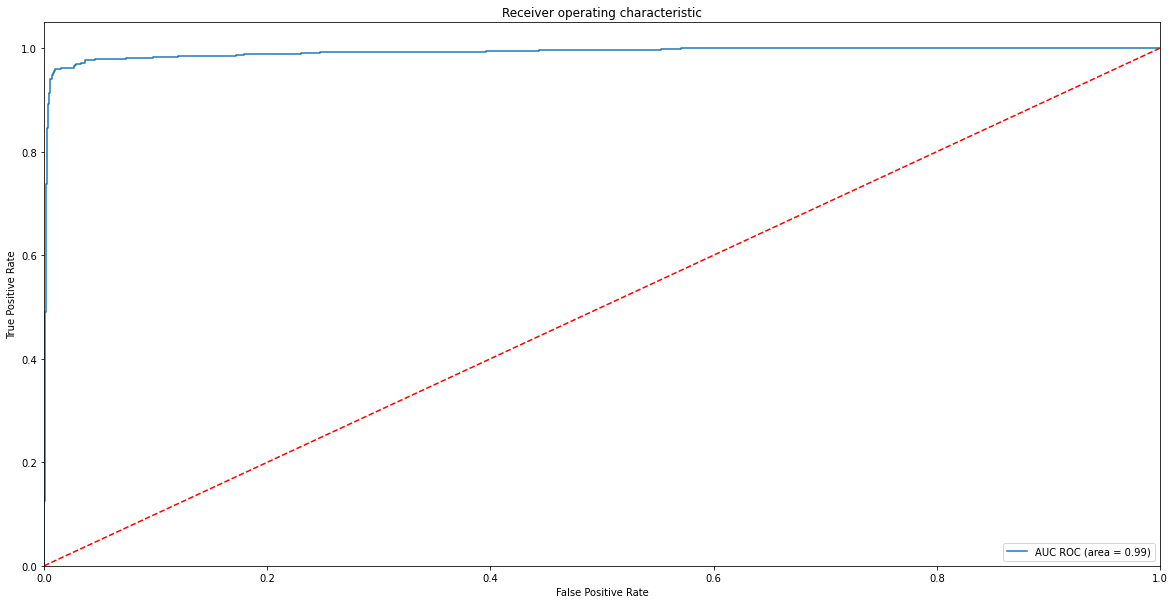

In [304]:
best_xgb_model0=process_xgb(df_employee_info1, 0, 'tuned_xgb_model0')

In [305]:
best_xgb_model0

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaling',
                                              MinMaxScaler(copy=True,
                                                           feature_range=(0,
                                                                          1))),
                                             ('imbalance',
                                              RandomOverSampler(random_state=0,
                                                                sampling_strategy='auto')),
                                             ('classifier',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
             

Performing model optimizations...
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.7s finished


Best parameters - :  {'classifier__subsample': 0.95, 'classifier__reg_alpha': 0.1, 'classifier__min_child_weight': 6, 'classifier__max_depth': 10, 'classifier__gamma': 0.3, 'classifier__eta': 0.1}
Best training accuracy - : 0.935044892909491
Test accuracy -  :  0.9472
Recall Score - :  0.9762675296655879
Precison Score - :  0.9761413440363237
F1 Score - :  0.9761327080994209
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished


Best parameters - :  {'classifier__subsample': 0.95, 'classifier__reg_alpha': 1, 'classifier__min_child_weight': 12, 'classifier__max_depth': 4, 'classifier__gamma': 0.1, 'classifier__eta': 0.3}
Best training accuracy - : 0.8524905094829567
Test accuracy -  :  0.8750969743987588
Recall Score - :  0.9421071556993887
Precison Score - :  0.9428192924447442
F1 Score - :  0.9424051181250175
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.9s finished


Best parameters - :  {'classifier__subsample': 0.75, 'classifier__reg_alpha': 0.01, 'classifier__min_child_weight': 4, 'classifier__max_depth': 2, 'classifier__gamma': 0.4, 'classifier__eta': 0.3}
Best training accuracy - : 0.8405318842149786
Test accuracy -  :  0.8578052550231839
Recall Score - :  0.9338367493707299
Precison Score - :  0.9348733369717187
F1 Score - :  0.9342642929190761
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.7s finished


Best parameters - :  {'classifier__subsample': 0.8, 'classifier__reg_alpha': 100, 'classifier__min_child_weight': 4, 'classifier__max_depth': 16, 'classifier__gamma': 0.1, 'classifier__eta': 0.001}
Best training accuracy - : 0.5271971925166647
Test accuracy -  :  0.5317919075144508
Recall Score - :  0.7961165048543689
Precison Score - :  0.7897726341525464
F1 Score - :  0.7925322365843035
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   36.3s finished


Best parameters - :  {'classifier__subsample': 1, 'classifier__reg_alpha': 1e-05, 'classifier__min_child_weight': 4, 'classifier__max_depth': 14, 'classifier__gamma': 0.1, 'classifier__eta': 0.2}
Best training accuracy - : 0.9229109410310317
Test accuracy -  :  0.9357652656621729
Recall Score - :  0.970873786407767
Precison Score - :  0.9707552546385539
F1 Score - :  0.9708003205424541
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.6s finished


Best parameters - :  {'classifier__subsample': 0.7, 'classifier__reg_alpha': 1, 'classifier__min_child_weight': 2, 'classifier__max_depth': 10, 'classifier__gamma': 0.1, 'classifier__eta': 0.01}
Best training accuracy - : 0.9341498704637352
Test accuracy -  :  0.9349019607843138
Recall Score - :  0.9701546206400575
Precison Score - :  0.9702454768302492
F1 Score - :  0.970195736408492
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.3s finished


Best parameters - :  {'classifier__subsample': 0.75, 'classifier__reg_alpha': 1, 'classifier__min_child_weight': 4, 'classifier__max_depth': 10, 'classifier__gamma': 0.4, 'classifier__eta': 0.2}
Best training accuracy - : 0.8486650317495901
Test accuracy -  :  0.8652271034996276
Recall Score - :  0.9349154980222941
Precison Score - :  0.9389403239383524
F1 Score - :  0.9361212938981306
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.2s finished


Best parameters - :  {'classifier__subsample': 0.75, 'classifier__reg_alpha': 1, 'classifier__min_child_weight': 14, 'classifier__max_depth': 10, 'classifier__gamma': 0.1, 'classifier__eta': 0.1}
Best training accuracy - : 0.8341019807431407
Test accuracy -  :  0.8581818181818182
Recall Score - :  0.9298813376483279
Precison Score - :  0.9367021726492384
F1 Score - :  0.9316793910383409
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.8s finished


Best parameters - :  {'classifier__subsample': 0.6, 'classifier__reg_alpha': 100, 'classifier__min_child_weight': 10, 'classifier__max_depth': 12, 'classifier__gamma': 0.1, 'classifier__eta': 0.3}
Best training accuracy - : 0.6151914160041272
Test accuracy -  :  0.5965714285714285
Recall Score - :  0.7461344839985616
Precison Score - :  0.8262227574259757
F1 Score - :  0.7649671877249582
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   50.4s finished


Best parameters - :  {'classifier__subsample': 0.95, 'classifier__reg_alpha': 1e-05, 'classifier__min_child_weight': 14, 'classifier__max_depth': 8, 'classifier__gamma': 0.4, 'classifier__eta': 0.3}
Best training accuracy - : 0.9179257766057434
Test accuracy -  :  0.920807453416149
Recall Score - :  0.9633225458468176
Precison Score - :  0.9637895152447696
F1 Score - :  0.9635015986460108
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.7s finished


Best parameters - :  {'classifier__subsample': 0.95, 'classifier__reg_alpha': 0.01, 'classifier__min_child_weight': 10, 'classifier__max_depth': 8, 'classifier__gamma': 0.4, 'classifier__eta': 0.3}
Best training accuracy - : 0.9382307995751649
Test accuracy -  :  0.9423835832675611
Recall Score - :  0.9737504494786048
Precison Score - :  0.9737097837787713
F1 Score - :  0.9737285401424853
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.4s finished


Best parameters - :  {'classifier__subsample': 0.85, 'classifier__reg_alpha': 0.01, 'classifier__min_child_weight': 12, 'classifier__max_depth': 10, 'classifier__gamma': 0.2, 'classifier__eta': 0.2}
Best training accuracy - : 0.8528921346764486
Test accuracy -  :  0.8694992412746587
Recall Score - :  0.9381517439769866
Precison Score - :  0.9404214694315725
F1 Score - :  0.9389282096060423
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.9s finished


Best parameters - :  {'classifier__subsample': 0.9, 'classifier__reg_alpha': 1, 'classifier__min_child_weight': 4, 'classifier__max_depth': 4, 'classifier__gamma': 0.1, 'classifier__eta': 0.3}
Best training accuracy - : 0.8412536212187124
Test accuracy -  :  0.8654708520179373
Recall Score - :  0.9352750809061489
Precison Score - :  0.9389290826391572
F1 Score - :  0.936398823227266
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.3s finished


Best parameters - :  {'classifier__subsample': 0.5, 'classifier__reg_alpha': 0.1, 'classifier__min_child_weight': 12, 'classifier__max_depth': 2, 'classifier__gamma': 0.4, 'classifier__eta': 0.3}
Best training accuracy - : 0.6142810796176035
Test accuracy -  :  0.591116173120729
Recall Score - :  0.7418194893923049
Precison Score - :  0.8234557805361116
F1 Score - :  0.7610632654585126
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


Best parameters - :  {'classifier__subsample': 0.75, 'classifier__reg_alpha': 1e-05, 'classifier__min_child_weight': 2, 'classifier__max_depth': 14, 'classifier__gamma': 0.2, 'classifier__eta': 0.1}
Best training accuracy - : 0.9196313862526886
Test accuracy -  :  0.9245136186770428
Recall Score - :  0.9651204602660913
Precison Score - :  0.965481377486316
F1 Score - :  0.9652628737858098
Best Model values :
Best parameters - :  {'classifier__subsample': 0.95, 'classifier__reg_alpha': 0.1, 'classifier__min_child_weight': 6, 'classifier__max_depth': 10, 'classifier__gamma': 0.3, 'classifier__eta': 0.1}
Best training accuracy - : 0.935044892909491
Test accuracy -  :  0.9472
Recall Score - :  0.9762675296655879
Precison Score - :  0.9761413440363237
F1 Score - :  0.9761327080994209
0.9896881948470327


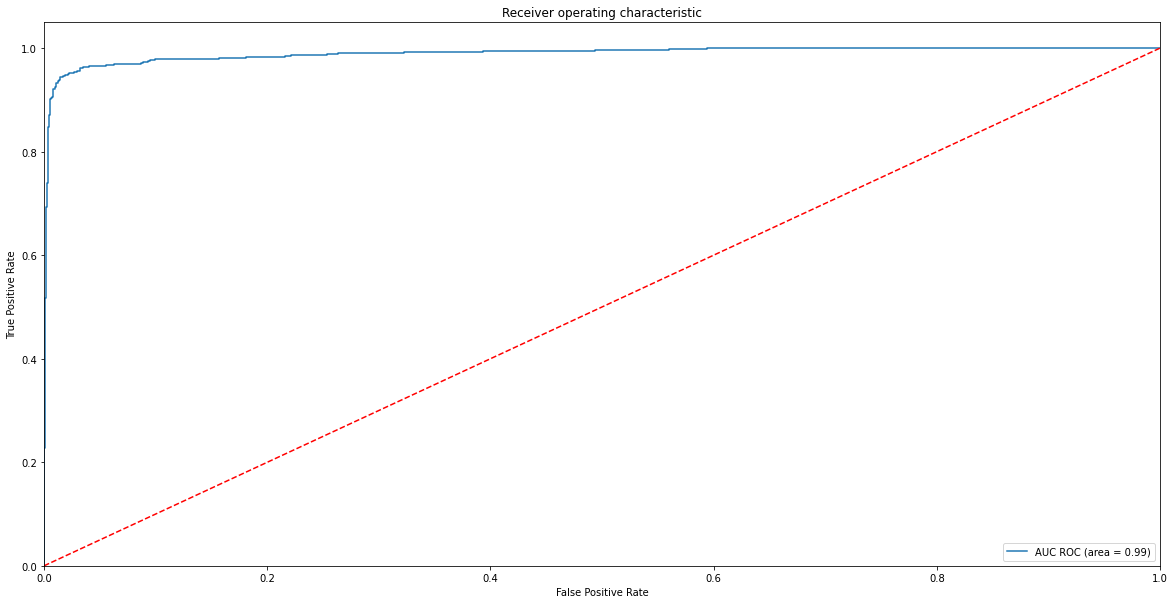

In [307]:
best_xgb_model1=process_xgb(df_employee_info2, 0, 'tuned_xgb_model1')

In [308]:
best_xgb_model1

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaling',
                                              MinMaxScaler(copy=True,
                                                           feature_range=(0,
                                                                          1))),
                                             ('classifier',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=None,
                

<a id=section623></a>
#### **6.2.3 LightGBM**

In [309]:
#Function to process Light GBM using hyper parameter tuning
def process_lgbm(data,stratified, filename):

    """
    data - input data
    stratified flag - wether to set the stratified flag to TRUE or FALSE (always FALSE in this case)
    """
        
    X=data.drop('status', axis=1)
    y=data['status']
    
    if (True==stratified):
        X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = .20, random_state = 0, stratify=y, shuffle=True)
    else:
        X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = .20, random_state = 0)
        
    preprocess_step=FeatureUnion([('kbest', SelectKBest(score_func=f_classif, k=15))])
    
    params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}

    lgbmdl = LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = -1, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'],
        random_state=0)

    pipe_1=Pipeline([('scaling', MinMaxScaler()),
                        ('classifier', lgbmdl)])
    pipe_2=Pipeline([('scaling', MinMaxScaler()),
                        ('preprocess', SelectKBest(score_func=chi2, k=10)),
                        ('classifier', lgbmdl)])
    pipe_3=Pipeline([('scaling', MinMaxScaler()),
                        ('preprocess', SelectKBest(score_func=f_classif, k=5)),
                        ('classifier', lgbmdl)])
    pipe_4=Pipeline([('scaling', MinMaxScaler()),
                        ('preprocess', LDA(n_components=1)),
                        ('classifier', lgbmdl)])
    pipe_5=Pipeline([('scaling', MinMaxScaler()),
                        ('preprocess', PCA(n_components=18)),
                        ('classifier', lgbmdl)])
    pipe_6=Pipeline([('scaling', MinMaxScaler()),
                        ('imbalance', RandomOverSampler(random_state=0)),
                        ('classifier', lgbmdl)])
    pipe_7=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', RandomOverSampler(random_state=0)),
                        ('preprocess', SelectKBest(score_func=chi2, k=10)),
                        ('classifier', lgbmdl)])
    pipe_8=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', RandomOverSampler(random_state=0)),
                        ('preprocess', SelectKBest(score_func=f_classif, k=5)),
                        ('classifier', lgbmdl)])
    pipe_9=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', RandomOverSampler(random_state=0)),
                        ('preprocess', LDA(n_components=1)),
                        ('classifier', lgbmdl)])
    pipe_10=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', RandomOverSampler(random_state=0)),
                        ('preprocess', PCA(n_components=18)),
                        ('classifier', lgbmdl)])
    pipe_11=Pipeline([('scaling', MinMaxScaler()),
                        ('imbalance', SMOTE(random_state=0)),
                        ('classifier', lgbmdl)])
    pipe_12=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', SMOTE(random_state=0)),
                        ('preprocess', SelectKBest(score_func=chi2, k=10)),
                        ('classifier', lgbmdl)])
    pipe_13=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', SMOTE(random_state=0)),
                        ('preprocess', SelectKBest(score_func=f_classif, k=5)),
                        ('classifier', lgbmdl)])
    pipe_14=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', SMOTE(random_state=0)),
                        ('preprocess', LDA(n_components=1)),
                        ('classifier', lgbmdl)])
    pipe_15=Pipeline([('scaling', MinMaxScaler()),
                         ('imbalance', SMOTE(random_state=0)),
                        ('preprocess', PCA(n_components=18)),
                        ('classifier', lgbmdl)])

    param_grid = {
        'classifier__learning_rate': [0.1, 0.01, 0.005, 0.001],
        'classifier__n_estimators': [10, 100,250,500],
        'classifier__num_leaves': range(0,20, 1),
        'classifier__boosting_type' : ['gbdt'],
        'classifier__objective' : ['binary'],
        'classifier__colsample_bytree' : [0.65, 0.66],
        'classifier__subsample' : [0.5, 0.6, 0.7,0.75,0.8,0.85,0.9,0.95,1],
        'classifier__eg_alpha' : [1,1.2],
        'classifier__reg_lambda' : [1,1.2,1.4]
    }


    gs_1=RandomizedSearchCV(pipe_1, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_2=RandomizedSearchCV(pipe_2, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_3=RandomizedSearchCV(pipe_3, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_4=RandomizedSearchCV(pipe_4, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_5=RandomizedSearchCV(pipe_5, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_6=RandomizedSearchCV(pipe_6, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_7=RandomizedSearchCV(pipe_7, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_8=RandomizedSearchCV(pipe_8, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_9=RandomizedSearchCV(pipe_9, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_10=RandomizedSearchCV(pipe_10, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_11=RandomizedSearchCV(pipe_11, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_12=RandomizedSearchCV(pipe_12, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_13=RandomizedSearchCV(pipe_13, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_14=RandomizedSearchCV(pipe_14, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
    gs_15=RandomizedSearchCV(pipe_15, param_distributions=param_grid, n_iter=10, cv =10, verbose=True, n_jobs=-1, return_train_score=True, refit='f1_score', scoring='f1')
        
    
    grids=[gs_1,gs_2,gs_3,gs_4,gs_5,gs_6,gs_7,gs_8,gs_9,gs_10,gs_11,gs_12,gs_13,gs_14,gs_15]
    
    print('Performing model optimizations...')
   
    best_f1=0
    
    for gs in grids:
        gs.fit(X_tr, y_tr)
        print("Best parameters - : ", gs.best_params_)
        print("Best training accuracy - :", gs.best_score_)
        y_pred = gs.predict(X_ts)
        print("Test accuracy -  : ", gs.score(X_ts, y_ts))
        print ("Recall Score - : ", metrics.recall_score(y_ts, y_pred, average='weighted'))
        print ("Precison Score - : ", metrics.precision_score(y_ts, y_pred, average='weighted'))
        print ("F1 Score - : ", metrics.f1_score(y_ts, y_pred, average='weighted'))
        
        if metrics.f1_score(y_ts, y_pred, average='weighted')>best_f1:
            best_f1=metrics.f1_score(y_ts, y_pred, average='weighted')
            best_gs=gs
     
    print("===========================================================")
    print ("Best Model values :")
    print("Best parameters - : ", best_gs.best_params_)
    print("Best training accuracy - :", best_gs.best_score_)
    y_pred = best_gs.predict(X_ts)
    print("Test accuracy -  : ", best_gs.score(X_ts, y_ts))
    print ("Recall Score - : ", metrics.recall_score(y_ts, y_pred, average='weighted'))
    print ("Precison Score - : ", metrics.precision_score(y_ts, y_pred, average='weighted'))
    print ("F1 Score - : ", metrics.f1_score(y_ts, y_pred, average='weighted'))
    
    y_pred_proba = best_gs.predict_proba(X_ts)
    preds = y_pred_proba[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_ts, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)

    plt.figure()
    plt.plot(fpr, tpr, label='AUC ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    
    print("===========================================================")
    
    with open(filename, 'wb') as file:
        pickle.dump(best_gs, file)
    
    return best_gs

Performing model optimizations...
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.75, 'classifier__reg_lambda': 1.4, 'classifier__objective': 'binary', 'classifier__num_leaves': 19, 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1.2, 'classifier__colsample_bytree': 0.66, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.9449875001750169
Test accuracy -  :  0.9554140127388534
Recall Score - :  0.9798633585041352
Precison Score - :  0.9797746932398996
F1 Score - :  0.9797838669015542
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.85, 'classifier__reg_lambda': 1, 'classifier__objective': 'binary', 'classifier__num_leaves': 14, 'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1.2, 'classifier__colsample_bytree': 0.65, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.8541626137910754
Test accuracy -  :  0.8756841282251758
Recall Score - :  0.9428263214670982
Precison Score - :  0.9431348614468279
F1 Score - :  0.9429674094286152
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.95, 'classifier__reg_lambda': 1.4, 'classifier__objective': 'binary', 'classifier__num_leaves': 6, 'classifier__n_estimators': 250, 'classifier__learning_rate': 0.005, 'classifier__eg_alpha': 1, 'classifier__colsample_bytree': 0.66, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.30156980749391643
Test accuracy -  :  0.2099447513812155
Recall Score - :  0.7943185904350953
Precison Score - :  0.8064096902247215
F1 Score - :  0.728368173708469
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.6, 'classifier__reg_lambda': 1.4, 'classifier__objective': 'binary', 'classifier__num_leaves': 18, 'classifier__n_estimators': 250, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1, 'classifier__colsample_bytree': 0.66, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.4955053060572279
Test accuracy -  :  0.5145797598627788
Recall Score - :  0.7964760877382236
Precison Score - :  0.7857754428591648
F1 Score - :  0.7898070208367117
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.7, 'classifier__reg_lambda': 1, 'classifier__objective': 'binary', 'classifier__num_leaves': 13, 'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1.2, 'classifier__colsample_bytree': 0.65, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.9130262535302045
Test accuracy -  :  0.920353982300885
Recall Score - :  0.9644012944983819
Precison Score - :  0.9641079124634153
F1 Score - :  0.964125935056536
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.8, 'classifier__reg_lambda': 1.4, 'classifier__objective': 'binary', 'classifier__num_leaves': 15, 'classifier__n_estimators': 250, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1, 'classifier__colsample_bytree': 0.65, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.9406118729024355
Test accuracy -  :  0.9401709401709402
Recall Score - :  0.972312117943186
Precison Score - :  0.972666634677678
F1 Score - :  0.972439930813859
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    4.5s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.6s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.8, 'classifier__reg_lambda': 1.2, 'classifier__objective': 'binary', 'classifier__num_leaves': 13, 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1, 'classifier__colsample_bytree': 0.65, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.8479196668233785
Test accuracy -  :  0.8600435097897027
Recall Score - :  0.9306005034160374
Precison Score - :  0.9377471733720044
F1 Score - :  0.9324390671992722
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.3s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.75, 'classifier__reg_lambda': 1.2, 'classifier__objective': 'binary', 'classifier__num_leaves': 17, 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1, 'classifier__colsample_bytree': 0.66, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.82809326116147
Test accuracy -  :  0.8421052631578947
Recall Score - :  0.919093851132686
Precison Score - :  0.9315187772694137
F1 Score - :  0.92197836433938
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.85, 'classifier__reg_lambda': 1.4, 'classifier__objective': 'binary', 'classifier__num_leaves': 8, 'classifier__n_estimators': 250, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1, 'classifier__colsample_bytree': 0.65, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.6141583008041817
Test accuracy -  :  0.5959885386819485
Recall Score - :  0.7464940668824164
Precison Score - :  0.8255258797170215
F1 Score - :  0.7652234684792784
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.85, 'classifier__reg_lambda': 1, 'classifier__objective': 'binary', 'classifier__num_leaves': 14, 'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1.2, 'classifier__colsample_bytree': 0.65, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.8973264827134931
Test accuracy -  :  0.8949771689497718
Recall Score - :  0.9503775620280475
Precison Score - :  0.95214422232573
F1 Score - :  0.9509513890749975
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.1s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.7, 'classifier__reg_lambda': 1.2, 'classifier__objective': 'binary', 'classifier__num_leaves': 15, 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1, 'classifier__colsample_bytree': 0.66, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.9394271554755281
Test accuracy -  :  0.9443137254901961
Recall Score - :  0.9744696152463143
Precison Score - :  0.9745486545159228
F1 Score - :  0.9745047865663004
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.5s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.7, 'classifier__reg_lambda': 1.2, 'classifier__objective': 'binary', 'classifier__num_leaves': 16, 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1, 'classifier__colsample_bytree': 0.65, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.858705880660373
Test accuracy -  :  0.8707280832095096
Recall Score - :  0.9374325782092773
Precison Score - :  0.941590229741865
F1 Score - :  0.9386350311551933
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.4s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 1, 'classifier__reg_lambda': 1.2, 'classifier__objective': 'binary', 'classifier__num_leaves': 12, 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1.2, 'classifier__colsample_bytree': 0.65, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.8239718228796266
Test accuracy -  :  0.8336871903750884
Recall Score - :  0.9154980222941388
Precison Score - :  0.9268087021434599
F1 Score - :  0.9183177255875649
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.9, 'classifier__reg_lambda': 1.4, 'classifier__objective': 'binary', 'classifier__num_leaves': 5, 'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1.2, 'classifier__colsample_bytree': 0.66, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.6145995806941517
Test accuracy -  :  0.5934959349593496
Recall Score - :  0.7482919813016901
Precison Score - :  0.8225199830596515
F1 Score - :  0.7665127659232363
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.2s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.7, 'classifier__reg_lambda': 1.2, 'classifier__objective': 'binary', 'classifier__num_leaves': 19, 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1.2, 'classifier__colsample_bytree': 0.65, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.9150898364445228
Test accuracy -  :  0.9191685912240184
Recall Score - :  0.9622437971952535
Precison Score - :  0.9631088302315971
F1 Score - :  0.9625368258073026
Best Model values :
Best parameters - :  {'classifier__subsample': 0.75, 'classifier__reg_lambda': 1.4, 'classifier__objective': 'binary', 'classifier__num_leaves': 19, 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1.2, 'classifier__colsample_bytree': 0.66, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.9449875001750169
Test accuracy -  :  0.9554140127388534
Recall Score 

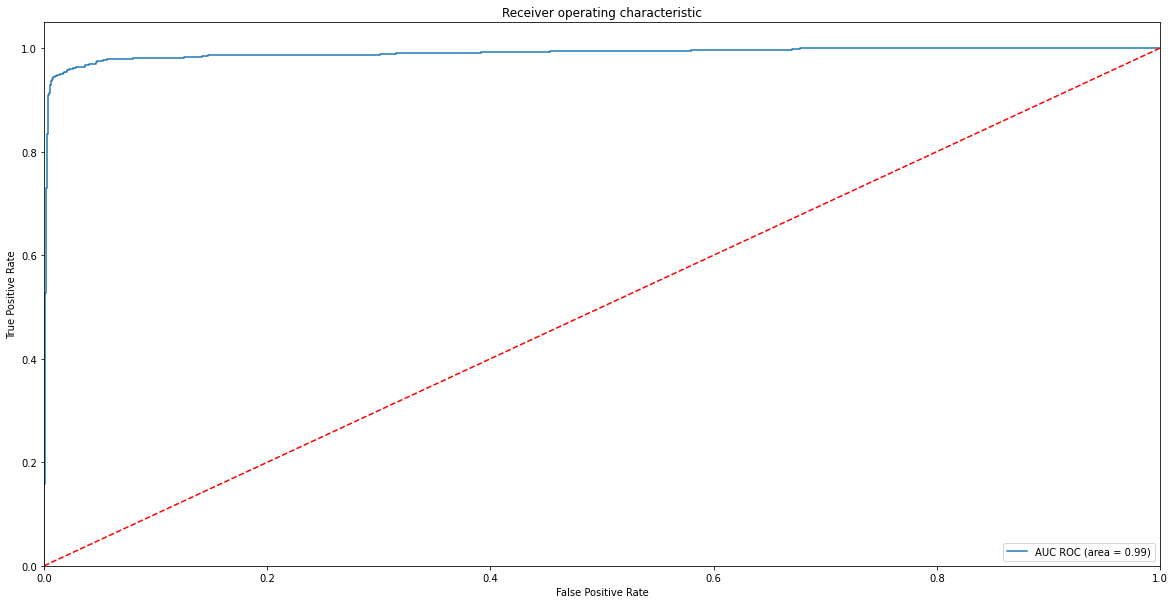

In [311]:
best_lgbm_model0=process_lgbm(df_employee_info1, 0, 'tuned_lgbm_model0')

In [312]:
best_lgbm_model0

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaling',
                                              MinMaxScaler(copy=True,
                                                           feature_range=(0,
                                                                          1))),
                                             ('classifier',
                                              LGBMClassifier(boosting_type='gbdt',
                                                             class_weight=None,
                                                             colsample_bytree=1.0,
                                                             importance_type='split',
                                                             learning_rate=0.1,
                                                             max_bin=512,
                                                             max_depth=-1,
 

Performing model optimizations...
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.9s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.85, 'classifier__reg_lambda': 1.2, 'classifier__objective': 'binary', 'classifier__num_leaves': 12, 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.01, 'classifier__eg_alpha': 1, 'classifier__colsample_bytree': 0.66, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.9382783642432034
Test accuracy -  :  0.9472843450479234
Recall Score - :  0.9762675296655879
Precison Score - :  0.9761413847448231
F1 Score - :  0.9761464862031477
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.5, 'classifier__reg_lambda': 1, 'classifier__objective': 'binary', 'classifier__num_leaves': 19, 'classifier__n_estimators': 250, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1, 'classifier__colsample_bytree': 0.66, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.8558119583150514
Test accuracy -  :  0.86875
Recall Score - :  0.9395900755124056
Precison Score - :  0.9399532523459095
F1 Score - :  0.9397555124005709
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    3.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.2s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.7, 'classifier__reg_lambda': 1, 'classifier__objective': 'binary', 'classifier__num_leaves': 18, 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1, 'classifier__colsample_bytree': 0.66, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.8386340071688554
Test accuracy -  :  0.8584758942457231
Recall Score - :  0.9345559151384394
Precison Score - :  0.9352066542772738
F1 Score - :  0.9348405924850913
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.9, 'classifier__reg_lambda': 1.4, 'classifier__objective': 'binary', 'classifier__num_leaves': 14, 'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1.2, 'classifier__colsample_bytree': 0.65, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.514103915649696
Test accuracy -  :  0.5004374453193351
Recall Score - :  0.79467817331895
Precison Score - :  0.7817331104014373
F1 Score - :  0.7862218319620929
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.5s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.5, 'classifier__reg_lambda': 1, 'classifier__objective': 'binary', 'classifier__num_leaves': 16, 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.01, 'classifier__eg_alpha': 1.2, 'classifier__colsample_bytree': 0.65, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.907825423298028
Test accuracy -  :  0.9182186234817813
Recall Score - :  0.9636821287306724
Precison Score - :  0.9633823238221104
F1 Score - :  0.9633143860258628
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 1, 'classifier__reg_lambda': 1.2, 'classifier__objective': 'binary', 'classifier__num_leaves': 9, 'classifier__n_estimators': 250, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1.2, 'classifier__colsample_bytree': 0.65, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.9266668206224378
Test accuracy -  :  0.926040061633282
Recall Score - :  0.9654800431499461
Precison Score - :  0.9662599498613884
F1 Score - :  0.9657390298953651
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.8, 'classifier__reg_lambda': 1.4, 'classifier__objective': 'binary', 'classifier__num_leaves': 14, 'classifier__n_estimators': 250, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1.2, 'classifier__colsample_bytree': 0.66, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.8444630418790465
Test accuracy -  :  0.8575539568345324
Recall Score - :  0.9288025889967637
Precison Score - :  0.9370591703681455
F1 Score - :  0.9308519264510945
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.0s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.95, 'classifier__reg_lambda': 1, 'classifier__objective': 'binary', 'classifier__num_leaves': 9, 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.005, 'classifier__eg_alpha': 1.2, 'classifier__colsample_bytree': 0.66, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.8004893845948393
Test accuracy -  :  0.801635991820041
Recall Score - :  0.895361380798274
Precison Score - :  0.9144276868417828
F1 Score - :  0.8998702700848948
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.95, 'classifier__reg_lambda': 1.4, 'classifier__objective': 'binary', 'classifier__num_leaves': 11, 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1.2, 'classifier__colsample_bytree': 0.65, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.6130990803525813
Test accuracy -  :  0.591501416430595
Recall Score - :  0.7407407407407407
Precison Score - :  0.8243282330802364
F1 Score - :  0.7601964862065091
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    5.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.75, 'classifier__reg_lambda': 1.4, 'classifier__objective': 'binary', 'classifier__num_leaves': 17, 'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1.2, 'classifier__colsample_bytree': 0.65, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.9029697719739476
Test accuracy -  :  0.9005315110098709
Recall Score - :  0.9528946422150306
Precison Score - :  0.9547619501088612
F1 Score - :  0.9534743989091748
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.4s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.6, 'classifier__reg_lambda': 1.4, 'classifier__objective': 'binary', 'classifier__num_leaves': 18, 'classifier__n_estimators': 250, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1, 'classifier__colsample_bytree': 0.65, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.9368550129041046
Test accuracy -  :  0.947285601888277
Recall Score - :  0.9759079467817332
Precison Score - :  0.9759216377217234
F1 Score - :  0.9759146171021466
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 1, 'classifier__reg_lambda': 1.2, 'classifier__objective': 'binary', 'classifier__num_leaves': 11, 'classifier__n_estimators': 100, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1, 'classifier__colsample_bytree': 0.66, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.845443470436777
Test accuracy -  :  0.8617176128093159
Recall Score - :  0.9316792520676016
Precison Score - :  0.9383306025285626
F1 Score - :  0.933416599365324
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.5, 'classifier__reg_lambda': 1, 'classifier__objective': 'binary', 'classifier__num_leaves': 6, 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1.2, 'classifier__colsample_bytree': 0.65, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.8280414381067025
Test accuracy -  :  0.8553008595988538
Recall Score - :  0.9273642574613449
Precison Score - :  0.9362759611803559
F1 Score - :  0.929543803340047
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.75, 'classifier__reg_lambda': 1, 'classifier__objective': 'binary', 'classifier__num_leaves': 14, 'classifier__n_estimators': 250, 'classifier__learning_rate': 0.01, 'classifier__eg_alpha': 1.2, 'classifier__colsample_bytree': 0.66, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.611766672245375
Test accuracy -  :  0.5914844649021864
Recall Score - :  0.7446961524631428
Precison Score - :  0.822424966979239
F1 Score - :  0.7634469552294941
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.7s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Best parameters - :  {'classifier__subsample': 0.95, 'classifier__reg_lambda': 1.4, 'classifier__objective': 'binary', 'classifier__num_leaves': 18, 'classifier__n_estimators': 250, 'classifier__learning_rate': 0.1, 'classifier__eg_alpha': 1.2, 'classifier__colsample_bytree': 0.66, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.9113315140978104
Test accuracy -  :  0.912875867386276
Recall Score - :  0.9593671341244157
Precison Score - :  0.9601967223809607
F1 Score - :  0.9596614516395223
Best Model values :
Best parameters - :  {'classifier__subsample': 0.85, 'classifier__reg_lambda': 1.2, 'classifier__objective': 'binary', 'classifier__num_leaves': 12, 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.01, 'classifier__eg_alpha': 1, 'classifier__colsample_bytree': 0.66, 'classifier__boosting_type': 'gbdt'}
Best training accuracy - : 0.9382783642432034
Test accuracy -  :  0.9472843450479234
Recall Score -

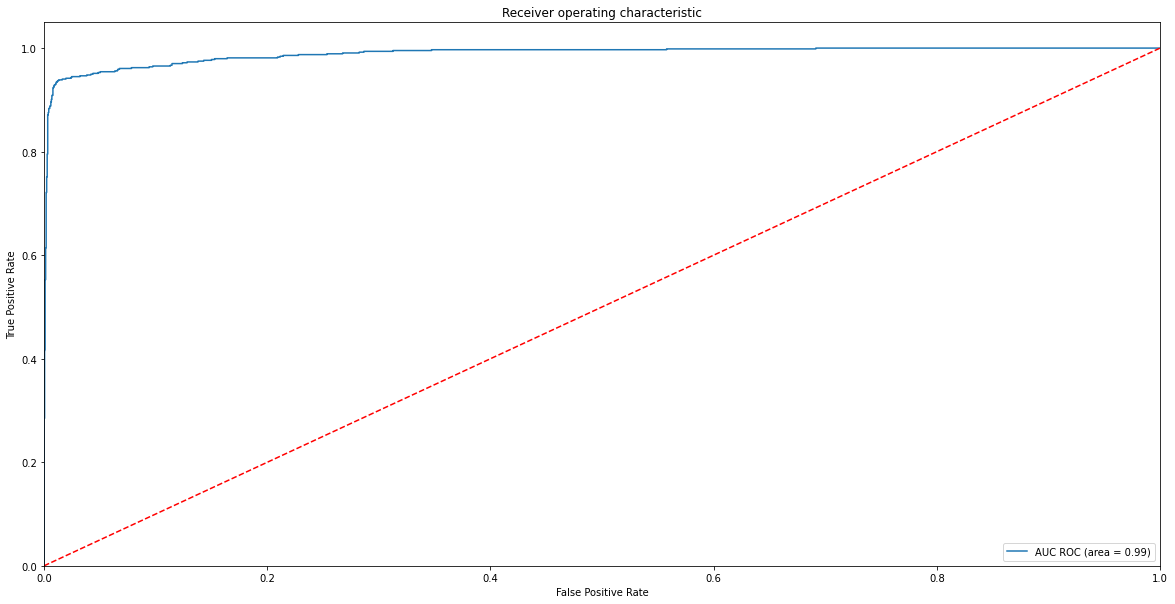

In [314]:
best_lgbm_model1=process_lgbm(df_employee_info2, 0, 'tuned_lgbm_model1')

In [315]:
best_lgbm_model1

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaling',
                                              MinMaxScaler(copy=True,
                                                           feature_range=(0,
                                                                          1))),
                                             ('classifier',
                                              LGBMClassifier(boosting_type='gbdt',
                                                             class_weight=None,
                                                             colsample_bytree=1.0,
                                                             importance_type='split',
                                                             learning_rate=0.1,
                                                             max_bin=512,
                                                             max_depth=-1,
 

<a id=section603></a>
### **6.3 Ensemble of Models**

We can apply ensemble techniques on above models to check if it enhances the performance

In [316]:
    with open('dataset1_f1file0', 'rb') as file:
        model1=pickle.load(file)

    with open('dataset2_f1file0', 'rb') as file:
        model2=pickle.load(file)

    with open('tuned_rf_model0', 'rb') as file:
        model3=pickle.load(file)

    with open('tuned_rf_model1', 'rb') as file:
        model4=pickle.load(file)

    with open('tuned_xgb_model0', 'rb') as file:
        model5=pickle.load(file)

    with open('tuned_xgb_model1', 'rb') as file:
        model6=pickle.load(file)

    with open('tuned_lgbm_model0', 'rb') as file:
        model7=pickle.load(file)

    with open('tuned_lgbm_model1', 'rb') as file:
        model8=pickle.load(file)

In [317]:
model1

Pipeline(memory=None,
         steps=[('rfscaling11', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('rfimbalance11',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=0,
                       sampling_strategy='auto')),
                ('rfclassifer11',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=Fals

In [318]:
model2

Pipeline(memory=None,
         steps=[('rfscaling6', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('rfimbalance6',
                 RandomOverSampler(random_state=0, sampling_strategy='auto')),
                ('rfclassifer6',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                       

In [319]:
model3

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaling',
                                              MinMaxScaler(copy=True,
                                                           feature_range=(0,
                                                                          1))),
                                             ('imbalance',
                                              RandomOverSampler(random_state=0,
                                                                sampling_strategy='auto')),
                                             ('classifier',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight=None,
                                                                     crite

In [320]:
model4

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaling',
                                              MinMaxScaler(copy=True,
                                                           feature_range=(0,
                                                                          1))),
                                             ('imbalance',
                                              RandomOverSampler(random_state=0,
                                                                sampling_strategy='auto')),
                                             ('classifier',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight=None,
                                                                     crite

In [321]:
model5

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaling',
                                              MinMaxScaler(copy=True,
                                                           feature_range=(0,
                                                                          1))),
                                             ('imbalance',
                                              RandomOverSampler(random_state=0,
                                                                sampling_strategy='auto')),
                                             ('classifier',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
             

In [322]:
model6

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaling',
                                              MinMaxScaler(copy=True,
                                                           feature_range=(0,
                                                                          1))),
                                             ('classifier',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=None,
                

In [323]:
model7

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaling',
                                              MinMaxScaler(copy=True,
                                                           feature_range=(0,
                                                                          1))),
                                             ('classifier',
                                              LGBMClassifier(boosting_type='gbdt',
                                                             class_weight=None,
                                                             colsample_bytree=1.0,
                                                             importance_type='split',
                                                             learning_rate=0.1,
                                                             max_bin=512,
                                                             max_depth=-1,
 

In [324]:
model8

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaling',
                                              MinMaxScaler(copy=True,
                                                           feature_range=(0,
                                                                          1))),
                                             ('classifier',
                                              LGBMClassifier(boosting_type='gbdt',
                                                             class_weight=None,
                                                             colsample_bytree=1.0,
                                                             importance_type='split',
                                                             learning_rate=0.1,
                                                             max_bin=512,
                                                             max_depth=-1,
 

<a id=section631></a>
#### **6.3.1 Stacking**

In [325]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [326]:
def apply_stacking1(data, filename):
    model_list=list()
    model_list.append(('model1', model1))
    model_list.append(('model2', model3))
    model_list.append(('model3', model5))
    model_list.append(('model4', model7))
       
    base_model=LogisticRegression()
    
    
    X=data.drop('status', axis=1)
    y=data['status']
    

    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = .20, random_state = 0)
    
    model=StackingClassifier(estimators=model_list, final_estimator=base_model, cv=5)
    
       
    model.fit(X_tr, y_tr)
        
    y_pred=model.predict(X_ts)
        
    print("Test accuracy -  : ", model.score(X_ts, y_ts))
    print ("Recall Score - : ", metrics.recall_score(y_ts, y_pred, average='weighted'))
    print ("Precison Score - : ", metrics.precision_score(y_ts, y_pred, average='weighted'))
    print ("F1 Score - : ", metrics.f1_score(y_ts, y_pred, average='weighted'))
        
    y_pred_proba = model.predict_proba(X_ts)
    preds = y_pred_proba[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_ts, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)
        
    plt.figure()
    plt.plot(fpr, tpr, label='AUC ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    print("===========================================================")
    
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [327]:
def apply_stacking2(data, filename):
 
    model_list=list()
    model_list.append(('model11', model2))
    model_list.append(('model12', model4))
    model_list.append(('model13', model6))
    model_list.append(('model14', model8))
    
    base_model=LogisticRegression()
    
    
    X=data.drop('status', axis=1)
    y=data['status']
    

    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = .20, random_state = 0)
    
    model=StackingClassifier(estimators=model_list, final_estimator=base_model, cv=5)
    
       
    model.fit(X_tr, y_tr)
        
    y_pred=model.predict(X_ts)
        
    print("Test accuracy -  : ", model.score(X_ts, y_ts))
    print ("Recall Score - : ", metrics.recall_score(y_ts, y_pred, average='weighted'))
    print ("Precison Score - : ", metrics.precision_score(y_ts, y_pred, average='weighted'))
    print ("F1 Score - : ", metrics.f1_score(y_ts, y_pred, average='weighted'))
        
    y_pred_proba = model.predict_proba(X_ts)
    preds = y_pred_proba[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_ts, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)
        
    plt.figure()
    plt.plot(fpr, tpr, label='AUC ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    print("===========================================================")
    
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [328]:
def apply_stacking3(data, filename):
    
    model_list=list()
    model_list.append(('model21', model1))
    model_list.append(('model22', model2))
    model_list.append(('model23', model3))
    model_list.append(('model24', model4))
    model_list.append(('model25', model5))
    model_list.append(('model26', model6))
    model_list.append(('model27', model7))
    model_list.append(('model28', model8))
    
    
    base_model=LogisticRegression()
    
    
    X=data.drop('status', axis=1)
    y=data['status']
    

    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = .20, random_state = 0)
    
    model=StackingClassifier(estimators=model_list, final_estimator=base_model, cv=5)
    
       
    model.fit(X_tr, y_tr)
        
    y_pred=model.predict(X_ts)
        
    print("Test accuracy -  : ", model.score(X_ts, y_ts))
    print ("Recall Score - : ", metrics.recall_score(y_ts, y_pred, average='weighted'))
    print ("Precison Score - : ", metrics.precision_score(y_ts, y_pred, average='weighted'))
    print ("F1 Score - : ", metrics.f1_score(y_ts, y_pred, average='weighted'))
        
    y_pred_proba = model.predict_proba(X_ts)
    preds = y_pred_proba[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_ts, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)
        
    plt.figure()
    plt.plot(fpr, tpr, label='AUC ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    print("===========================================================")
    
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    4.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   22.2s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Test accuracy -  :  0.9820208558072636
Recall Score - :  0.9820208558072636
Precison Score - :  0.9819558240085285
F1 Score - :  0.9819704062594025
0.9918456604853563


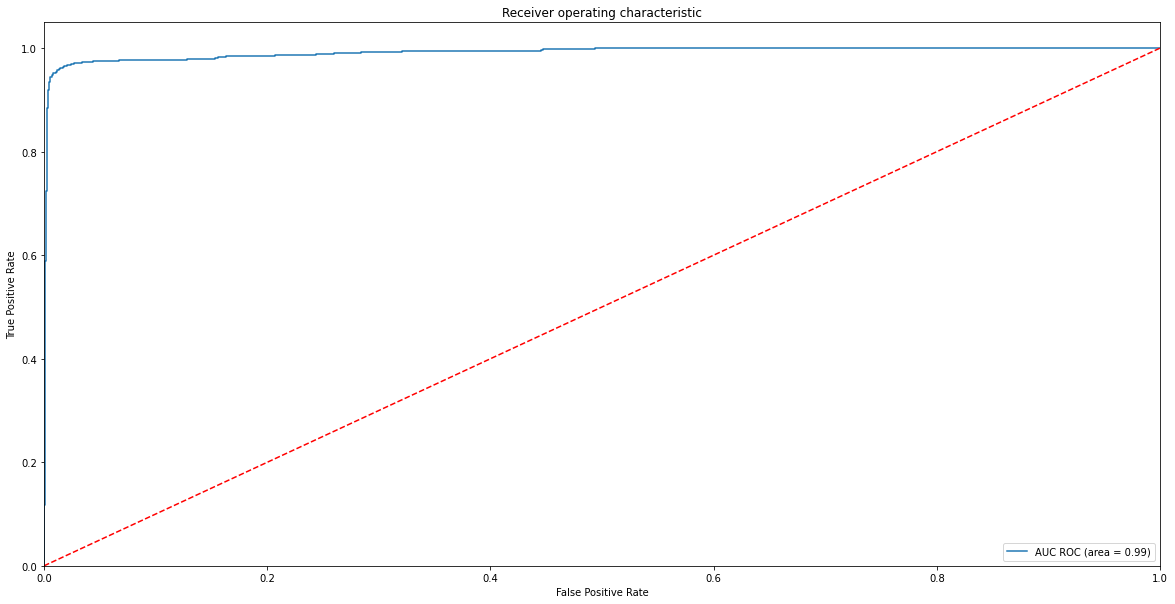

In [329]:
apply_stacking1(df_employee_info1, 'stack_model01')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   14.3s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    3.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.8s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.8s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    2.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Test accuracy -  :  0.9802229413879899
Recall Score - :  0.9802229413879899
Precison Score - :  0.9801400634704072
F1 Score - :  0.9801163379036512
0.989559774273323


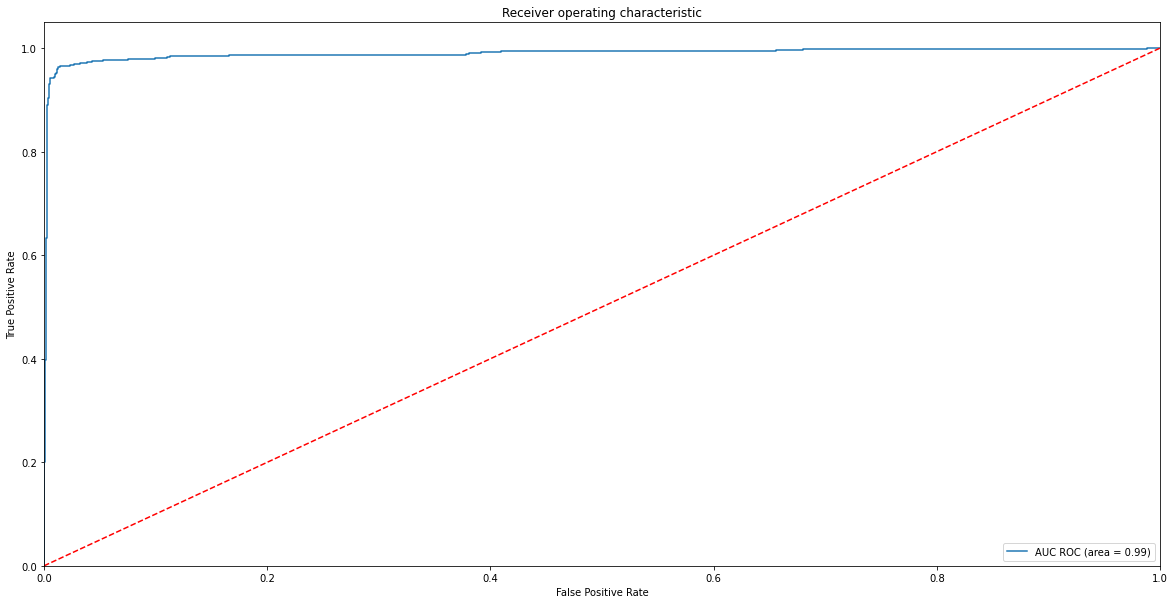

In [330]:
apply_stacking2(df_employee_info1, 'stack_model02')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   45.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    2.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   16.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   19.4s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    9.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    3.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.7s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    1.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    1.7s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Test accuracy -  :  0.982740021574973
Recall Score - :  0.982740021574973
Precison Score - :  0.9826753368070376
F1 Score - :  0.9826817618414136
0.9905365044653668


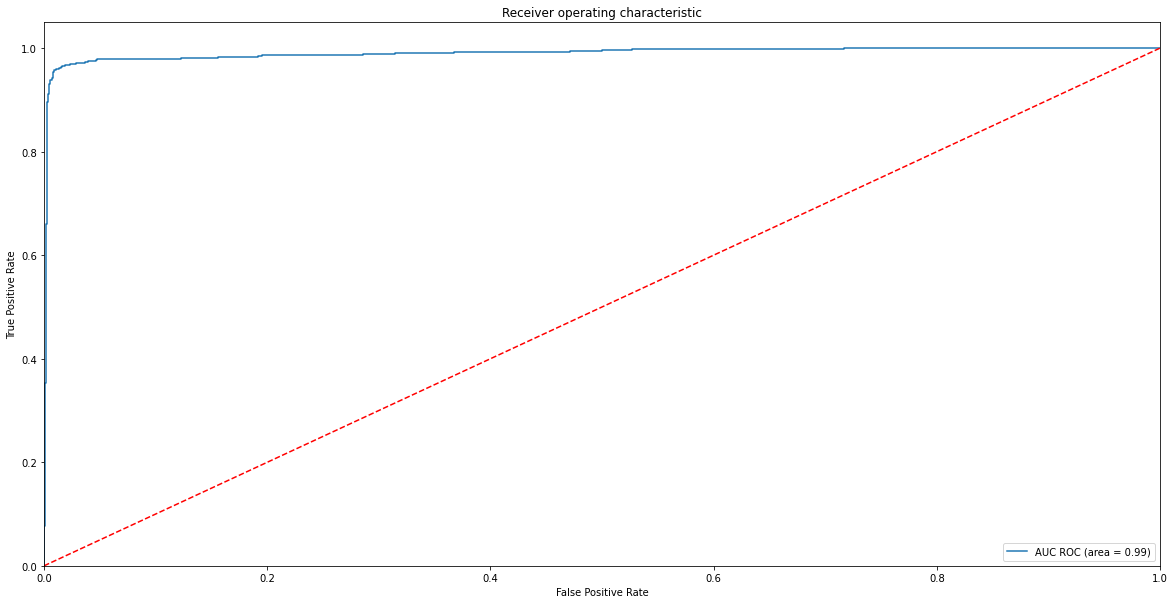

In [331]:
apply_stacking3(df_employee_info1, 'stack_model03')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    9.4s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.9s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    6.8s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   14.5s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    4.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Test accuracy -  :  0.978784609852571
Recall Score - :  0.978784609852571
Precison Score - :  0.9786842824043942
F1 Score - :  0.9786825404122712
0.9905526487660616


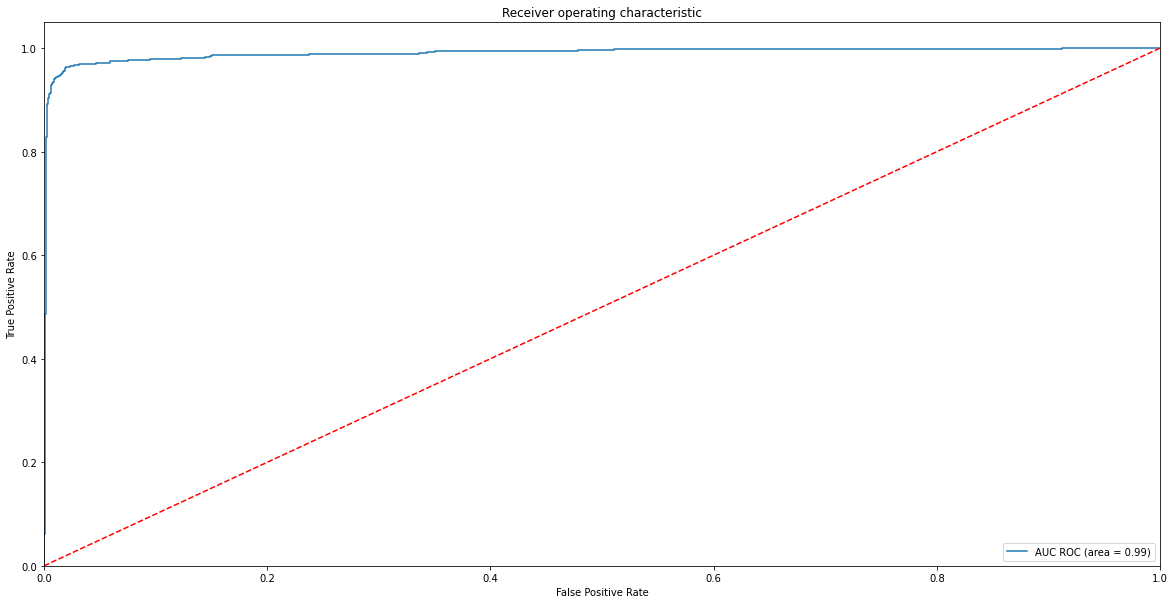

In [332]:
apply_stacking1(df_employee_info2, 'stack_model11')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   15.4s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    4.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.6s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   11.4s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    3.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.2s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Test accuracy -  :  0.9791441927364257
Recall Score - :  0.9791441927364257
Precison Score - :  0.9790497515635485
F1 Score - :  0.9790618621480381
0.9913796772607525


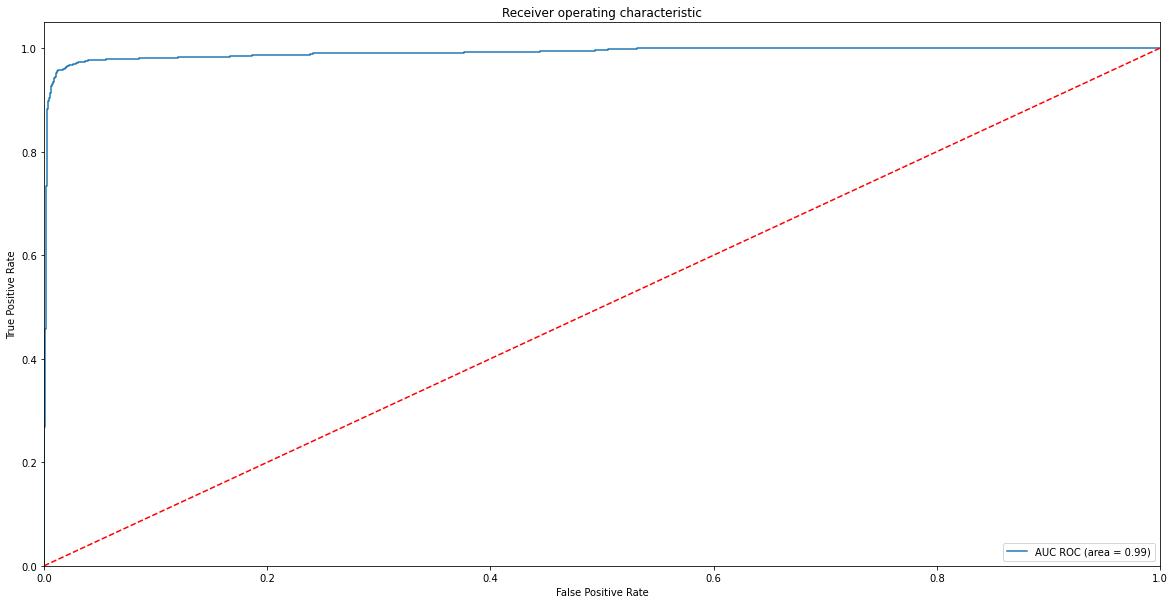

In [333]:
apply_stacking2(df_employee_info2,'stack_model12')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   10.7s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    7.6s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   12.1s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   19.6s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   13.9s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    2.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    3.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.6s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Test accuracy -  :  0.9802229413879899
Recall Score - :  0.9802229413879899
Precison Score - :  0.9801367445663168
F1 Score - :  0.9801277919097443
0.991368669783006


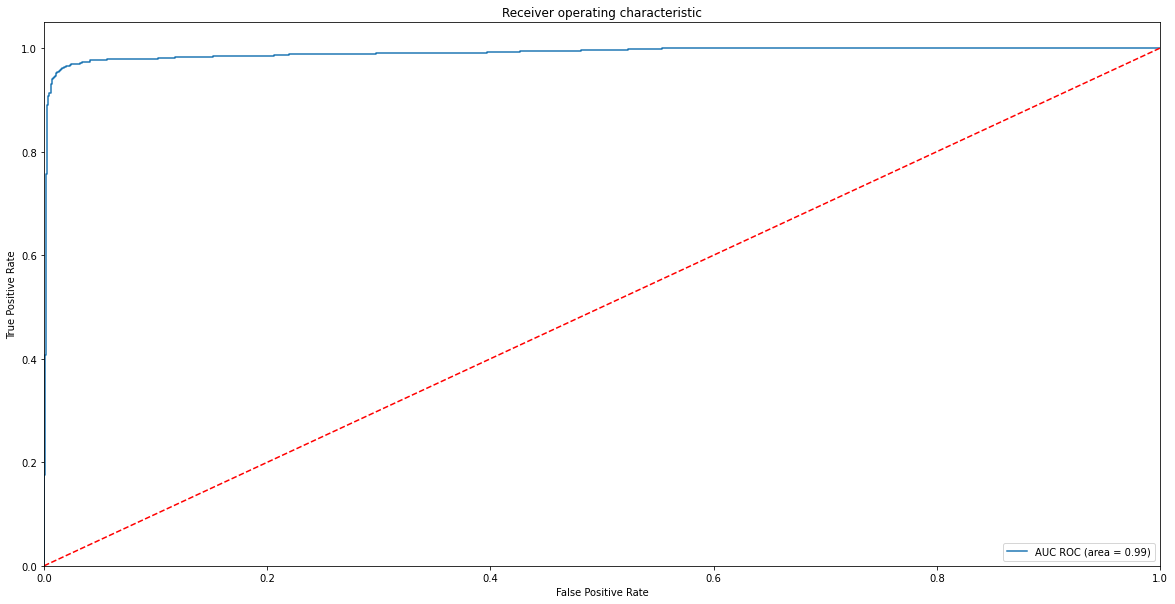

In [334]:
apply_stacking3(df_employee_info2, 'stack_model13')

<a id=section632></a>
#### **6.3.2 Voting Classifier**

<a id=section6321></a>
##### **6.3.2.1 Hard Voting**

In [335]:
from sklearn.ensemble import VotingClassifier

def apply_voting_hard(data, filename):
    
    model_list=list()
    model_list.append(('model21', model1))
    model_list.append(('model22', model2))
    model_list.append(('model23', model3))
    model_list.append(('model24', model4))
    model_list.append(('model25', model5))
    model_list.append(('model26', model6))
    model_list.append(('model27', model7))
    model_list.append(('model28', model8))
    
       
    
    X=data.drop('status', axis=1)
    y=data['status']
    

    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = .20, random_state = 0)
    
    model=VotingClassifier(estimators=model_list, voting='hard')
    
       
    model.fit(X_tr, y_tr)
        
    y_pred=model.predict(X_ts)
        
    print("Test accuracy -  : ", model.score(X_ts, y_ts))
    print ("Recall Score - : ", metrics.recall_score(y_ts, y_pred, average='weighted'))
    print ("Precison Score - : ", metrics.precision_score(y_ts, y_pred, average='weighted'))
    print ("F1 Score - : ", metrics.f1_score(y_ts, y_pred, average='weighted'))
        
   
    
    print("===========================================================")
    
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [336]:
apply_voting_hard(df_employee_info1, 'hard_voting1')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.7s finished



Test accuracy -  :  0.9802229413879899
Recall Score - :  0.9802229413879899
Precison Score - :  0.9801462847225983
F1 Score - :  0.9801048283434776


In [337]:
apply_voting_hard(df_employee_info2, 'hard_voting2')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    8.9s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.0s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished


Test accuracy -  :  0.9777058612010069
Recall Score - :  0.9777058612010069
Precison Score - :  0.9776085072005005
F1 Score - :  0.9775531359513192


<a id=section6322></a>
##### **6.3.2.2 Soft Voting**

In [338]:
from sklearn.ensemble import VotingClassifier

def apply_voting_soft(data, filename):
    
    model_list=list()
    model_list.append(('model21', model1))
    model_list.append(('model22', model2))
    model_list.append(('model23', model3))
    model_list.append(('model24', model4))
    model_list.append(('model25', model5))
    model_list.append(('model26', model6))
    model_list.append(('model27', model7))
    model_list.append(('model28', model8))
    
       
    
    X=data.drop('status', axis=1)
    y=data['status']
    

    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = .20, random_state = 0)
    
    model=VotingClassifier(estimators=model_list, voting='soft')
    
       
    model.fit(X_tr, y_tr)
        
    y_pred=model.predict(X_ts)
        
    print("Test accuracy -  : ", model.score(X_ts, y_ts))
    print ("Recall Score - : ", metrics.recall_score(y_ts, y_pred, average='weighted'))
    print ("Precison Score - : ", metrics.precision_score(y_ts, y_pred, average='weighted'))
    print ("F1 Score - : ", metrics.f1_score(y_ts, y_pred, average='weighted'))
        
    y_pred_proba = model.predict_proba(X_ts)
    preds = y_pred_proba[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_ts, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print(roc_auc)
        
    plt.figure()
    plt.plot(fpr, tpr, label='AUC ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    print("===========================================================")
    
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   19.5s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   34.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   31.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished


Test accuracy -  :  0.9802229413879899
Recall Score - :  0.9802229413879899
Precison Score - :  0.9801367445663168
F1 Score - :  0.9801277919097443
0.9915462570906503


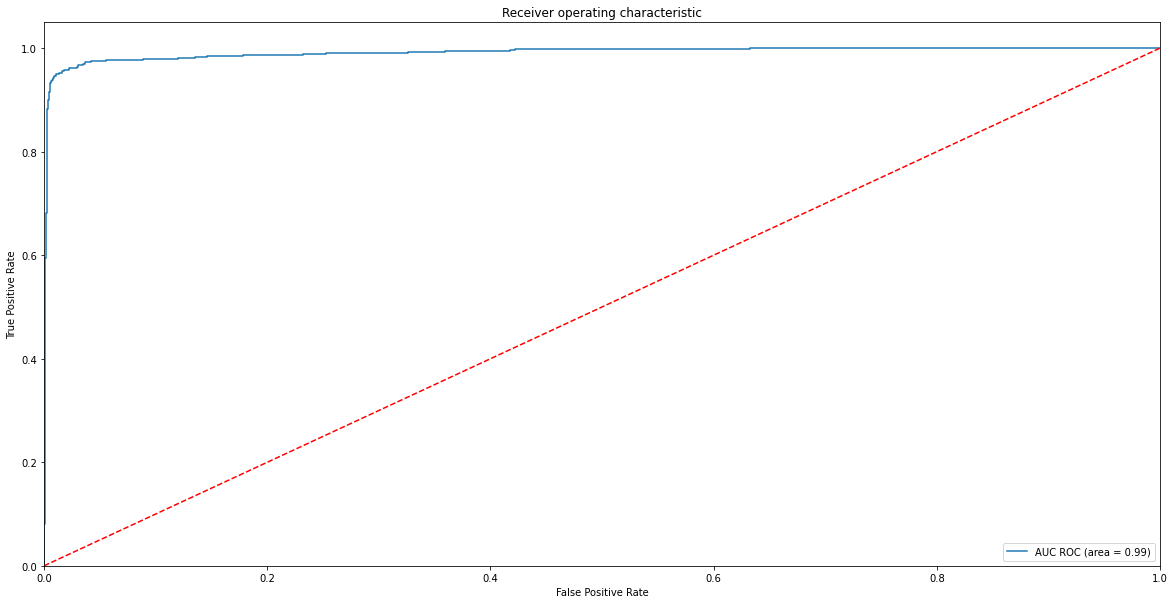

In [339]:
apply_voting_soft(df_employee_info1, 'soft_voting1')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.9s finished


Test accuracy -  :  0.9784250269687162
Recall Score - :  0.9784250269687162
Precison Score - :  0.9783239618517083
F1 Score - :  0.9783024619085645
0.991544055595101


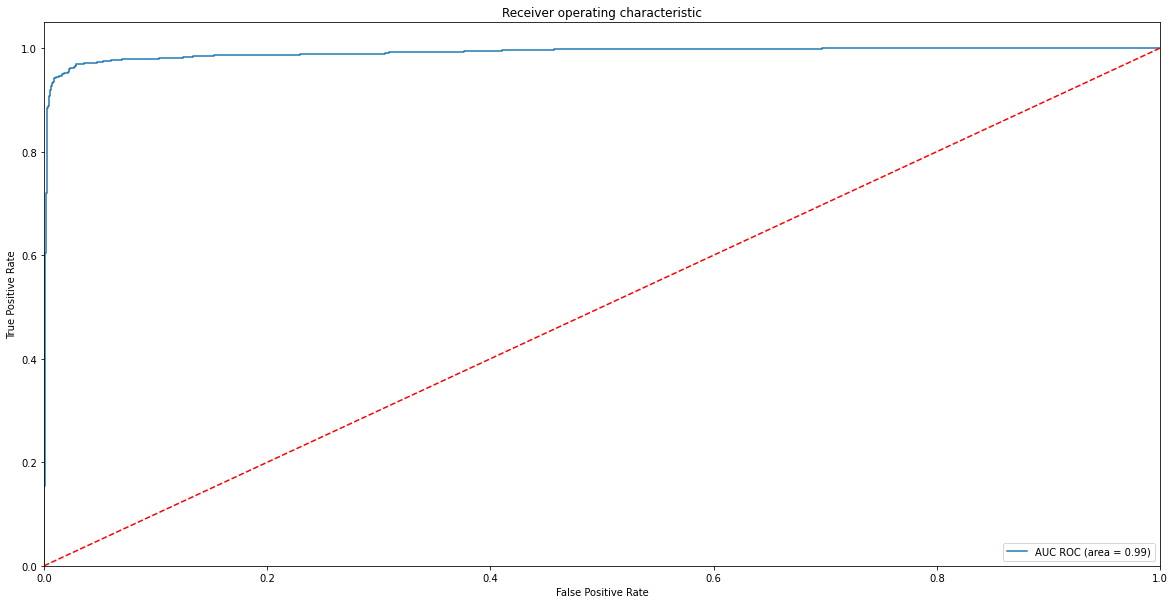

In [340]:
apply_voting_soft(df_employee_info2, 'soft_voting2')

<a id=section7></a>
## **7. Selection of best model**

In [341]:
with open('dataset1_f1file0', 'rb') as file:
    model1=pickle.load(file)
    
with open('dataset2_f1file0', 'rb') as file:
    model2=pickle.load(file)
    
with open('tuned_rf_model0', 'rb') as file:
    model3=pickle.load(file)
    
with open('tuned_rf_model1', 'rb') as file:
    model4=pickle.load(file)
    
with open('tuned_xgb_model0', 'rb') as file:
    model5=pickle.load(file)
    
with open('tuned_xgb_model1', 'rb') as file:
    model6=pickle.load(file)
    
with open('tuned_lgbm_model0', 'rb') as file:
    model7=pickle.load(file)
    
with open('tuned_lgbm_model1', 'rb') as file:
    model8=pickle.load(file)
	
with open('stack_model01', 'rb') as file:
    model9=pickle.load(file)

with open('stack_model02', 'rb') as file:
    model10=pickle.load(file)

with open('stack_model03', 'rb') as file:
    model11=pickle.load(file)

with open('stack_model11', 'rb') as file:
    model12=pickle.load(file)

with open('stack_model12', 'rb') as file:
    model13=pickle.load(file)

with open('stack_model13', 'rb') as file:
    model14=pickle.load(file)
	
with open('hard_voting1', 'rb') as file:
    model15=pickle.load(file)
	
with open('hard_voting2', 'rb') as file:
    model16=pickle.load(file)
	
with open('soft_voting1', 'rb') as file:
    model17=pickle.load(file)
	
with open('soft_voting2', 'rb') as file:
    model18=pickle.load(file)

In [342]:
model_infodf=pd.DataFrame(columns=['model','accuracy','precision','recall','f1'])
model_list={}

model_list['model1']=model1
model_list['model2']=model2
model_list['model3']=model3
model_list['model4']=model4
model_list['model5']=model5
model_list['model6']=model6
model_list['model7']=model7
model_list['model8']=model8
model_list['model9']=model9
model_list['model10']=model10
model_list['model11']=model11
model_list['model12']=model12
model_list['model13']=model13
model_list['model14']=model14
model_list['model15']=model15
model_list['model16']=model16
model_list['model17']=model17
model_list['model18']=model18

X=df_employee_info1.drop('status', axis=1)
y=df_employee_info1['status']

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = .20, random_state = 0)

row_index=0;

for name, model in model_list.items():
    model.fit(X_tr, y_tr)
    y_pred=model.predict(X_ts)
    
    model_infodf.loc[row_index,'model']=name
    model_infodf.loc[row_index, 'accuracy']=metrics.accuracy_score(y_ts, y_pred)
    model_infodf.loc[row_index, 'precision']=metrics.precision_score(y_ts, y_pred,average='weighted')
    model_infodf.loc[row_index, 'recall']=metrics.recall_score(y_ts, y_pred, average='weighted')
    model_infodf.loc[row_index, 'f1']=metrics.f1_score(y_ts, y_pred, average='weighted')
    
    row_index=row_index+1
    
    print(metrics.classification_report(y_ts, y_pred))
    
    print("--------------------------------------------------")



              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2146
           1       0.97      0.95      0.96       635

    accuracy                           0.98      2781
   macro avg       0.98      0.97      0.97      2781
weighted avg       0.98      0.98      0.98      2781

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2146
           1       0.97      0.94      0.96       635

    accuracy                           0.98      2781
   macro avg       0.98      0.97      0.97      2781
weighted avg       0.98      0.98      0.98      2781

--------------------------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    6.3s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.2s finished


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2146
           1       0.97      0.94      0.96       635

    accuracy                           0.98      2781
   macro avg       0.98      0.97      0.97      2781
weighted avg       0.98      0.98      0.98      2781

--------------------------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.5s finished


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2146
           1       0.96      0.94      0.95       635

    accuracy                           0.98      2781
   macro avg       0.97      0.97      0.97      2781
weighted avg       0.98      0.98      0.98      2781

--------------------------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.1s finished


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2146
           1       0.95      0.96      0.95       635

    accuracy                           0.98      2781
   macro avg       0.97      0.97      0.97      2781
weighted avg       0.98      0.98      0.98      2781

--------------------------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.3s finished


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2146
           1       0.97      0.94      0.96       635

    accuracy                           0.98      2781
   macro avg       0.98      0.97      0.97      2781
weighted avg       0.98      0.98      0.98      2781

--------------------------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2146
           1       0.94      0.93      0.94       635

    accuracy                           0.97      2781
   macro avg       0.96      0.96      0.96      2781
weighted avg       0.97      0.97      0.97      2781

--------------------------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2146
           1       0.97      0.94      0.95       635

    accuracy                           0.98      2781
   macro avg       0.97      0.97      0.97      2781
weighted avg       0.98      0.98      0.98      2781

--------------------------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.5s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    2.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2146
           1       0.96      0.95      0.96       635

    accuracy                           0.98      2781
   macro avg       0.97      0.97      0.97      2781
weighted avg       0.98      0.98      0.98      2781

--------------------------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    1.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   15.1s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2146
           1       0.97      0.94      0.96       635

    accuracy                           0.98      2781
   macro avg       0.98      0.97      0.97      2781
weighted avg       0.98      0.98      0.98      2781

--------------------------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    5.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.2s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    7.7s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   10.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   15.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    1.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    1.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    3.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2146
           1       0.97      0.95      0.96       635

    accuracy                           0.98      2781
   macro avg       0.98      0.97      0.97      2781
weighted avg       0.98      0.98      0.98      2781

--------------------------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    9.1s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   14.0s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   14.6s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    3.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    2.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2146
           1       0.97      0.95      0.96       635

    accuracy                           0.98      2781
   macro avg       0.98      0.97      0.98      2781
weighted avg       0.98      0.98      0.98      2781

--------------------------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   31.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:   20.2s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    6.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.7s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.2s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2146
           1       0.97      0.94      0.96       635

    accuracy                           0.98      2781
   macro avg       0.98      0.97      0.97      2781
weighted avg       0.98      0.98      0.98      2781

--------------------------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    1.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    3.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    9.0s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    8.0s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.9s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    1.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2146
           1       0.97      0.95      0.96       635

    accuracy                           0.98      2781
   macro avg       0.98      0.97      0.97      2781
weighted avg       0.98      0.98      0.98      2781

--------------------------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    1.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.8s finished


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2146
           1       0.97      0.94      0.96       635

    accuracy                           0.98      2781
   macro avg       0.98      0.97      0.97      2781
weighted avg       0.98      0.98      0.98      2781

--------------------------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   45.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2146
           1       0.97      0.94      0.96       635

    accuracy                           0.98      2781
   macro avg       0.98      0.97      0.97      2781
weighted avg       0.98      0.98      0.98      2781

--------------------------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    8.0s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.9s finished


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished



              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2146
           1       0.97      0.95      0.96       635

    accuracy                           0.98      2781
   macro avg       0.98      0.97      0.97      2781
weighted avg       0.98      0.98      0.98      2781

--------------------------------------------------
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[LightGBM] [Warning] Unknown parameter: eg_alpha
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.9s finished


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2146
           1       0.97      0.95      0.96       635

    accuracy                           0.98      2781
   macro avg       0.98      0.97      0.97      2781
weighted avg       0.98      0.98      0.98      2781

--------------------------------------------------


In [343]:
model_infodf.sort_values(by='f1', ascending=False)

model  accuracy precision    recall        f1
11  model12    0.9831  0.983039    0.9831  0.983047
13  model14   0.98238  0.982312   0.98238  0.982306
10  model11  0.982021  0.981951  0.982021   0.98196
0    model1  0.982021  0.981951  0.982021   0.98194
16  model17  0.981661  0.981587  0.981661  0.981584
15  model16  0.981302  0.981228  0.981302  0.981206
1    model2  0.980942  0.980874  0.980942  0.980828
8    model9  0.980583  0.980509  0.980583  0.980528
14  model15  0.980583  0.980507  0.980583  0.980472
17  model18  0.980223  0.980139  0.980223  0.980151
9   model10  0.980223  0.980136  0.980223  0.980139
5    model6  0.980223  0.980137  0.980223  0.980128
12  model13  0.979863  0.979773  0.979863  0.979772
2    model3  0.979863  0.979773  0.979863  0.979772
7    model8  0.979144  0.979047  0.979144   0.97905
3    model4  0.978785  0.978686  0.978785  0.978695
4    model5  0.977706  0.977792  0.977706  0.977743
6    model7  0.971593  0.971478  0.971593  0.971521

model1 seems to hava hgighest f1 score and high values for acccuracy,precision and recall

In [344]:
model1

Pipeline(memory=None,
         steps=[('rfscaling11', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('rfimbalance11',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=0,
                       sampling_strategy='auto')),
                ('rfclassifer11',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=Fals

In [345]:
with open('final_model', 'wb') as file:
    pickle.dump(model1, file)

<a id=section8></a>
## **8. Conclusion**

We observed that below XGBCLassifier is the best performing model

*Pipeline(steps=[('xgbscaling1', MinMaxScaler()),
                ('xgbclassifer1',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])*

In [348]:
with open('final_model', 'rb') as file:
    final_model=pickle.load(file)
    
final_model

Pipeline(memory=None,
         steps=[('rfscaling11', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('rfimbalance11',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=0,
                       sampling_strategy='auto')),
                ('rfclassifer11',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=Fals

In [408]:
test_datasetdf=df_employee_info1.copy()
test_datasetdf['employee_id']=df_employee_info['employee_id'].copy()
test_datasetdf

avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
0                246.0              0.0         0.866838           6   
1                134.0              0.0         0.555718           2   
2                156.0              1.0         0.474082           2   
3                256.0              0.0         0.961360           6   
4                146.0              0.0         0.507349           2   
...                ...              ...              ...         ...   
13899            245.0              0.0         0.850785           6   
13900            192.0              0.0         0.951901           3   
13901            175.0              0.0         0.854538           4   
13902            268.0              0.0         0.900887           5   
13903            268.0              1.0         0.897098           2   

       recently_promoted  salary  satisfaction  status  tenure   age  ...  \
0                    0.0       1      0.134415       1     4.0  42.0  ...   
1                    0.0       0      0.511041       1     3.0  23.0  ...   
2                    0.0       1      0.405101       1     3.0  24.0  ...   
3                    0.0       0      0.152974       1     4.0  51.0  ...   
4                    0.0       1      0.434845       1     3.0  23.0  ...   
...                  ...     ...           ...     ...     ...   ...  ...   
13899                0.0       1      0.225084       0     5.0  45.0  ...   
13900                0.0       1      0.539834       0     3.0  22.0  ...   
13901                0.0       1      0.934465       0     3.0  25.0  ...   
13902                0.0       1      0.906613       1     5.0  50.0  ...   
13903                0.0       0      0.459371       0     4.0  24.0  ...   

       department_D00-ENG  department_D00-FN  department_D00-IT  \
0                       0                  0                  0   
1                       0                  0                  0   
2                       0                  0                  0   
3                       0                  0                  0   
4                       0                  0                  0   
...                   ...                ...                ...   
13899                   0                  0                  0   
13900                   0                  0                  0   
13901                   0                  0                  0   
13902                   0                  0                  0   
13903                   0                  0                  1   

       department_D00-MN  department_D00-MT  department_D00-PD  \
0                      0                  0                  0   
1                      0                  0                  0   
2                      0                  0                  0   
3                      0                  0                  0   
4                      0                  0                  0   
...                  ...                ...                ...   
13899                  0                  0                  0   
13900                  0                  0                  0   
13901                  1                  0                  0   
13902                  0                  1                  0   
13903                  0                  0                  0   

       department_D00-PR  department_D00-SP  department_D00-SS  employee_id  
0                      0                  0                  1       124467  
1                      0                  0                  1       112210  
2                      0                  0                  1       126150  
3                      0                  1                  0       125346  
4                      0                  0                  1       113707  
...                  ...                ...                ...          ...  
13899                  0                  0                  1       1018

In [409]:
X=test_datasetdf.drop('status', axis=1)
y=test_datasetdf['status']

X_train, X_test_tmp, y_train, y_test=train_test_split(X, y, test_size = .10, random_state = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test_tmp.shape)
print(y_test.shape)

X_test=X_test_tmp.drop('employee_id', axis=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12513, 20)
(12513,)
(1391, 20)
(1391,)
(12513, 20)
(12513,)
(1391, 19)
(1391,)


In [410]:
y_pred=final_model.predict(X_test)

In [411]:
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [412]:
metrics.accuracy_score(y_test, y_pred)

0.9777138749101366

In [413]:
metrics.precision_score(y_test, y_pred,average='weighted')

0.9776143228002427

In [414]:
metrics.recall_score(y_test, y_pred, average='weighted')

0.9777138749101366

In [415]:
metrics.f1_score(y_test, y_pred, average='weighted')

0.9775779361593088

In [416]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1068
           1       0.97      0.93      0.95       323

    accuracy                           0.98      1391
   macro avg       0.97      0.96      0.97      1391
weighted avg       0.98      0.98      0.98      1391



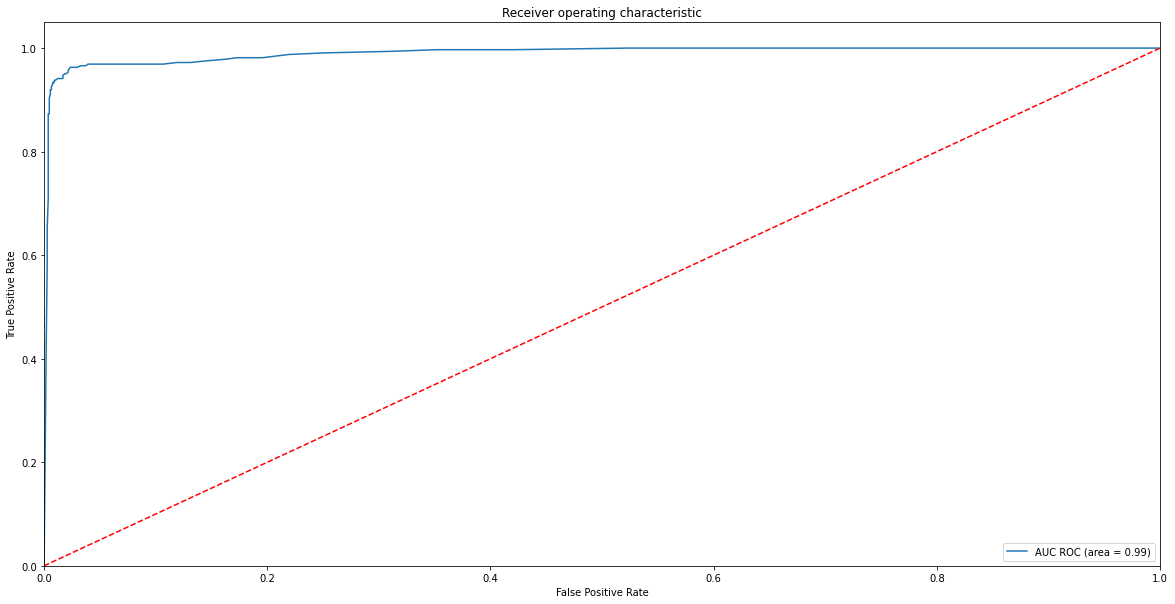

In [417]:
y_pred_proba = final_model.predict_proba(X_test)
preds = y_pred_proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='AUC ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [418]:
Output_df=pd.DataFrame()
Output_df['employee_id']=X_test_tmp['employee_id']
Output_df['Value']=preds
Output_df

employee_id  Value
12047       114605   0.00
776         115935   0.85
5375        114811   0.86
519         115615   1.00
12970       109472   0.00
...            ...    ...
9645        110378   0.00
10038       115823   0.01
12374       115774   0.00
13850       101303   0.00
3761        101907   0.21

[1391 rows x 2 columns]

In [419]:
Output_df.to_csv('final_result.csv',index=False)